In [1]:
from NeuralNetwork import NeuralNetwork, FC, VGG, VGG16, EfficientNetB0
from Dataset import Dataset, SPIRAL, MOON, CIRCLE, MNIST, Fashion_MNIST, CIFAR10,CIFAR100
from NeuroEvolution import NeuroEvolution
from tensorflow import keras
from Representation import Function, PAU
from Activation import PANGAEA_Activation, Pade_Activation_Unit
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from numpy import random
from Swarm import Star, Swarm
import numpy as np
import copy 

np.set_printoptions(suppress=True)

In [6]:
dataset = MNIST


dataset_train = dataset(label_noise=0, training_split=.8)
dataset_test = dataset(label_noise=0, training_split=1.)

input_shape = (2)

spiral_dataset = SPIRAL(10000, 1, input_shape)
circle_dataset = CIRCLE(10000, 0.02, input_shape, training_split=.8)
moon_dataset = MOON(10000, 0.1, input_shape)

neurons = 50
layers = 2
blocks = 3

nn = VGG(dataset_train, blocks)

rep =5
metric = keras.metrics.CategoricalAccuracy()
loss_noise = 0.41
activation_noise = 0.0
input_noise = 0.
gradient_noise =  0.
weight_noise = 6
label_smoothing = 0.09
gradient_dropout = 0.
dropout = 0.16
drop_connect = 0.
batch_size = 128
batch_schedule = 0.81
drnn = 0.
weight_std =  0.025
verbose = 1
epochs_search = 50
epochs_test = 2
iterations = 100000000
patience = np.inf
save_best = False
sleep = 0.
cut_threshold = 0.012
#max_batch = len(nn.dataset.X_train)
batch_range = [128, 1024]
random_flip=1
random_rotation=0.0
random_zoom=0.1
random_translation=0.
random_contrast=0.02
shuffle = 0
lr = 2.95
optimizer = 3
lr_schedule = -0.75
lr_range = [1, 5]



nn.set_config(shuffle, random_flip, random_rotation, random_zoom, random_translation, random_contrast, input_noise,
              label_smoothing, weight_std, dropout, drop_connect, drnn, activation_noise, loss_noise,
              optimizer, lr, lr_schedule, batch_size, batch_schedule, weight_noise, gradient_noise, gradient_dropout,              
              metric, epochs_search, iterations, patience, verbose=verbose,
              batch_range=batch_range, lr_range=lr_range, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)
nn.create_model()


In [7]:




config = [shuffle, random_flip, random_rotation, random_zoom, random_translation, random_contrast, input_noise,
              label_smoothing, weight_std, dropout, drop_connect, drnn, activation_noise, loss_noise,
              optimizer, lr, lr_schedule, batch_size, batch_schedule, weight_noise, gradient_noise, gradient_dropout]

In [8]:
NeuroEvolution.evaluate(config, [nn])


Start of epoch 0
cuurent batch: 128
Training acc: 0.9597
Validation acc: 0.6953
Time taken: 26.80s
Patience:  1

Start of epoch 1
cuurent batch: 128
Training acc: 0.9888
Validation acc: 0.9914
Time taken: 23.89s
Patience:  1

Start of epoch 2
cuurent batch: 128
Training acc: 0.9920
Validation acc: 0.9911
Time taken: 23.98s
Patience:  1

Start of epoch 3
cuurent batch: 128
Training acc: 0.9935
Validation acc: 0.9924
Time taken: 23.91s
Patience:  2

Start of epoch 4
cuurent batch: 128
Training acc: 0.9950
Validation acc: 0.9927
Time taken: 23.98s
Patience:  1

Start of epoch 5
cuurent batch: 128
Training acc: 0.9956
Validation acc: 0.9933
Time taken: 24.26s
Patience:  1

Start of epoch 6
cuurent batch: 128
Training acc: 0.9964
Validation acc: 0.9927
Time taken: 23.74s
Patience:  1

Start of epoch 7
cuurent batch: 128
Training acc: 0.9965
Validation acc: 0.9943
Time taken: 23.31s
Patience:  2

Start of epoch 8
cuurent batch: 128
Training acc: 0.9967
Validation acc: 0.9940
Time taken: 23.

(0.9960833191871643,)

In [20]:
timestr = str(type(nn).__name__)+'_'+str(type(nn.dataset).__name__)
log_file = pd.read_excel('log/'+timestr+'.xlsx')

tr_accuracy_ln = [float(x) for x in log_file.iloc[-1]['training history'].strip('[]').split(',')]
val_accuracy_ln = [float(x) for x in log_file.iloc[-1]['validation history'].strip('[]').split(',')]





In [24]:
config = [shuffle, random_flip, random_rotation, random_zoom, random_translation, random_contrast, input_noise,
              label_smoothing, weight_std, dropout, drop_connect, drnn, activation_noise, 0.0,
              optimizer, lr, lr_schedule, batch_size, batch_schedule, weight_noise, gradient_noise, gradient_dropout]

NeuroEvolution.evaluate(config, [nn])

timestr = str(type(nn).__name__)+'_'+str(type(nn.dataset).__name__)
log_file = pd.read_excel('log/'+timestr+'.xlsx')

tr_accuracy_no = [float(x) for x in log_file.iloc[-1]['training history'].strip('[]').split(',')]
val_accuracy_no = [float(x) for x in log_file.iloc[-1]['validation history'].strip('[]').split(',')]



Start of epoch 0
cuurent batch: 128
Training acc: 0.9696
Validation acc: 0.4642
Time taken: 27.91s
Patience:  1

Start of epoch 1
cuurent batch: 128
Training acc: 0.9900
Validation acc: 0.9924
Time taken: 24.06s
Patience:  1

Start of epoch 2
cuurent batch: 128
Training acc: 0.9928
Validation acc: 0.9938
Time taken: 23.83s
Patience:  1

Start of epoch 3
cuurent batch: 128
Training acc: 0.9944
Validation acc: 0.9945
Time taken: 24.10s
Patience:  1

Start of epoch 4
cuurent batch: 128
Training acc: 0.9953
Validation acc: 0.9939
Time taken: 24.01s
Patience:  1

Start of epoch 5
cuurent batch: 128
Training acc: 0.9964
Validation acc: 0.9933
Time taken: 23.84s
Patience:  2

Start of epoch 6
cuurent batch: 128
Training acc: 0.9966
Validation acc: 0.9942
Time taken: 24.87s
Patience:  3

Start of epoch 7
cuurent batch: 128
Training acc: 0.9971
Validation acc: 0.9948
Time taken: 24.39s
Patience:  4

Start of epoch 8
cuurent batch: 128
Training acc: 0.9980
Validation acc: 0.9948
Time taken: 24.

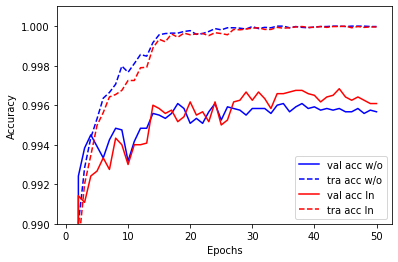

In [27]:



# Plotting validation accuracy
epochs = range(1, len(val_accuracy_ln) + 1)
plt.plot(epochs, val_accuracy_no ,'b',  label='val acc w/o')
plt.plot(epochs, tr_accuracy_no, 'b--', label='tra acc w/o')

plt.plot(epochs, val_accuracy_ln,'r',  label='val acc ln')
plt.plot(epochs, tr_accuracy_ln,  'r--', label='tra acc ln')

#plt.plot(epochs, val_accuracy_gd, 'r',  label='val acc gd')
#plt.plot(epochs, tr_accuracy_gd, 'r--', label='tra acc gd')

#plt.plot(epochs, val_accuracy_gdln,  label='val acc gdln')
#plt.plot(epochs, tr_accuracy_gdln,  label='tra acc gdln')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.99,1.001)
plt.legend()
plt.show()

In [4]:
exp_file = str(type(nn).__name__)+'_'+str(type(nn.dataset).__name__)+'.xlsx'
exp_df = pd.read_excel(exp_file)

In [5]:
exp_df

method   shuffle      flip  rotation      zoom  translation  \
0       pso-saga  0.065755  0.306516  0.025083  0.035558     0.000000   
1       pso-saga  0.065755  0.306516  0.025083  0.035558     0.000000   
2       pso-saga  0.065755  0.306516  0.025083  0.035558     0.000000   
3       pso-saga  0.065755  0.306516  0.025083  0.035558     0.000000   
4       pso-saga  0.065755  0.306516  0.025083  0.035558     0.000000   
5   pso-saga-100  0.065755  0.306516  0.025083  0.035558     0.000000   
6   pso-saga-100  0.065755  0.306516  0.025083  0.035558     0.000000   
7   pso-saga-100  0.065755  0.306516  0.025083  0.035558     0.000000   
8   pso-saga-100  0.065755  0.306516  0.025083  0.035558     0.000000   
9   pso-saga-100  0.065755  0.306516  0.025083  0.035558     0.000000   
10  pso-saga-100  0.065755  0.306516  0.025083  0.035558     0.000000   
11      pso-saga  0.156573  0.837427  0.000000  0.080000     0.045949   
12      pso-saga  0.156573  0.837427  0.000000  0.080000     0.045949   
13      pso-saga  0.156573  0.837427  0.000000  0.080000     0.045949   
14      pso-saga  0.156573  0.837427  0.000000  0.080000     0.045949   
15      pso-saga  0.156573  0.837427  0.000000  0.080000     0.045949   
16      pso-saga  0.240282  0.428626  0.018173  0.056507     0.000000   
17      pso-saga  0.240282  0.428626  0.018173  0.056507     0.000000   
18      pso-saga  0.240282  0.428626  0.018173  0.056507     0.000000   
19      pso-saga  0.240282  0.428626  0.018173  0.056507     0.000000   
20      pso-saga  0.240282  0.428626  0.018173  0.056507     0.000000   
21      pso-saga  0.478623  0.303097  0.000000  0.101859     0.000000   
22      pso-saga  0.478623  0.303097  0.000000  0.101859     0.000000   
23      pso-saga  0.478623  0.303097  0.000000  0.101859     0.000000   
24      pso-saga  0.478623  0.303097  0.000000  0.101859     0.000000   
25      pso-saga  0.478623  0.303097  0.000000  0.101859     0.000000   
26           pso  0.354081  0.516648  0.073176  0.040831     0.010963   
27           pso  0.354081  0.516648  0.073176  0.040831     0.010963   
28           pso  0.354081  0.516648  0.073176  0.040831     0.010963   
29           pso  0.354081  0.516648  0.073176  0.040831     0.010963   
30           pso  0.354081  0.516648  0.073176  0.040831     0.010963   
31           pso  0.511076  0.493154  0.000000  0.037006     0.058601   
32           pso  0.511076  0.493154  0.000000  0.037006     0.058601   
33           pso  0.511076  0.493154  0.000000  0.037006     0.058601   
34           pso  0.511076  0.493154  0.000000  0.037006     0.058601   
35           pso  0.511076  0.493154  0.000000  0.037006     0.058601   
36           pso  0.685950  0.105351  0.000000  0.000000     0.101244   
37           pso  0.685950  0.105351  0.000000  0.000000     0.101244   
38           pso  0.685950  0.105351  0.000000  0.000000     0.101244   
39           pso  0.685950  0.105351  0.000000  0.000000     0.101244   
40           pso  0.685950  0.105351  0.000000  0.000000     0.101244   

    contrast  input noise  label smoothing  weight init  ...  loss noise  \
0   0.001392     0.000000         0.600706     0.030371  ...    0.000000   
1   0.001392     0.000000         0.600706     0.030371  ...    0.000000   
2   0.001392     0.000000         0.600706     0.030371  ...    0.000000   
3   0.001392     0.000000         0.600706     0.030371  ...    0.000000   
4   0.001392     0.000000         0.600706     0.030371  ...    0.000000   
5   0.001392     0.000000         0.600706     0.030371  ...    0.000000   
6   0.001392     0.000000         0.600706     0.030371  ...    0.000000   
7   0.001392     0.000000         0.600706     0.030371  ...    0.000000   
8   0.001392     0.000000         0.600706     0.030371  ...    0.000000   
9   0.001392     0.000000         0.600706     0.030371  ...    0.000000   
10  0.001392     0.000000         0.600706     0.030371  ...    0.000000   
11  0.000452     0.011467      

shuffle               0.118602
flip                  0.736045
rotation              0.000000
zoom                  0.048513
translation           0.044462
contrast              0.000000
input noise           0.021250
label smoothing       0.180930
weight init           0.000000
dropout               0.379952
dropconnect           0.000000
drnn                  0.000000
activation noise      0.060293
loss noise            0.065103
optimizer             2.230173
lr                    2.667287
lr schedule          -0.894405
batch               128.000000
batch schedule        0.938214
weight noise          6.000000
gradient noise        0.000000
gradient dropout      0.000000
Name: 0, dtype: float32

loss_noise: 0.0651027 , activation_noise: 0.060292788 , input_noise: 0.021250272 , label_smoothing: 0.18092981 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 128 , dropout: 0.3799522 , drop_connect: 0.0 , batch_schedule: 4 , drnn: 0.0 , weight_std: 0.0 , flip: 1

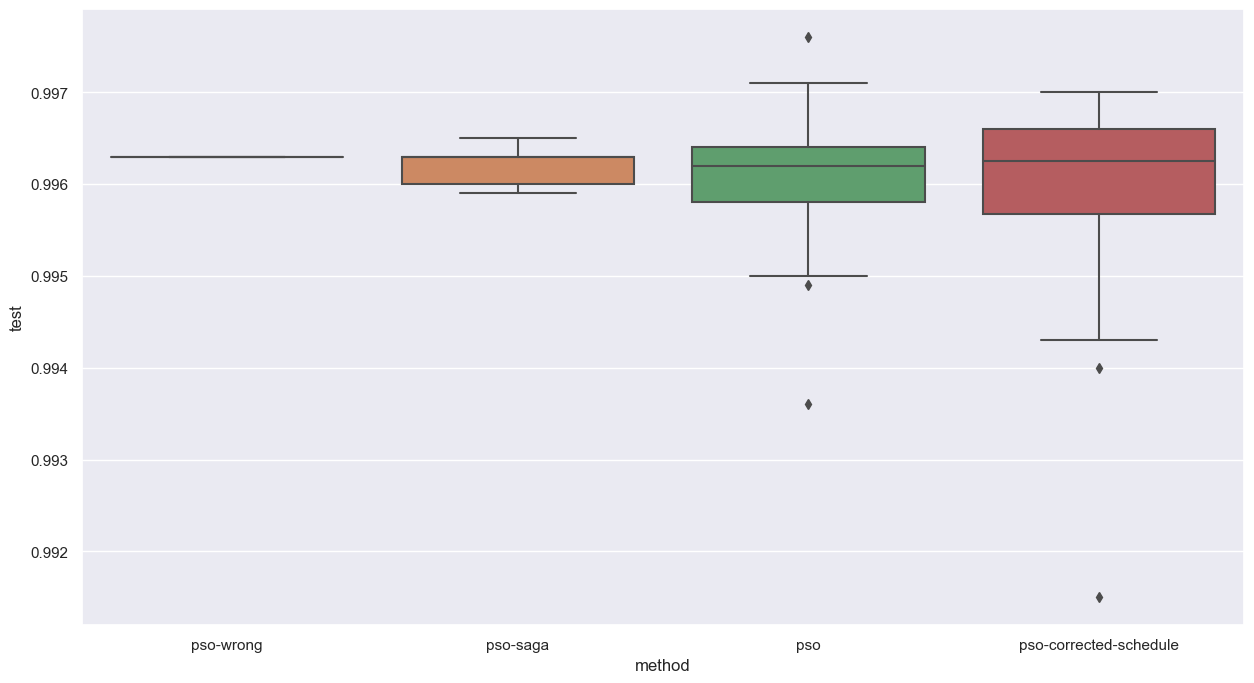


loss_noise: 0.0651027 , activation_noise: 0.060292788 , input_noise: 0.021250272 , label_smoothing: 0.18092981 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 128 , dropout: 0.3799522 , drop_connect: 0.0 , batch_schedule: 4 , drnn: 0.0 , weight_std: 0.0 , flip: 1 , rotation: 0.0 , zoom: 0.04851287 , translation: 0.044461604 , contrast: 0.0 , shuffle: 0 , lr: 0.0021513578239663995 , optimizer: 3 , lr_schedule: 6 , batch_increase: 1 , lr_increase: 0
0.9966999888420105


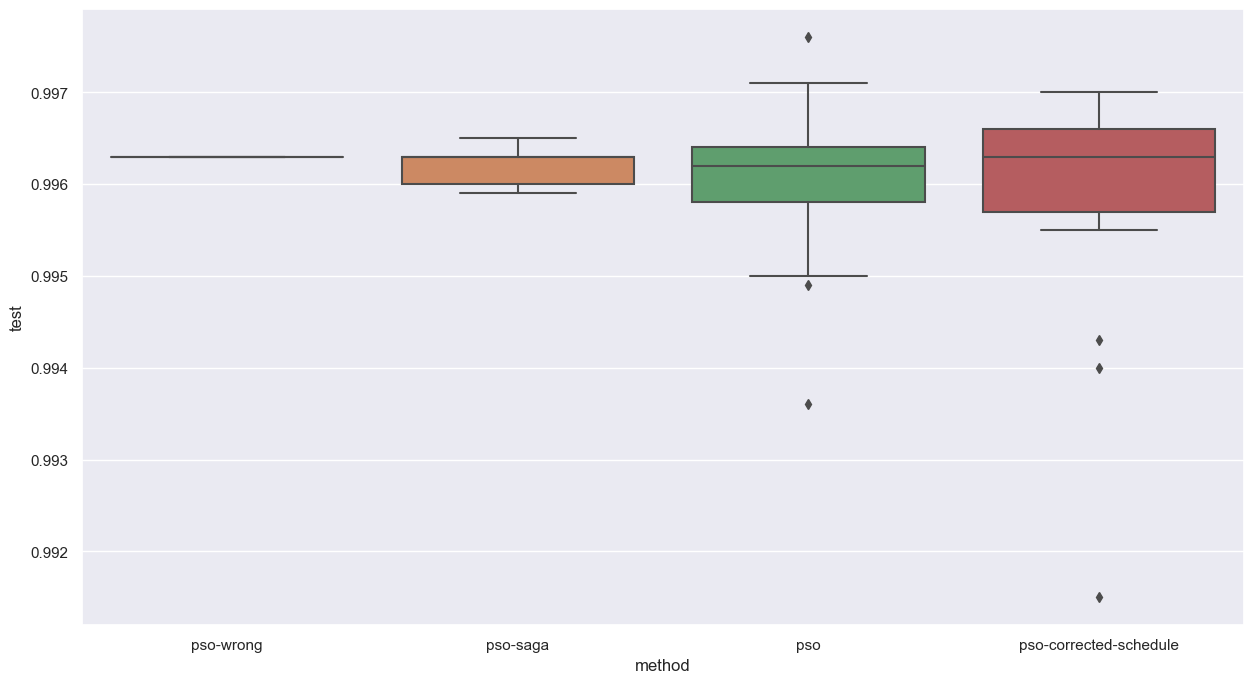


loss_noise: 0.0651027 , activation_noise: 0.060292788 , input_noise: 0.021250272 , label_smoothing: 0.18092981 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 128 , dropout: 0.3799522 , drop_connect: 0.0 , batch_schedule: 4 , drnn: 0.0 , weight_std: 0.0 , flip: 1 , rotation: 0.0 , zoom: 0.04851287 , translation: 0.044461604 , contrast: 0.0 , shuffle: 0 , lr: 0.0021513578239663995 , optimizer: 3 , lr_schedule: 6 , batch_increase: 1 , lr_increase: 0
0.9962999820709229


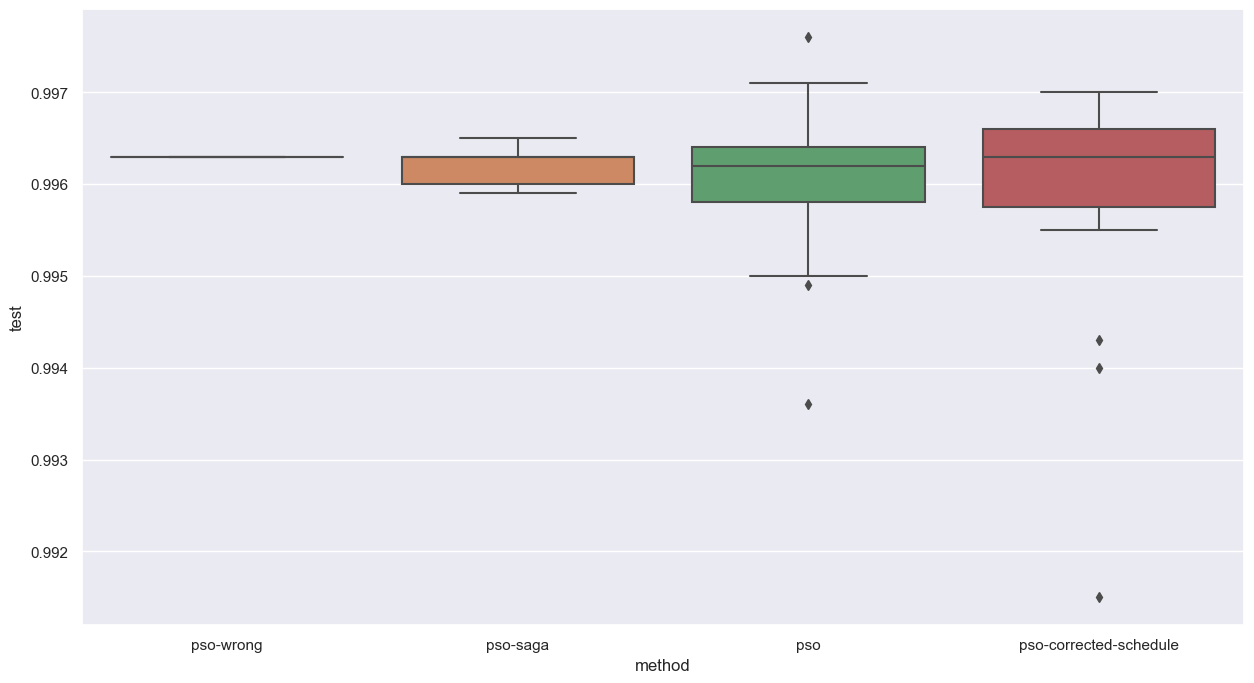


loss_noise: 0.0651027 , activation_noise: 0.060292788 , input_noise: 0.021250272 , label_smoothing: 0.18092981 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 128 , dropout: 0.3799522 , drop_connect: 0.0 , batch_schedule: 4 , drnn: 0.0 , weight_std: 0.0 , flip: 1 , rotation: 0.0 , zoom: 0.04851287 , translation: 0.044461604 , contrast: 0.0 , shuffle: 0 , lr: 0.0021513578239663995 , optimizer: 3 , lr_schedule: 6 , batch_increase: 1 , lr_increase: 0


KeyboardInterrupt: 

In [17]:
for idx, row in exp_df[exp_df['method'] == 'pso-wrong'].iloc[:, 1:].iterrows():
            nn.dataset = dataset_test
            nn.epochs = epochs_test

            setting = row.astype(np.float32)[:-1]
            if (setting[16] > 0):
                setting[16] = np.abs(setting[16])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)
            else:
                setting[16] = -1 * (np.abs(setting[16])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test))
                
            if (setting[18] > 0):
                setting[18] = np.abs(setting[18])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)
            else:
                setting[18] = -1 * (np.abs(setting[18])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test))
            
            print(setting)
            for _ in range(4):
                fitness = NeuroEvolution.evaluate(setting, [nn], test_time=True, verbose=1)[0]
                line = []
                line .append('pso-corrected-schedule')
                for value in setting[:]:
                    line.append(value)
                line.append(fitness)
                exp_df.loc[len(exp_df)] = line
                sns.set(rc={'figure.figsize':(15,8)})
                sns.boxplot(x='method', y='test', data=exp_df)
                plt.show()
                exp_df.to_excel(exp_file, index=False)

In [15]:
exp_df.to_excel(exp_file, index=False)

In [14]:
row = [ nn.test_score, nn.training_time, nn.inference_time]

print(row)
    

[0.9894000291824341, 182.99851322174072, 0.8003153800964355]


In [15]:
score_test = nn.model.evaluate(nn.dataset.X_test, nn.dataset.y_test, verbose=0)
nn.test_score = score_test[1]
nn.test_loss = score_test[0]

In [56]:
epochs_search = 20
epochs_test = 50

lr_schedule_search = -0.12
print(int(((1-np.abs(lr_schedule_search)) * epochs_search)+1))


lr_schedule_test = np.abs(lr_schedule_search)*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)

print(int(((1-np.abs(lr_schedule_test)) * epochs_test)+1))


18
18


In [57]:
np.abs(lr_schedule_search)*(epochs_search/epochs_test)

0.048

In [5]:
exp_df = pd.DataFrame(columns=['method', 'shuffle', 'flip', 'rotation', 'zoom', 'translation', 'contrast'
                               , 'input noise' , 'label smoothing' , 'weight init', 'dropout', 'dropconnect',
                               'drnn', 'activation noise', 'loss noise', 
                               
                               
                               'optimizer', 'lr', 'lr schedule', 'batch', 'batch schedule', 'weight noise', 'gradient noise', 
                               'gradient dropout', 'test'])


In [6]:




methods = ['shuffle', 'flip', 'rotation', 'zoom', 'translation', 'contrast'
                               , 'input noise' , 'label smoothing' , 'weight init', 'dropout', 'dropconnect',
                               'drnn', 'activation noise', 'loss noise', 
                               'optimizer', 'lr', 'lr schedule', 'batch', 'batch schedule', 'weight noise', 'gradient noise', 
                               'gradient dropout']

default_settings = [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3, 0.0, 128, 0.0, 6.0, 0.0, 0.0]

population_size = 140
ind_size = 22
options = {'c1': 1.49618, 'c2': 1.49618, 'w': 0.7298, 'k': population_size, 'p': 2}
bounds = [[0.0, 1.], [0.0, 4.], [0.0, 0.2], [0.0, 0.2],  
          [0.0, 0.2], [0.0, 0.2], [0.0, 1.], [0.0, 1.], 
          [0.0, 0.1], [0.0, 0.5], [0.0, 0.5], [0.0, 1.], 
          [0.0, 0.1], [0.0, 1.], [0.0, 3.0], nn.lr_range, 
          [-1.0, 1.0], nn.batch_range, [-1.0, 1.0], 
          [1.0, 6.0], [0.0, 1.0], [0.0, 0.50]]


# Default


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , batch_schedule: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 1 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 1 , lr_schedule: 51 , batch_increase: 0 , lr_increase: 0
0.9948999881744385


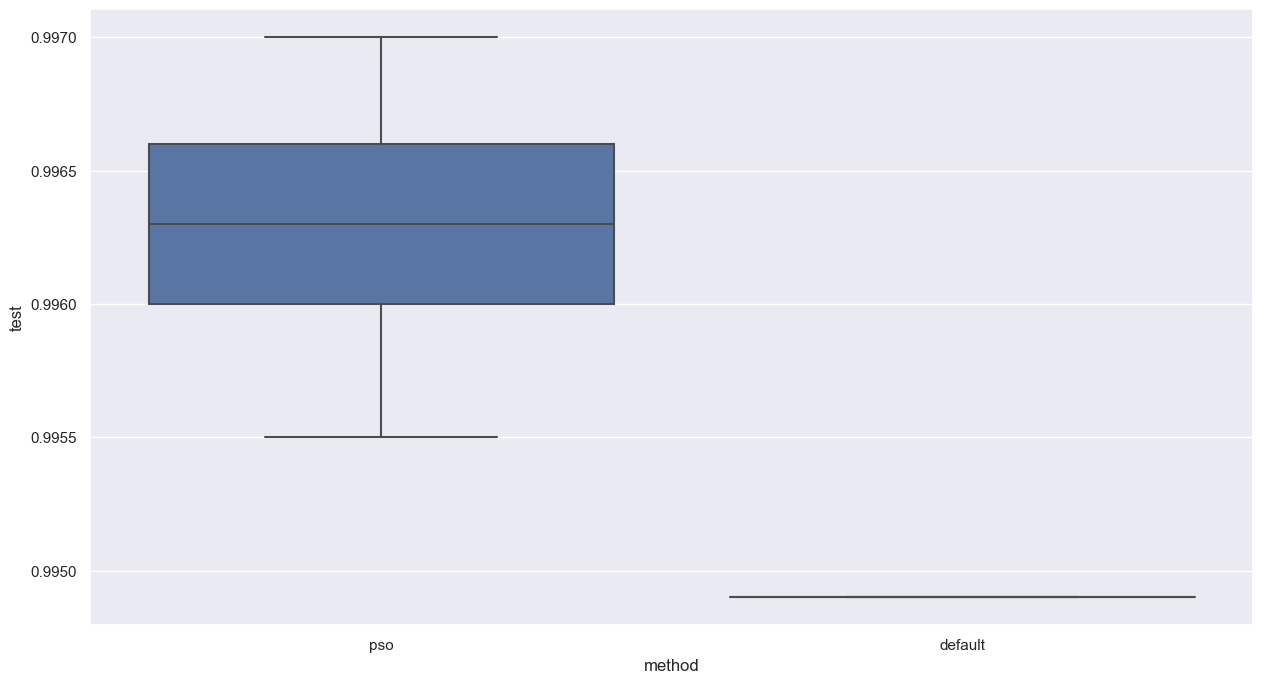


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , batch_schedule: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 1 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 1 , lr_schedule: 51 , batch_increase: 0 , lr_increase: 0
0.9936000108718872


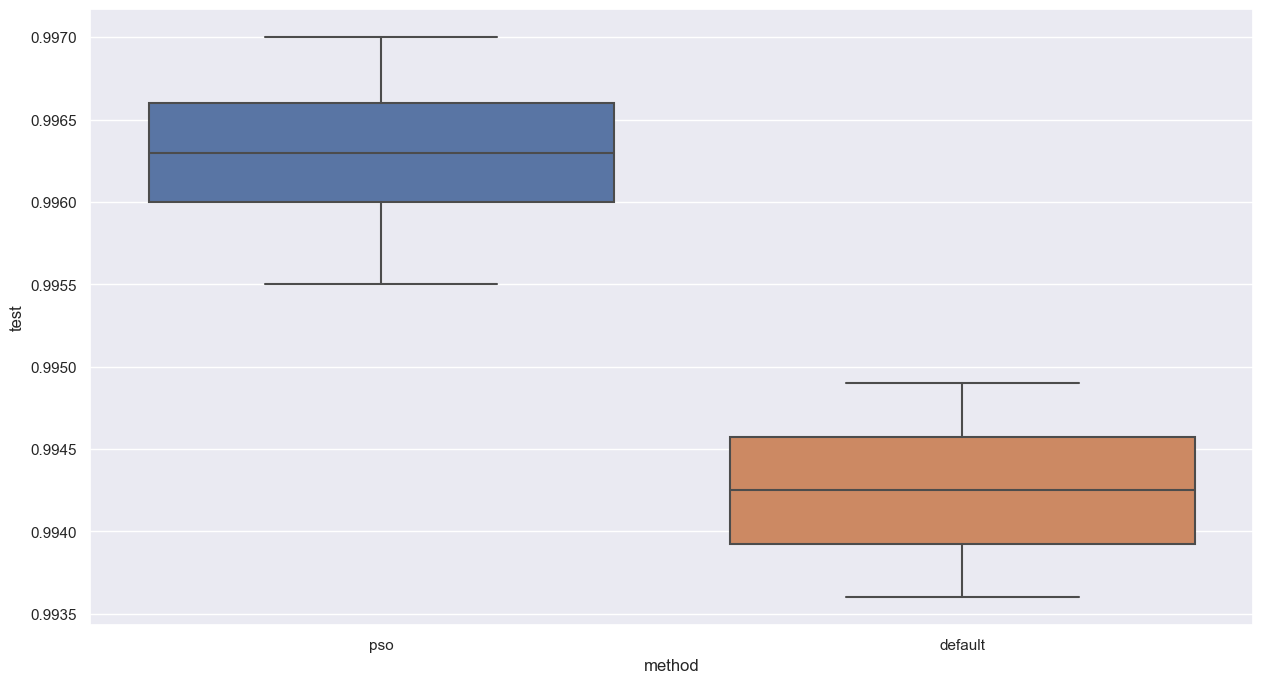


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , batch_schedule: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 1 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 1 , lr_schedule: 51 , batch_increase: 0 , lr_increase: 0
0.9944999814033508


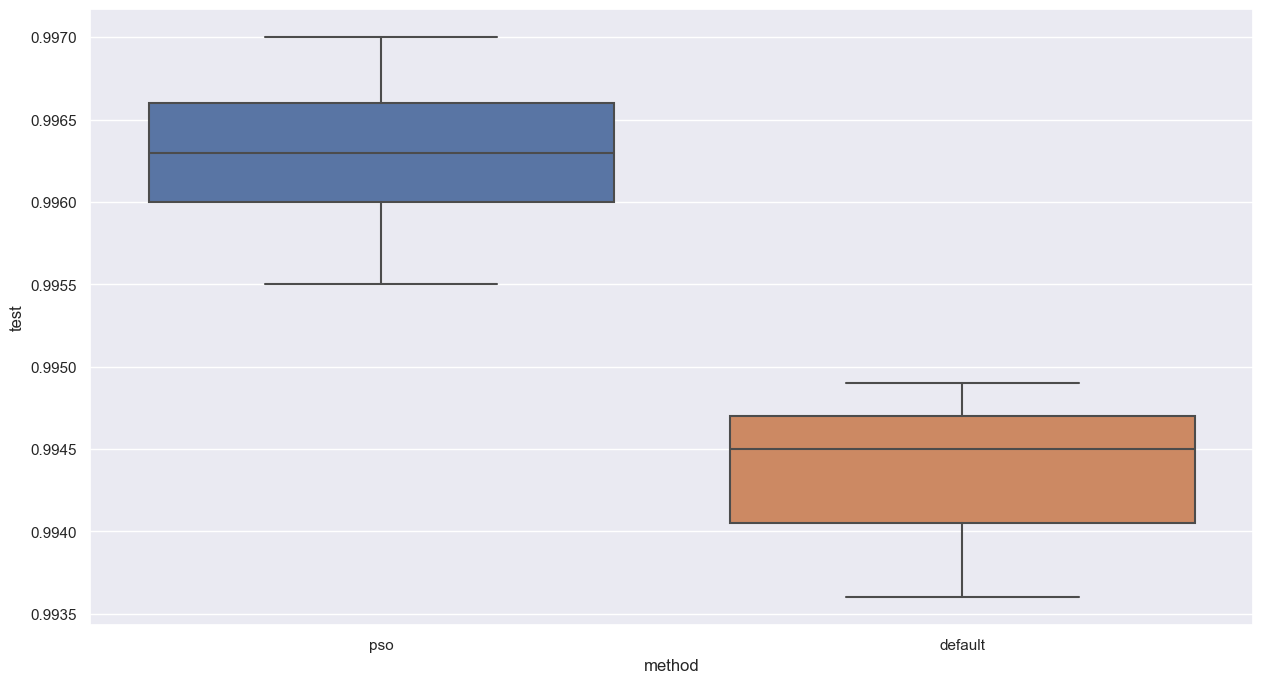


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , batch_schedule: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 1 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 1 , lr_schedule: 51 , batch_increase: 0 , lr_increase: 0
0.9941999912261963


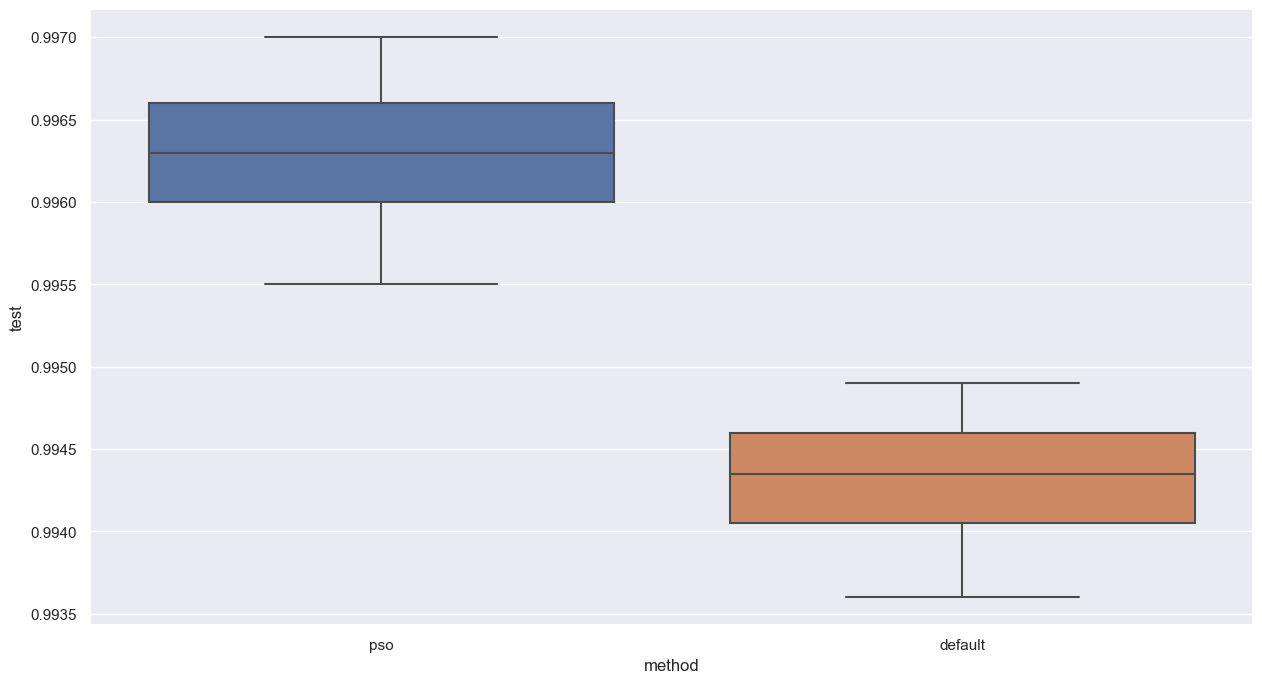


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , batch_schedule: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 1 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 1 , lr_schedule: 51 , batch_increase: 0 , lr_increase: 0
0.9941999912261963


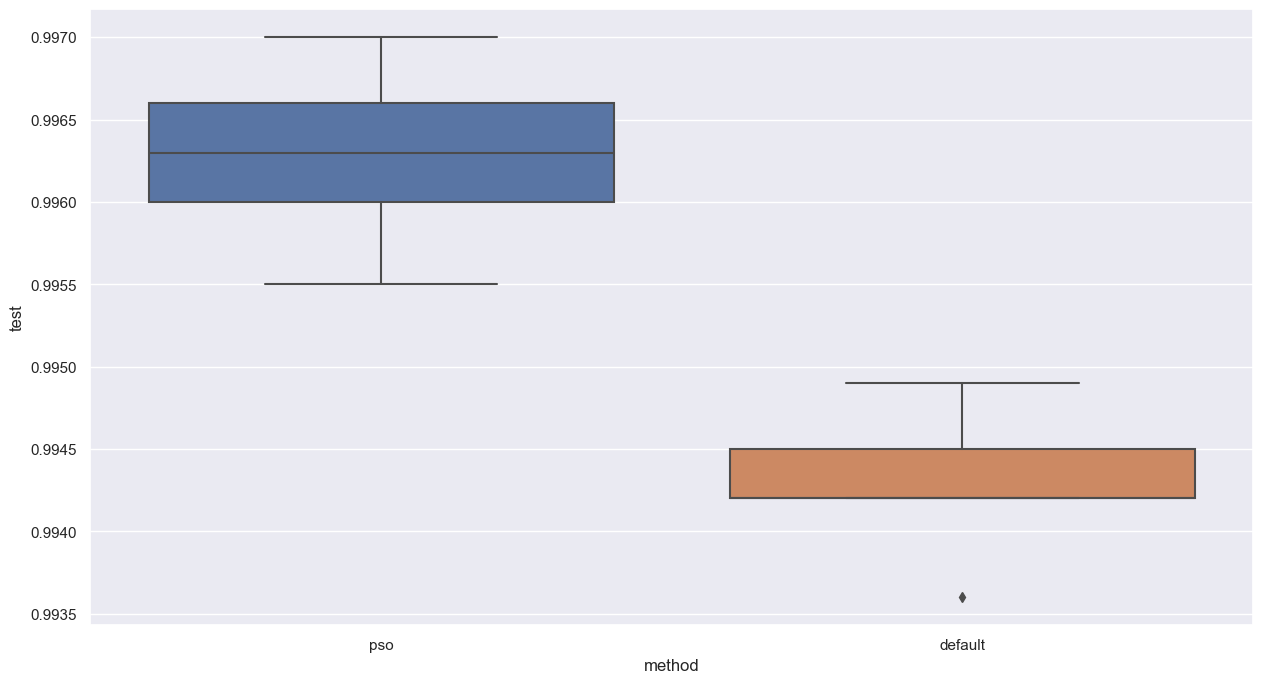

In [20]:
for _ in range(5):
            nn.dataset = dataset_test
            nn.epochs = epochs_test
            fitness = NeuroEvolution.evaluate(default_settings, [nn], test_time=True, verbose=1)[0]
            row = []
            row .append('default')
            for value in default_settings:
                row.append(value)
            row.append(fitness)
            exp_df.loc[len(exp_df)] = row
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)
            plt.show()
            exp_df.to_excel(exp_file, index=False)

# Grid Search

Grid search lr_decay

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 0 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 0 , lr_decay: 5
0.9693333506584167 0.9706000089645386
New best 0.09090909090909091 0.9693333506584167

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 0 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 0 , lr_decay: 10
0.9714999794960022 0.9733999967575073
New best 0.18181818181818182 0.9714999794960022

loss_noise: 0.0 , activation_noise: 0.0 , input

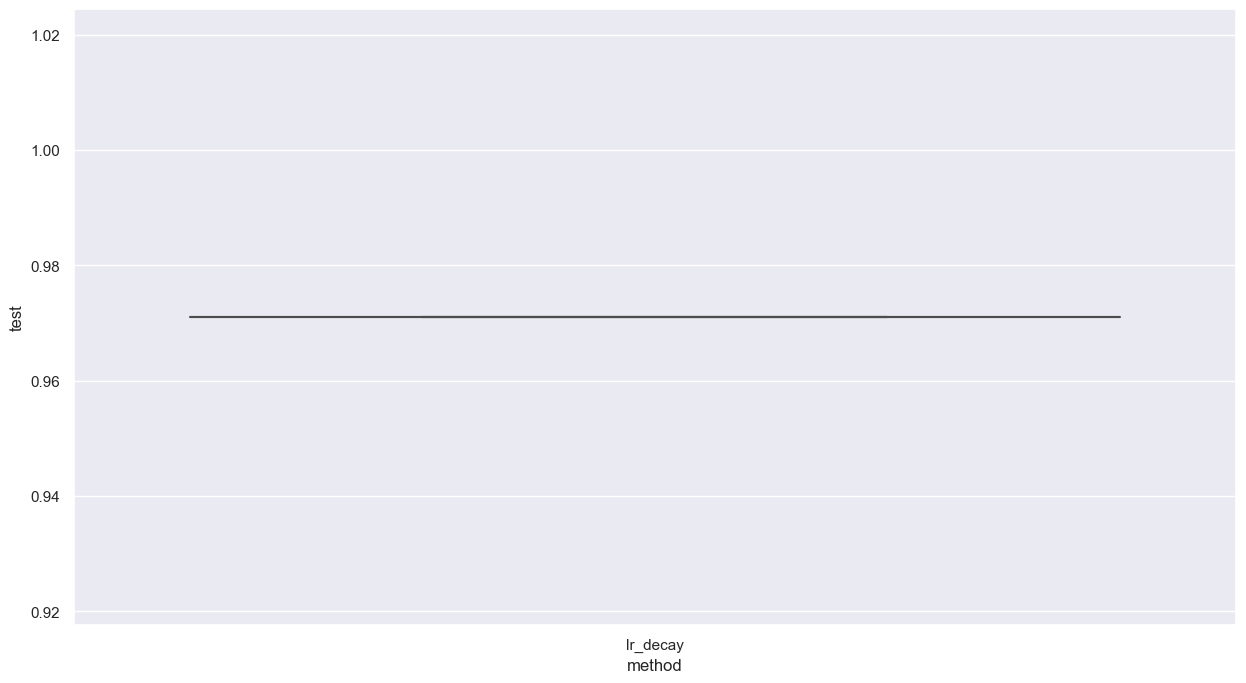


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 0 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 0 , lr_decay: 46
0.9700000286102295
0.9722499847412109 0.9700000286102295


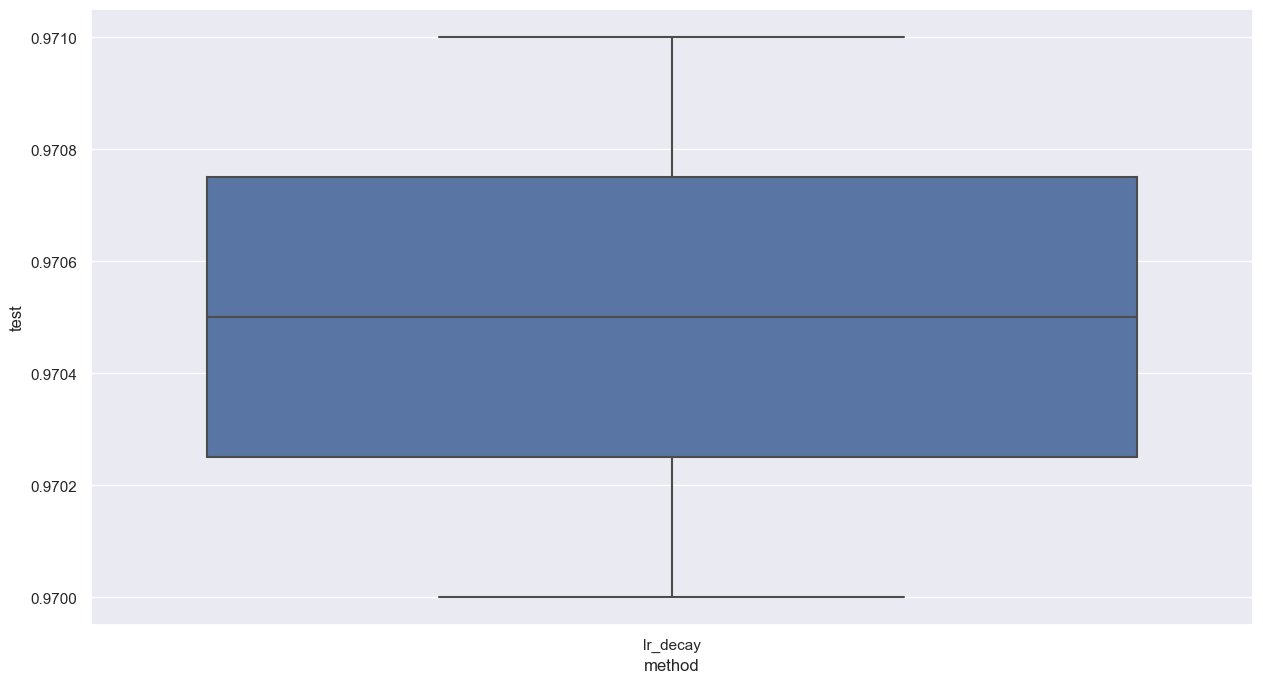


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 0 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 0 , lr_decay: 46
0.9721999764442444
0.9725000262260437 0.9721999764442444


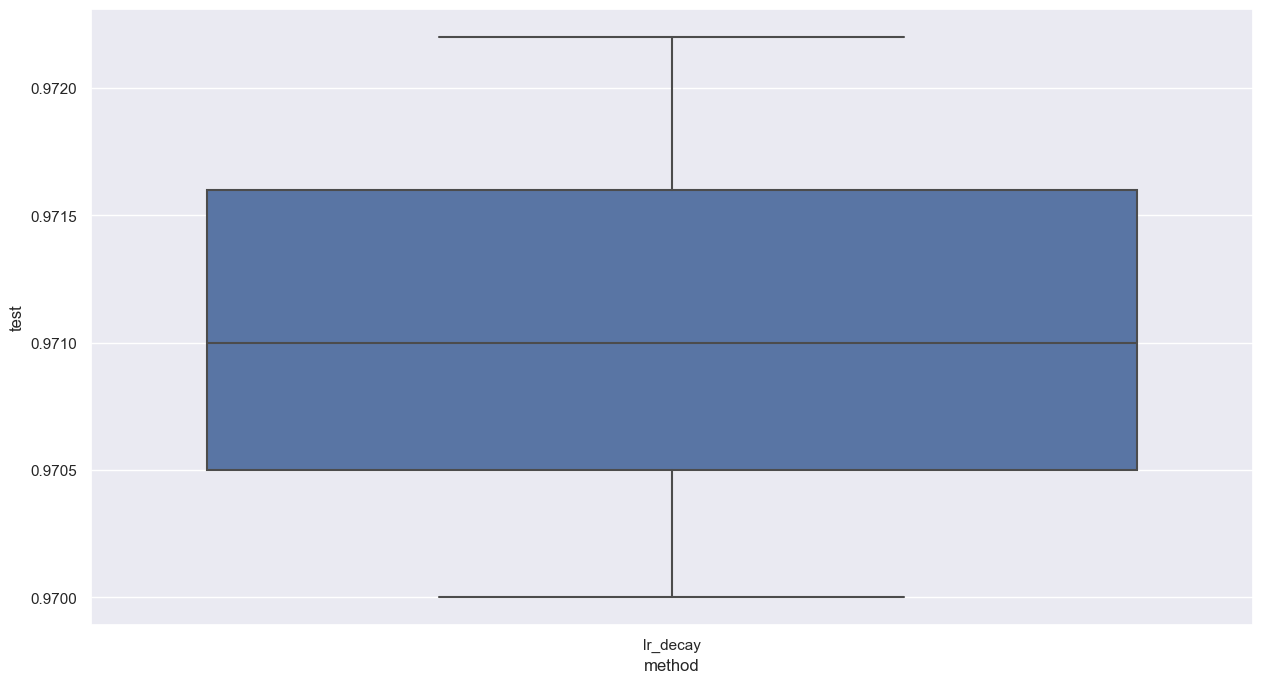


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 0 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 0 , lr_decay: 46
0.9703999757766724
0.9698333144187927 0.9703999757766724


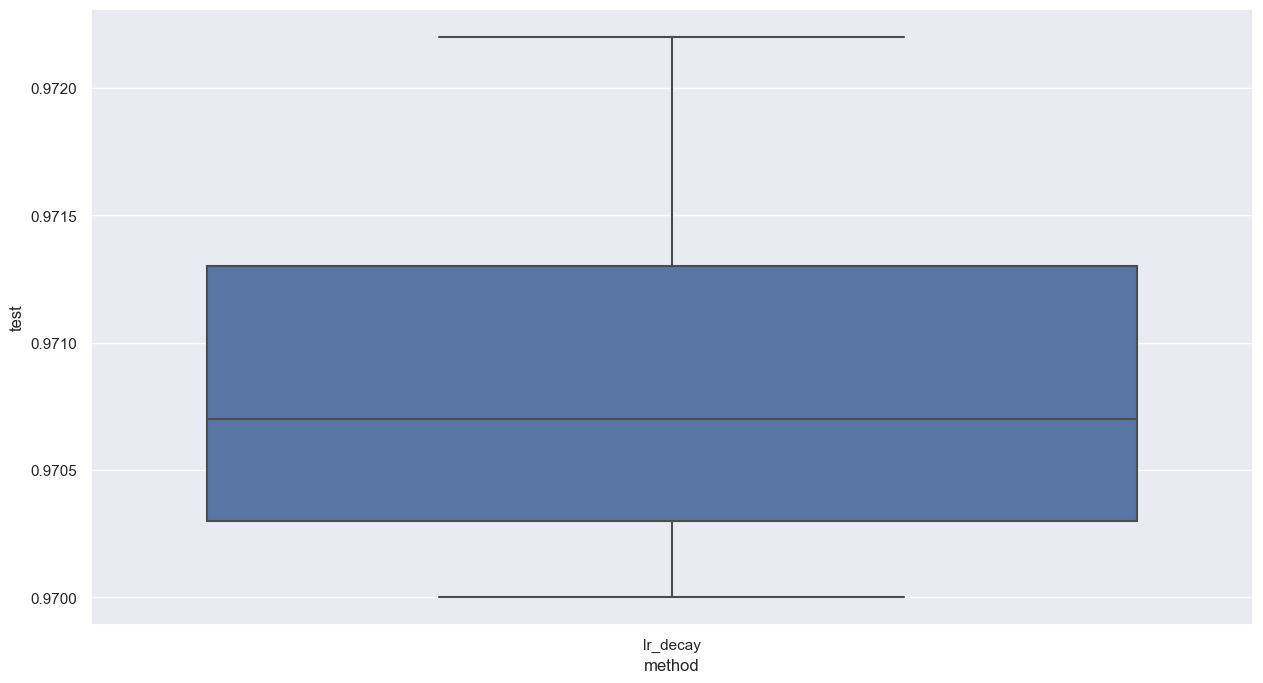


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 0 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 0 , lr_decay: 46
0.9721999764442444
0.9712499976158142 0.9721999764442444


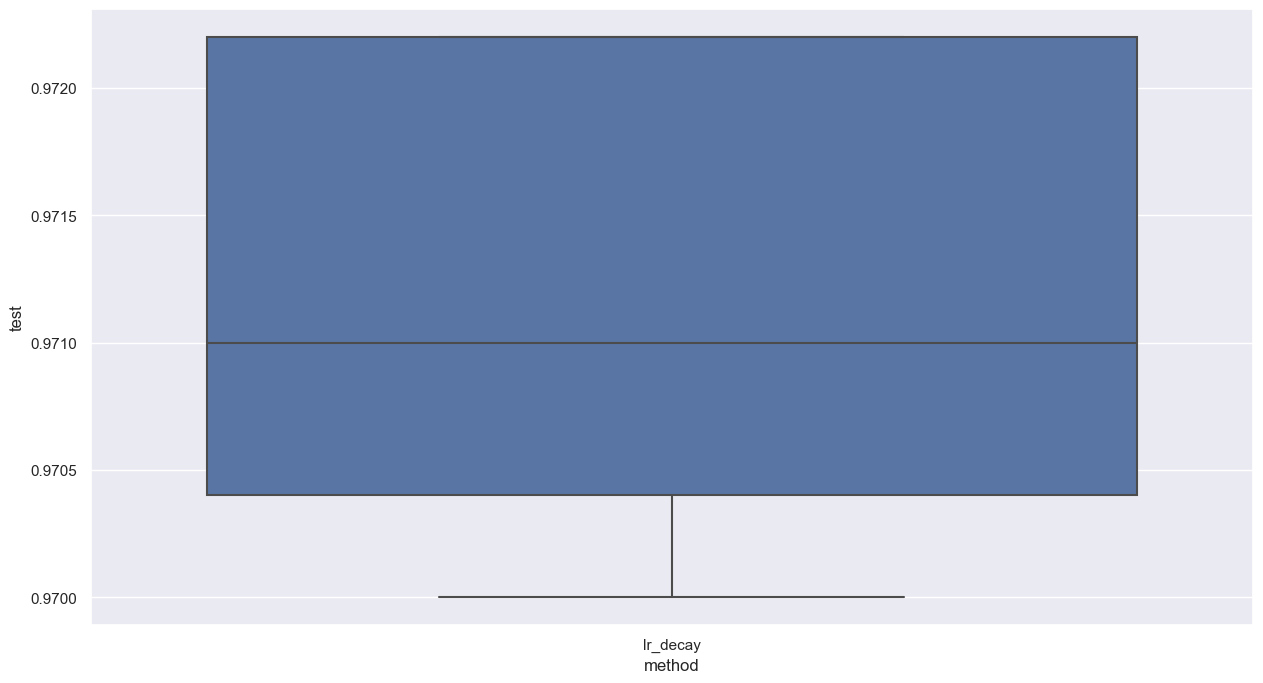

In [11]:
grid_log = pd.DataFrame(columns=['ind', 'validation'])

for choice, method in zip(range(len(methods)), methods):
    values = []
    fitnesses = []
    best_fitness = 0
    if (method != 'shuffle' and method != 'flip'):
        print('Grid search '+method)
        for value in np.linspace(bounds[choice][0], bounds[choice][1], 11)[1:]:
            tmp_setting = copy.copy(default_settings)
            tmp_setting[choice] = value
            fitness = NeuroEvolution.evaluate(tmp_setting, [nn])[0]
            grid_log.loc[len(grid_log)] = [tmp_setting, fitness]
            grid_log.to_excel('grid search log - mnist fc.xlsx', index=False)   


            if fitness > best_fitness:
                    best_fitness = fitness
                    best_ind = tmp_setting
                    print('New best', value, best_fitness)

            
    elif (method == 'shuffle'):
        print('Grid search '+method)
        tmp_setting = copy.copy(default_settings)
        tmp_setting[choice] = 1.0
        best_ind = tmp_setting
        fitness = NeuroEvolution.evaluate(tmp_setting, [nn])[0]
        grid_log.loc[len(grid_log)] = [tmp_setting, fitness]
        grid_log.to_excel('grid search log - mnist fc.xlsx', index=False) 
        
    elif (method == 'optimizer'):
        print('Grid search '+method)
        tmp_setting = copy.copy(default_settings)
        tmp_setting[choice] = 1.0
        best_ind = tmp_setting
        fitness = NeuroEvolution.evaluate(tmp_setting, [nn])[0]
        grid_log.loc[len(grid_log)] = [tmp_setting, fitness]
        grid_log.to_excel('grid search log - mnist fc.xlsx', index=False) 
    
    elif (method == 'flip'):
        print('Grid search '+method)
        for value in [1, 2, 3]:
            tmp_setting = copy.copy(default_settings)
            tmp_setting[choice] = value
            fitness = NeuroEvolution.evaluate(tmp_setting, [nn])[0]
            grid_log.loc[len(grid_log)] = [tmp_setting, fitness]
            grid_log.to_excel('grid search log - mnist fc.xlsx', index=False)   


            if fitness > best_fitness:
                    best_fitness = fitness
                    best_ind = tmp_setting
                    print('New best', best_fitness)

    
    for _ in range(5):
                fitness = NeuroEvolution.evaluate(best_ind, [nn], test_time=True)[0]
                row = []
                row .append(method)
                for value in best_ind:
                    row.append(value)
                row.append(fitness)
                exp_df.loc[len(exp_df)] = row
                sns.set(rc={'figure.figsize':(15,8)})
                sns.boxplot(x='method', y='test', data=exp_df)            
                plt.show()
    
    exp_df.to_excel('mnist-fc-pso-final-decay.xlsx', index=False)



# Random Search

In [23]:


population_size = 1000


for _ in range(1):
    best_fitness = 0
    best_ind = copy.copy(default_settings)
    star = Star(population_size)
    swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)
    counter = 0
    
    for i in range(population_size):
            choice = np.random.choice([1,2,3,4,5,6,7, 9, 10, 11, 12, 13, 19,20,21], 4, replace=False)
            for j in range(ind_size):
                if j not in choice and j not in [0, 8, 14, 15, 16, 17, 18]:
                    swarm.position[i][j] = default_settings[j]
    
    for ind in swarm.position:
            fitness = NeuroEvolution.evaluate(ind, [nn], test_time=False)[0]
            row = []
            print(counter)
            counter+=1
            
            if fitness > best_fitness:
                best_fitness = fitness
                best_ind = ind
                
                print('New best', best_fitness)
                
    for _ in range(5):
            fitness = NeuroEvolution.evaluate(best_ind, [nn], test_time=True)[0]
            row = []
            row .append('random-init')
            for value in best_ind:
                row.append(value)
            row.append(fitness)
            exp_df.loc[len(exp_df)] = row
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)            
            plt.show()



0
New best 0.9649999737739563
1
2


KeyboardInterrupt: 

Best Particle =  0.9951 , Step =  1
Best Particle =  0.9951 , Step =  2
Best Particle =  0.9954 , Step =  3
Best Particle =  0.9954 , Step =  4
Best Particle =  0.9962 , Step =  5
Best Particle =  0.9962 , Step =  6
Best Particle =  0.9962 , Step =  7
Best Particle =  0.9962 , Step =  8
Best Particle =  0.9962 , Step =  9
Best Particle =  0.9967 , Step =  10
Best Particle =  0.9967 , Step =  11
Best Particle =  0.9967 , Step =  12
Best Particle =  0.9967 , Step =  13
Best Particle =  0.9967 , Step =  14
Best Particle =  0.9967 , Step =  15


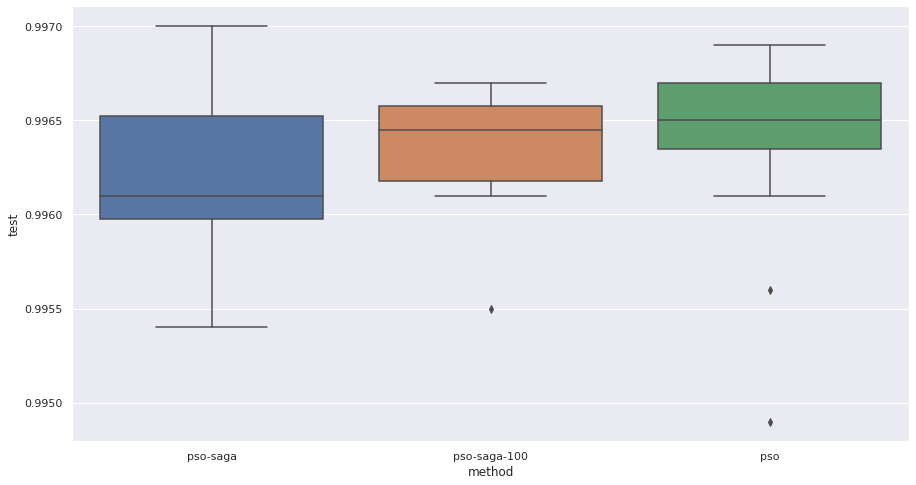

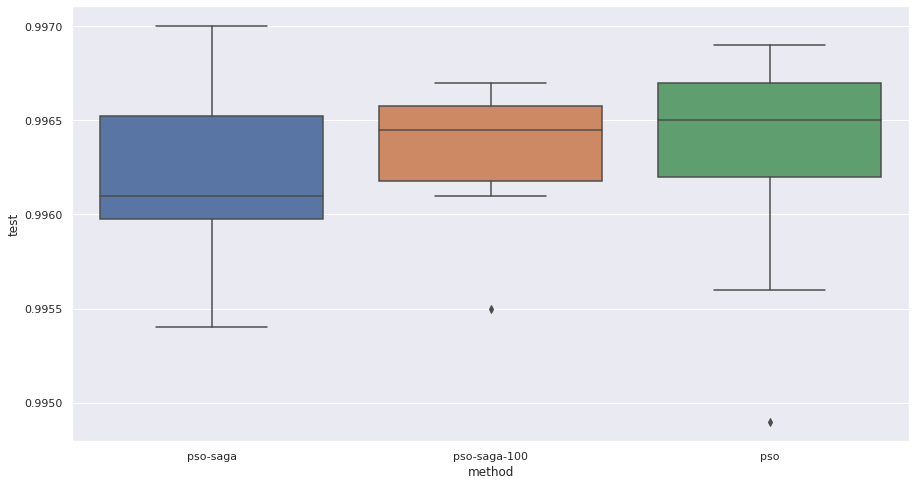

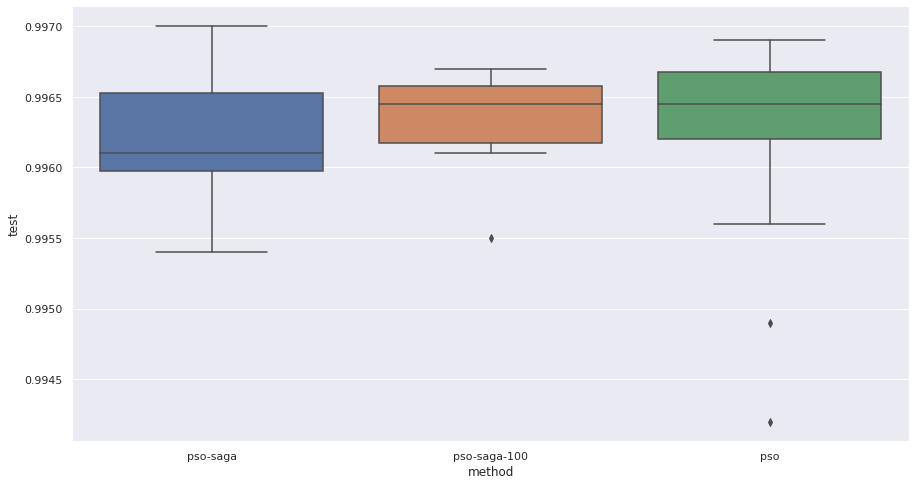

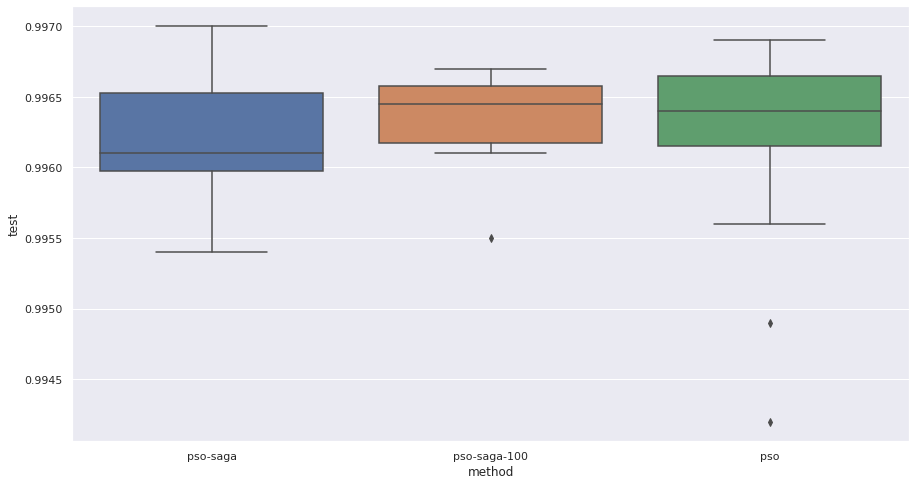

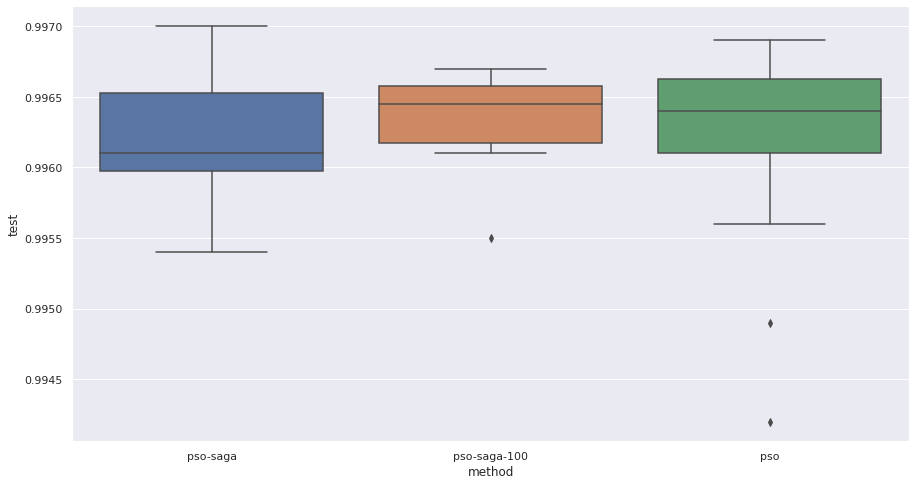

Best Particle =  0.9938 , Step =  1


In [ ]:
population_size = 44



for _ in range(2):
    nn.dataset = dataset_train
    nn.epochs = epochs_search


    star = Star(population_size)
    swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)


        

    for i in range(population_size):
            choice = np.random.choice([1,2,3,4,5,6,7, 9, 10, 11, 12, 13, 19,20,21], 4, replace=False)
            for j in range(ind_size):
                if j not in choice and j not in [0, 8, 14, 15, 16, 17, 18]:
                    swarm.position[i][j] = default_settings[j]
    #for j in range(ind_size):
    #    swarm.position[0][j] = ind[j]
    #for i in range(1, population_size):
    #        for j in range(ind_size):
    #            if j not in [14,15,16,17,18,19,20] :
    #                swarm.position[i][j] = ind1[j]


    #ost, pos, time_found = swarm.optimize(nn, steps=15, no_change=np.inf, verbose=1)
    ost, pos, time_found = swarm.optimize(nn, steps=200, no_change=5, verbose=1)

    
    nn.dataset = dataset_test
    nn.epochs = epochs_test

    
    
    for _ in range(5):
            fitness = NeuroEvolution.evaluate(pos, [nn], test_time=True)[0]
            row = []
            row .append('pso')
            for value in pos:
                row.append(value)
            row.append(fitness)
            exp_df.loc[len(exp_df)] = row
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)

            
            #plt.ylim(0.9, 1.0)2015
            plt.show()
    exp_df.to_excel(exp_file, index=False)

Best Particle =  0.9948 , Step =  1
Best Particle =  0.9948 , Step =  2
Best Particle =  0.9948 , Step =  3
Best Particle =  0.9956 , Step =  4
Best Particle =  0.9956 , Step =  5
Best Particle =  0.9956 , Step =  6
Best Particle =  0.9956 , Step =  7


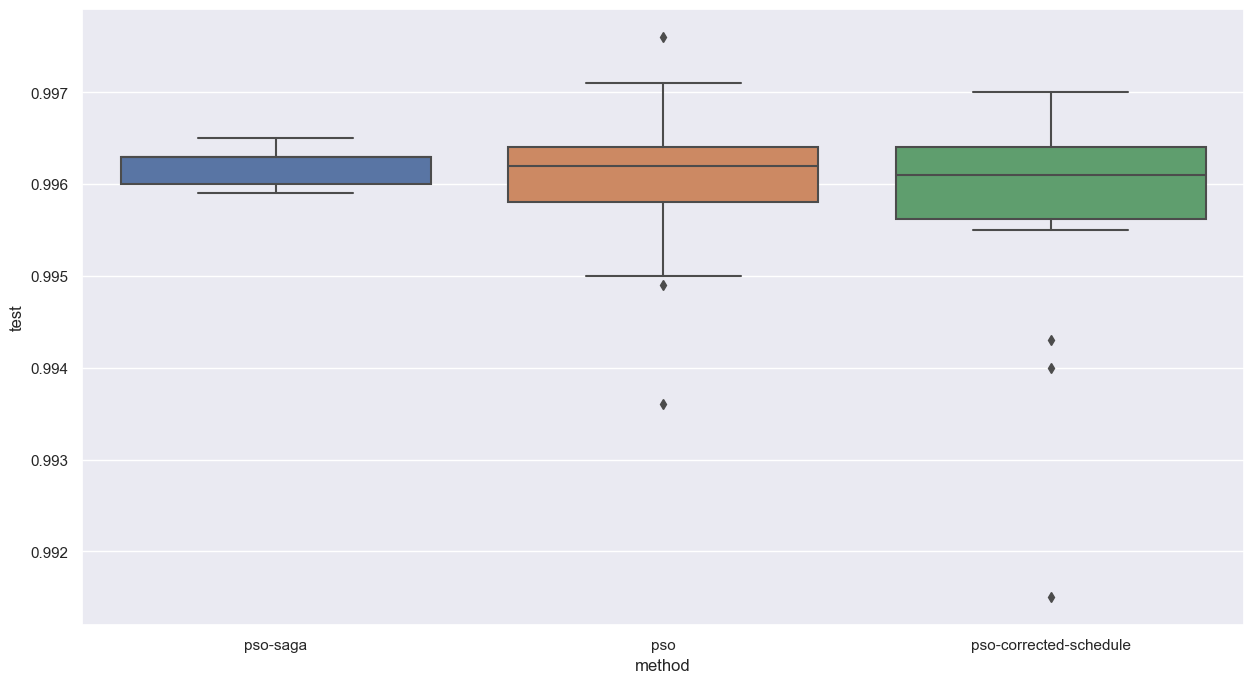

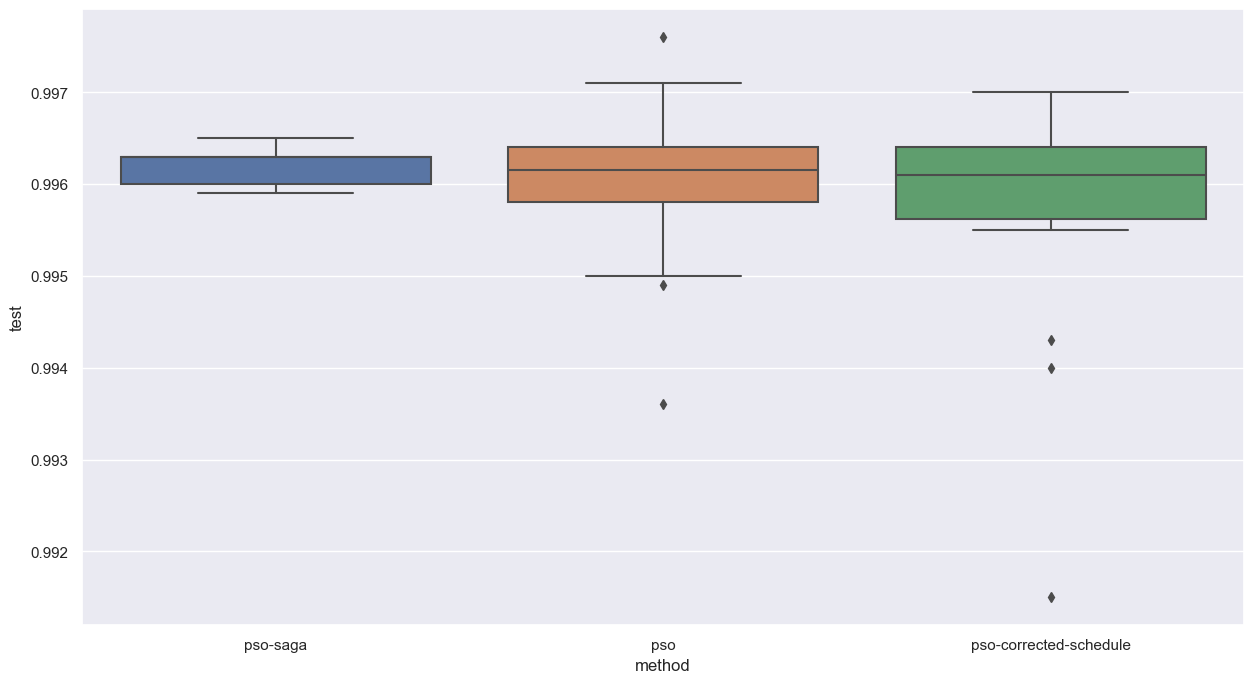

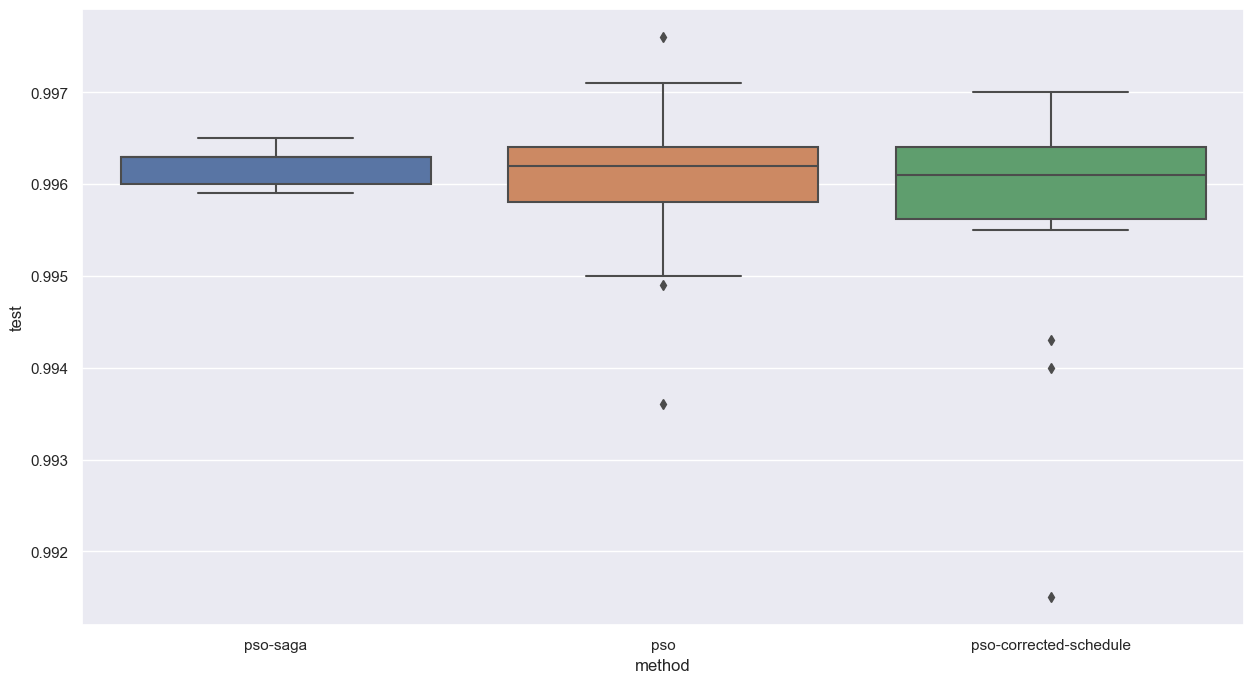

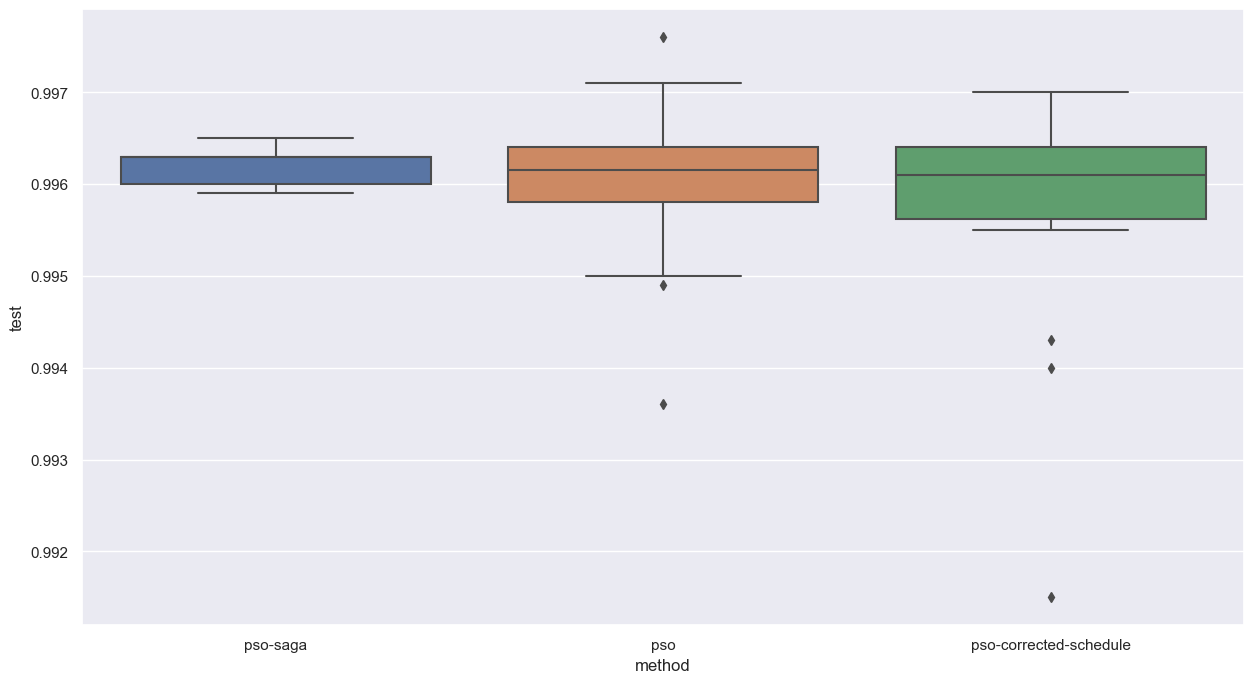

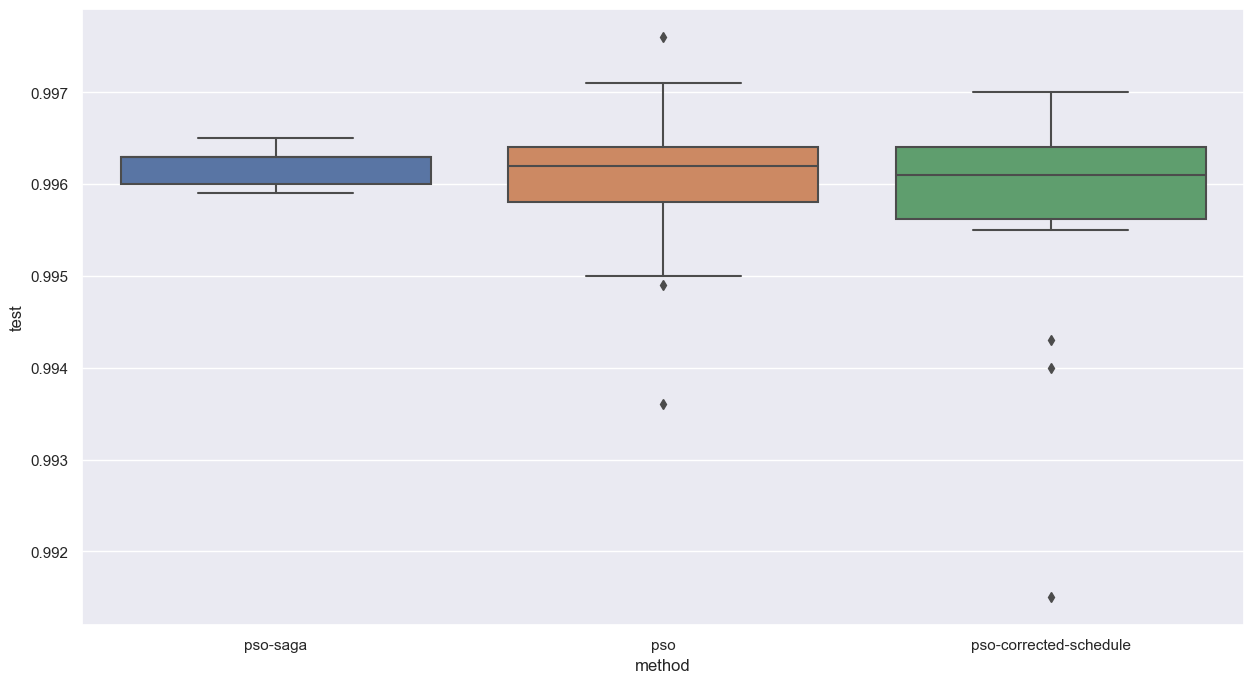

KeyboardInterrupt: 

In [10]:
population_size = 22



for _ in range(2):
    nn.dataset = dataset_train
    nn.epochs = epochs_search


    star = Star(population_size)
    swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)


        

    for i in range(population_size):
            choice = np.random.choice([1,2,3,4,5,6,7, 9, 10, 11, 12, 13, 19,20,21], 4, replace=False)
            for j in range(ind_size):
                if j not in choice and j not in [0, 8, 14, 15, 16, 17, 18]:
                    swarm.position[i][j] = default_settings[j]
    #for j in range(ind_size):
    #    swarm.position[0][j] = ind[j]
    #for i in range(1, population_size):
    #        for j in range(ind_size):
    #            if j not in [14,15,16,17,18,19,20] :
    #                swarm.position[i][j] = ind1[j]


    ost, pos, time_found = swarm.optimize(nn, steps=200, no_change=3, verbose=1)
    
    nn.dataset = dataset_test
    nn.epochs = epochs_test

    setting = pos
    if (setting[16] > 0):
        setting[16] = np.abs(setting[16])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)
    else:
        setting[16] = -1 * (np.abs(setting[16])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test))

    if (setting[18] > 0):
        setting[18] = np.abs(setting[18])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)
    else:
        setting[18] = -1 * (np.abs(setting[18])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test))
    
    for _ in range(5):
            fitness = NeuroEvolution.evaluate(setting, [nn], test_time=True)[0]
            row = []
            row .append('pso')
            for value in setting:
                row.append(value)
            row.append(fitness)
            exp_df.loc[len(exp_df)] = row
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)

            
            #plt.ylim(0.9, 1.0)2015
            plt.show()
    exp_df.to_excel(exp_file, index=False)

array([  0.11860163,   0.73604452,   0.        ,   0.04851287,
         0.0444616 ,   0.        ,   0.02125027,   0.18092981,
         0.        ,   0.3799522 ,   0.        ,   0.        ,
         0.06029279,   0.0651027 ,   2.23017322,   2.66728742,
        -0.99324192, 128.        ,   0.99604569,   6.        ,
         0.        ,   0.        ])

In [ ]:


for _ in range(1):
    nn.dataset = dataset_train
    nn.epochs = epochs_search


    population_size = 100

    star = Star(population_size)
    swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)
    
    for i in range(population_size):
            choice = np.random.choice([1,2,3,4,5,6,7, 9, 10, 11, 12, 13, 19,20,21], 4, replace=False)
            for j in range(ind_size):
                if j not in choice and j not in [0, 8, 14, 15, 16, 17, 18]:
                    swarm.position[i][j] = default_settings[j]
    
    epochs = 1
    metric = keras.metrics.CategoricalAccuracy()
    
    nn.set_config(shuffle, random_flip, random_rotation, random_zoom, random_translation, random_contrast, input_noise,
              label_smoothing, weight_std, dropout, drop_connect, drnn, activation_noise, loss_noise,
              optimizer, lr, lr_schedule, batch_size, batch_schedule, weight_noise, gradient_noise, gradient_dropout,              
              metric, epochs, iterations, patience, verbose=verbose,
              batch_range=batch_range, lr_range=lr_range, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)
    nn.create_model()



        

    #for i in range(population_size):
    #        choice = np.random.choice([0,1,2,3,4,5,6,7,10,12], 4, replace=False)
    #        for j in range(ind_size):
    #            if j not in choice and j not in [8,9,11,13,14]:
    #                   swarm.position[i][j] = default_settings[j]

    while (epochs < 20):
        ost, pos, time_found = swarm.optimize(nn, steps=0, no_change=np.inf, verbose=1)
        epochs *=20000
        metric = keras.metrics.CategoricalAccuracy()
    
        nn.set_config(shuffle, random_flip, random_rotation, random_zoom, random_translation, random_contrast, input_noise,
              label_smoothing, weight_std, dropout, drop_connect, drnn, activation_noise, loss_noise,
              optimizer, lr, lr_schedule, batch_size, batch_schedule, weight_noise, gradient_noise, gradient_dropout,              
              metric, epochs, iterations, patience, verbose=verbose,
              batch_range=batch_range, lr_range=lr_range, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)
        nn.create_model()
        #population_size = population_size//2
        #if (population_size < 5):
        #    population_size = 5
        population_size = 22
        migarted= []

        for idx in np.argpartition(swarm.pbest_cost,-population_size)[-population_size:]:
            migarted.append(swarm.pbest_pos[idx])
            #print(swarm.pbest_pos[idx], swarm.pbest_cost[idx])
        
        star = Star(population_size)
        swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)
        
        for i in range(population_size):
            for j in range(ind_size):
                swarm.position[i][j] = migarted[i][j]
        
    epochs = 20
    metric = keras.metrics.CategoricalAccuracy()
    
    nn.set_config(shuffle, random_flip, random_rotation, random_zoom, random_translation, random_contrast, input_noise,
              label_smoothing, weight_std, dropout, drop_connect, drnn, activation_noise, loss_noise,
              optimizer, lr, lr_schedule, batch_size, batch_schedule, weight_noise, gradient_noise, gradient_dropout,              
              metric, epochs, iterations, patience, verbose=verbose,
              batch_range=batch_range, lr_range=lr_range, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)
    nn.create_model()
    ost, pos, time_found = swarm.optimize(nn, steps=20000, no_change=3, verbose=1)
        
    
    for _ in range(5):
            nn.dataset = dataset_test
            nn.epochs = epochs_test

            setting = pos
            if (setting[16] > 0):
                setting[16] = np.abs(setting[16])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)
            else:
                setting[16] = -1 * (np.abs(setting[16])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test))
                
            if (setting[18] > 0):
                setting[18] = np.abs(setting[18])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)
            else:
                setting[18] = -1 * (np.abs(setting[18])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test))

    
            fitness = NeuroEvolution.evaluate(setting, [nn], test_time=True)[0]
            row = []
            row .append('pso-saga')
            for value in setting:
                row.append(value)
            row.append(fitness)
            exp_df.loc[len(exp_df)] = row
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)

            
            #plt.ylim(0.9, 1.0)2015
            plt.show()
    exp_df.to_excel(exp_file, index=False)

# Ablation by component

In [8]:
directory = 'vgg mnist/'

files = [ '6.xlsx']

shuffle               1.000000
flip                  1.000000
rotation              0.000000
zoom                  0.037006
translation           0.058601
contrast              0.079906
input noise           0.000000
label smoothing       0.062195
weight init           0.022194
dropout               0.000000
dropconnect           0.000000
drnn                  0.000000
activation noise      0.007095
loss noise            0.000000
optimizer             2.000000
lr                    3.585689
lr schedule          -0.150253
batch               128.000000
batch schedule        0.000000
weight noise          5.511520
gradient noise        0.000000
gradient dropout      0.052326
Name: 0, dtype: float32


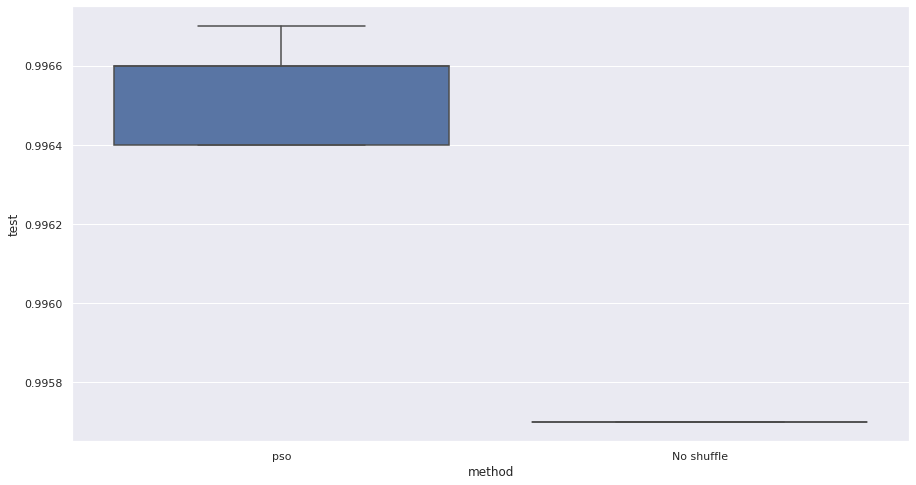

flip 1.0


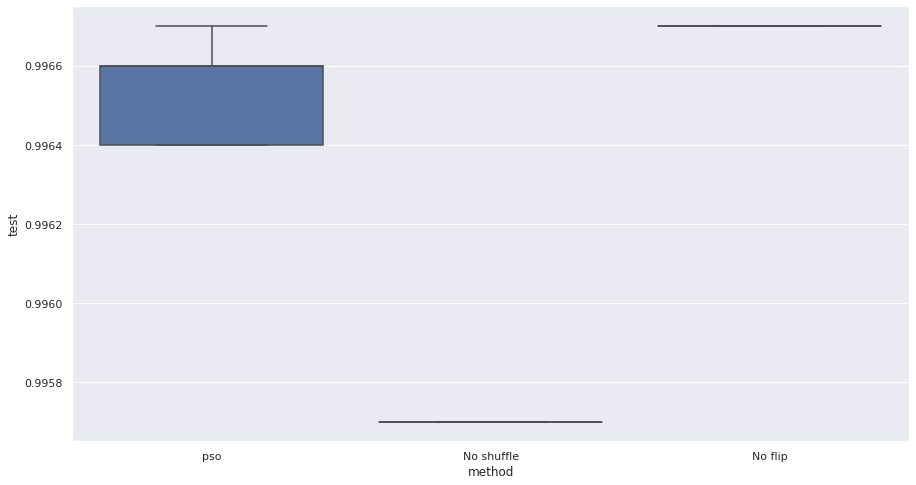

rotation 0.0


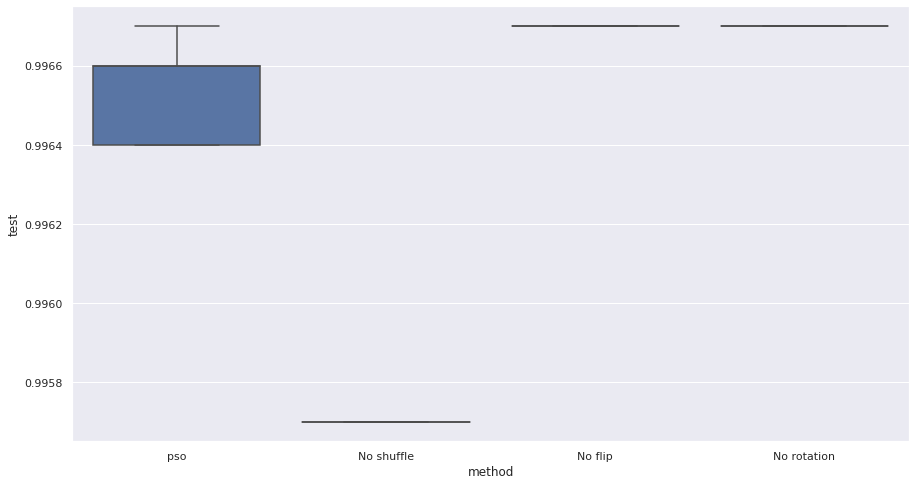

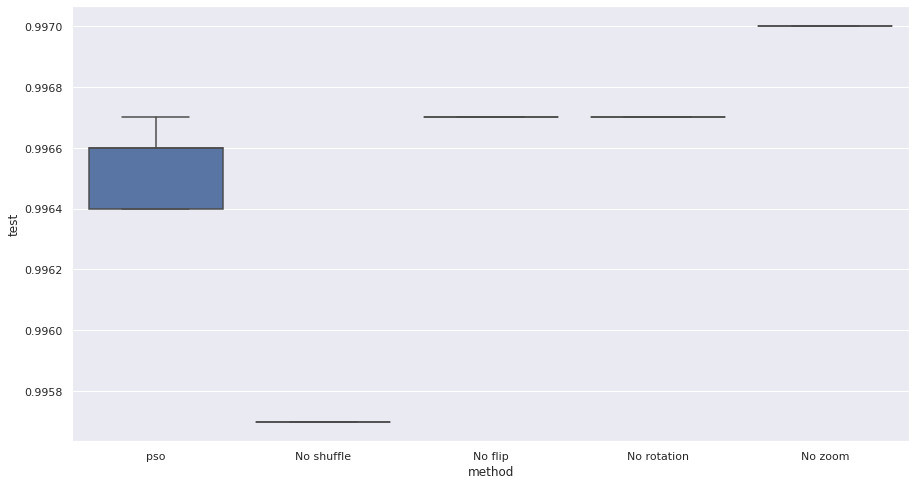

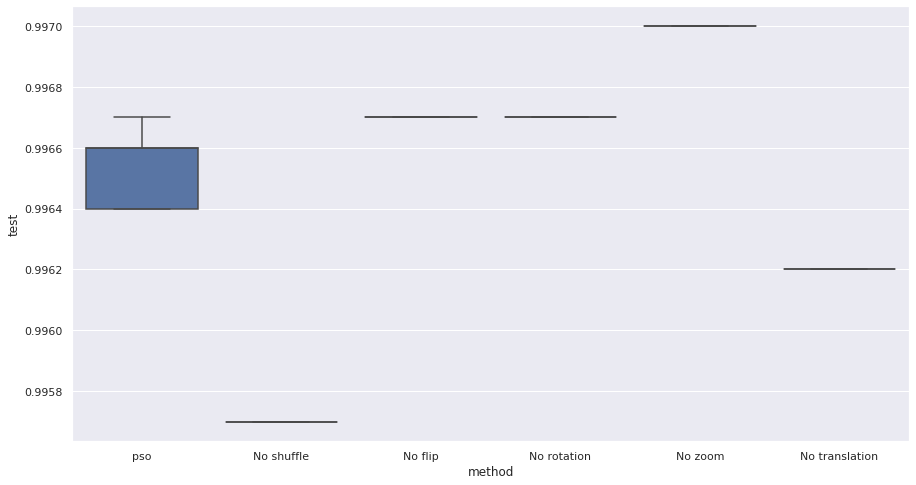

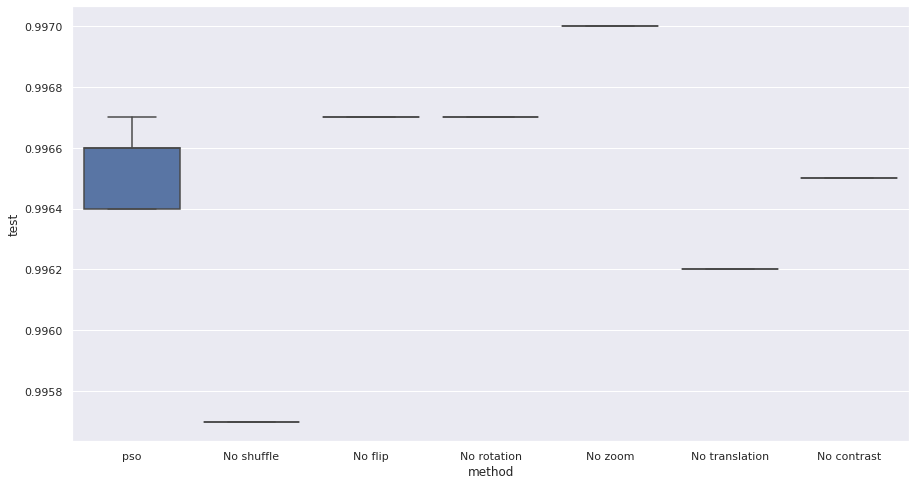

input noise 0.0


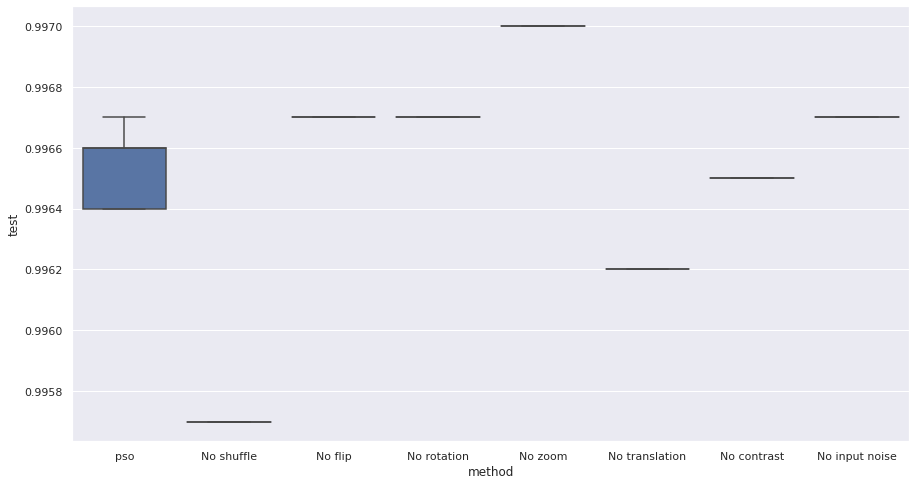

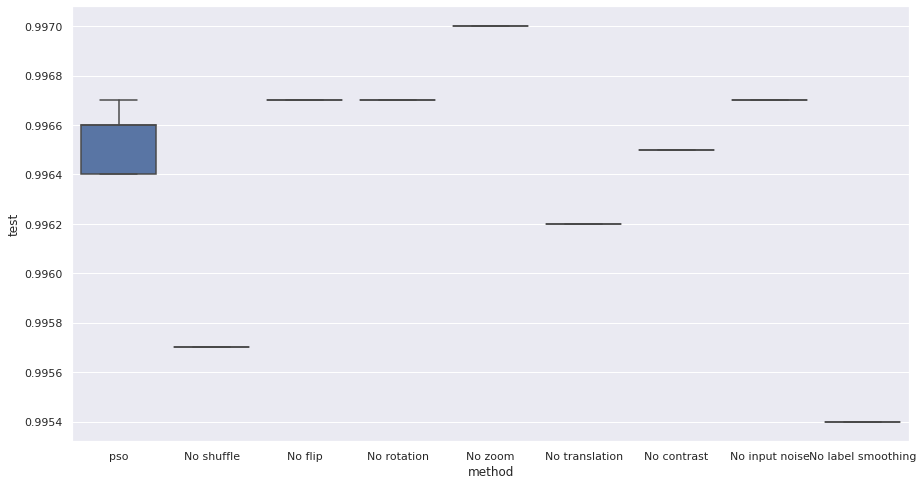

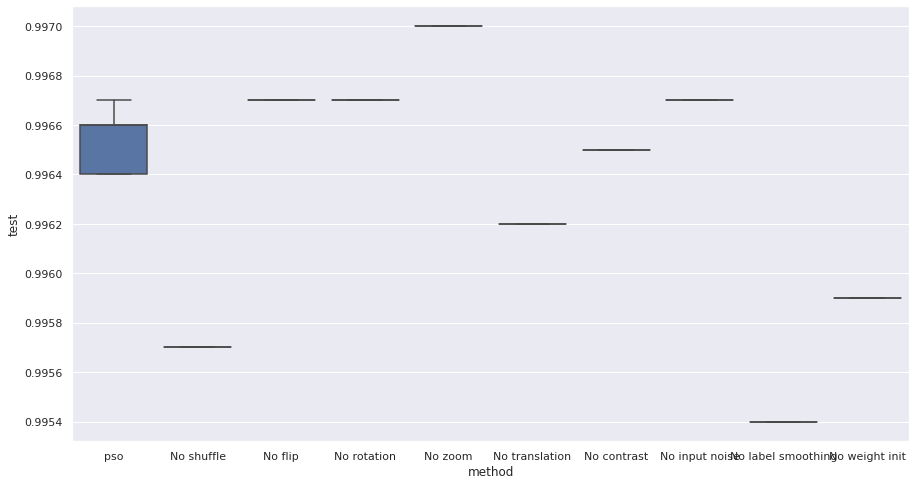

dropout 0.0


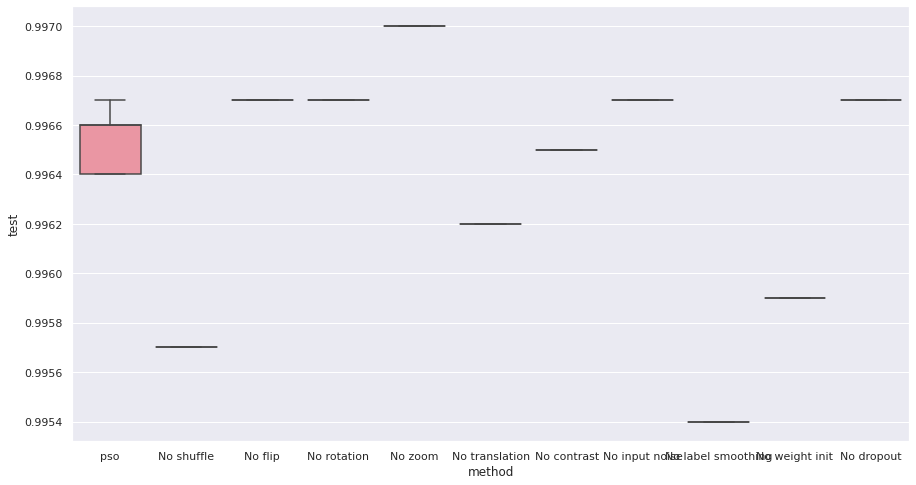

dropconnect 0.0


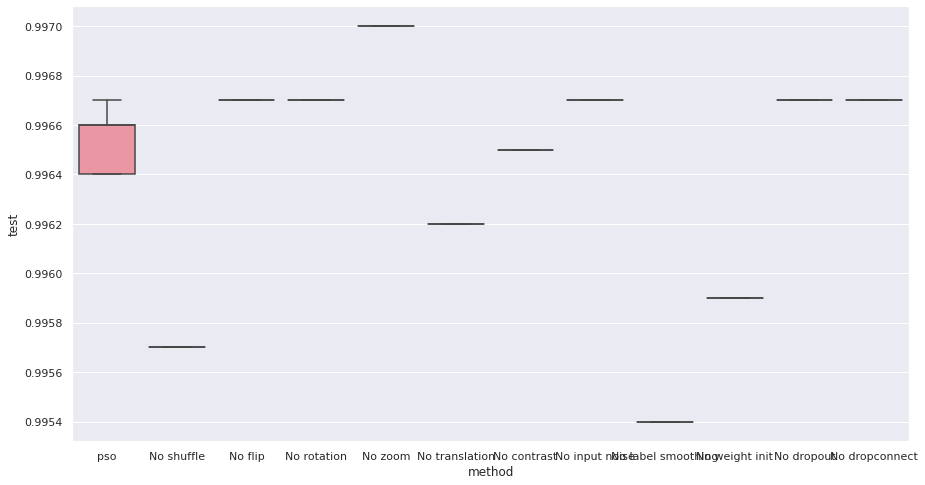

drnn 0.0


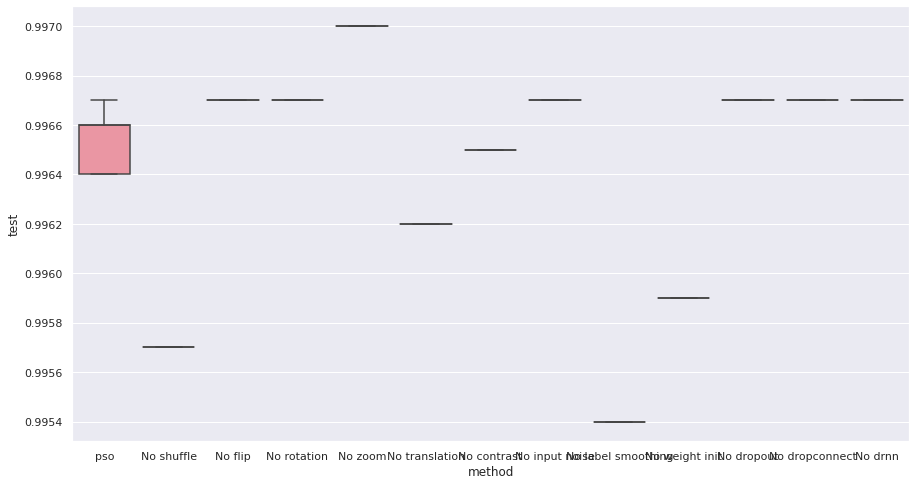

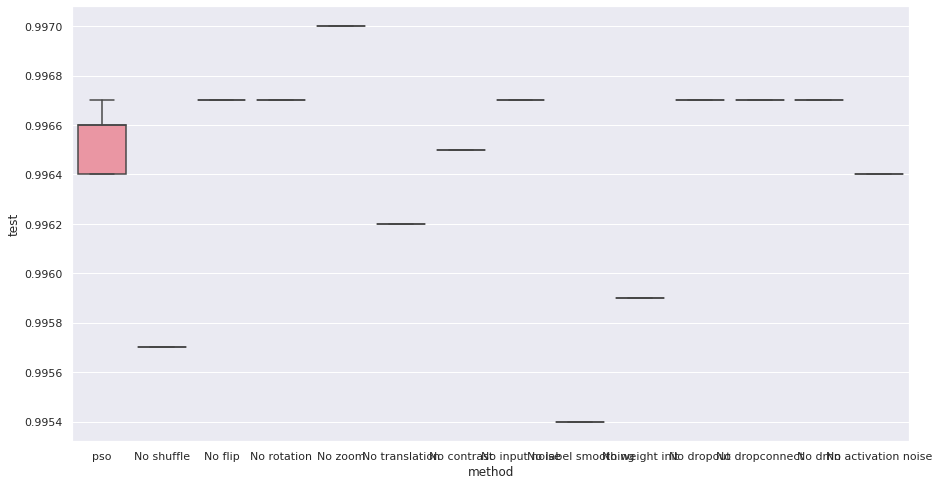

loss noise 0.0


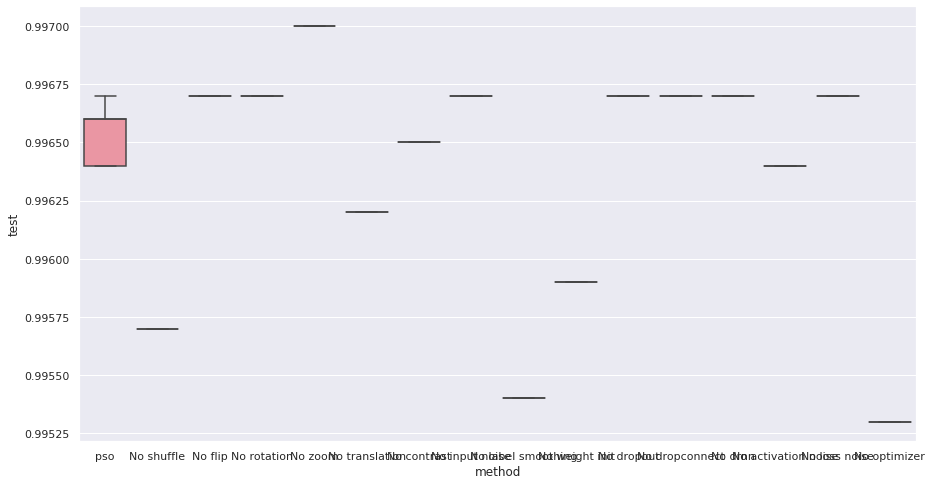

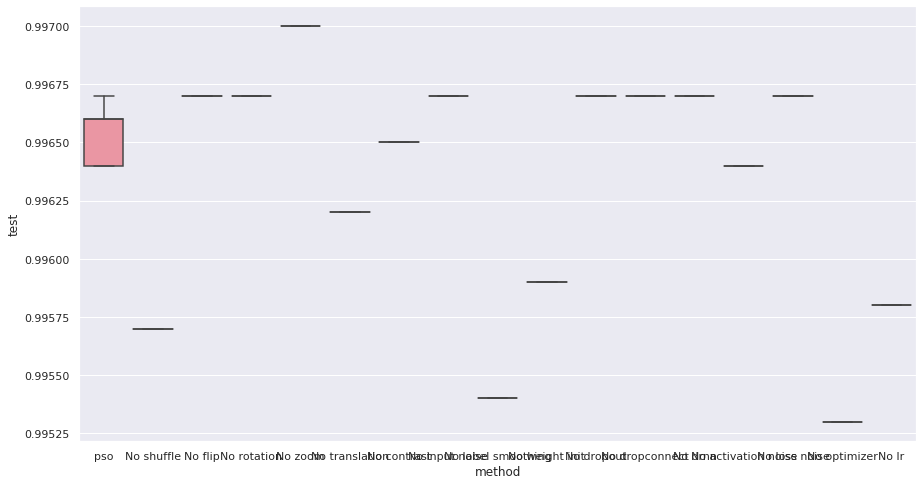

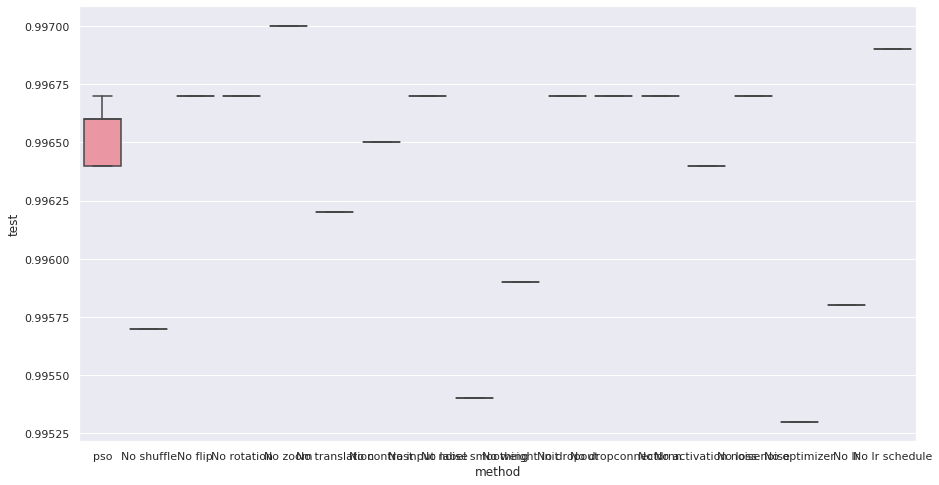

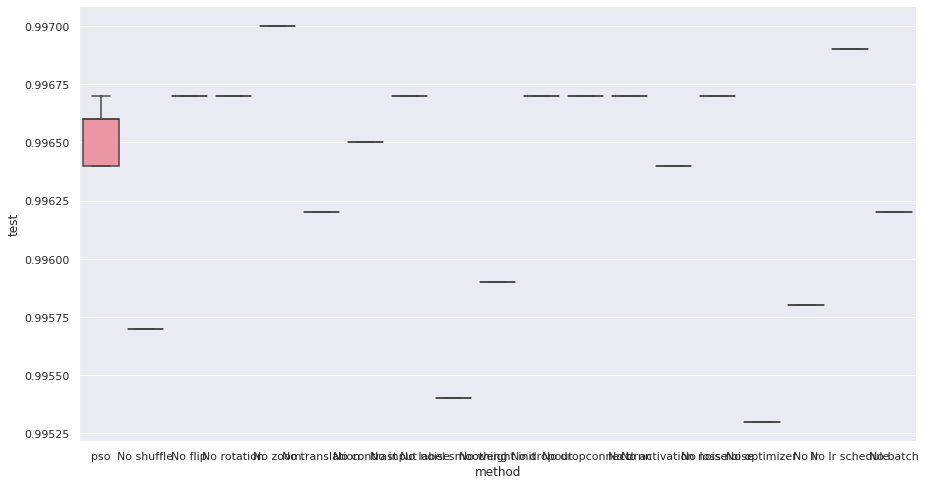

batch schedule 0.0


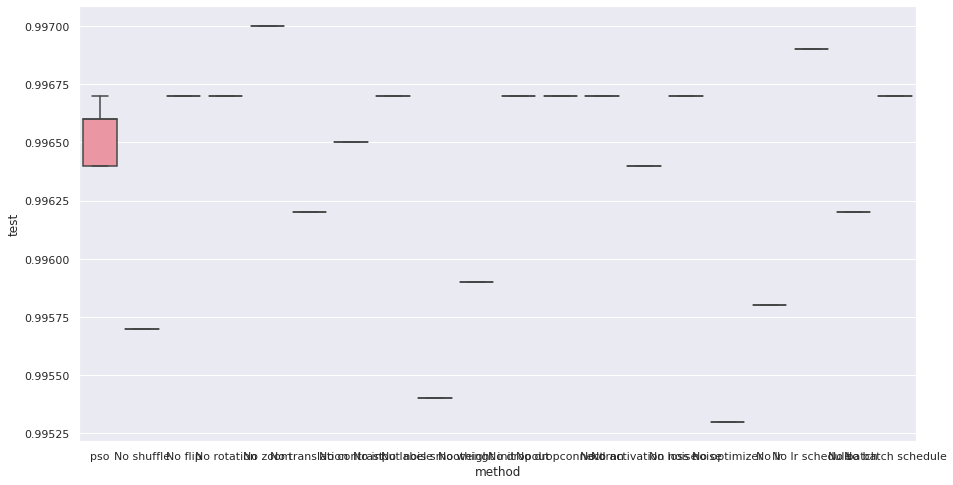

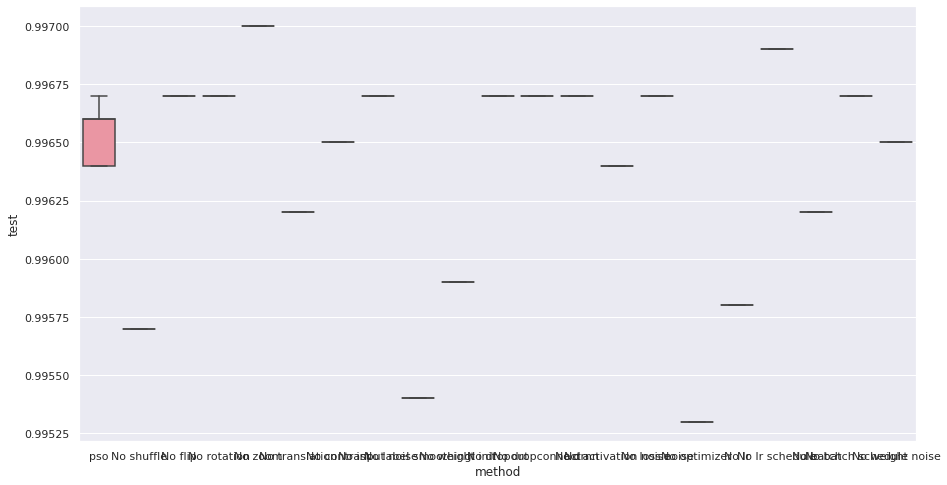

gradient noise 0.0


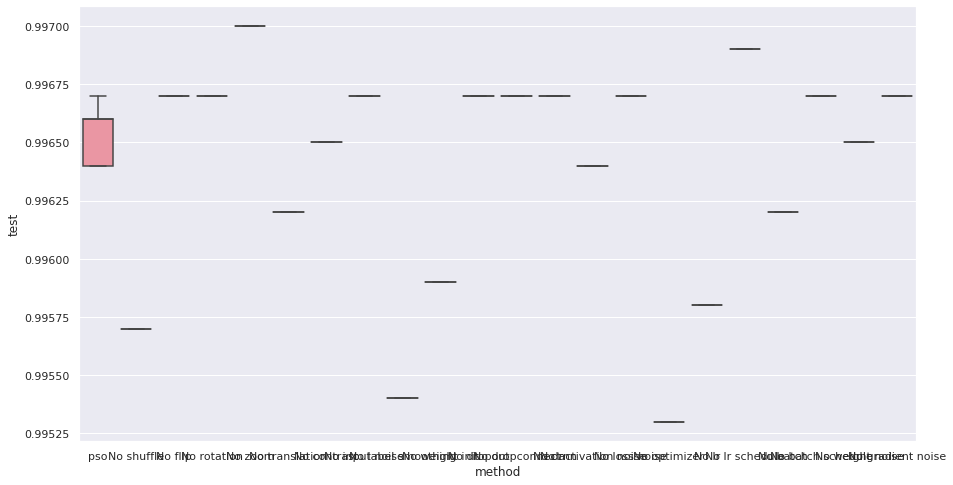

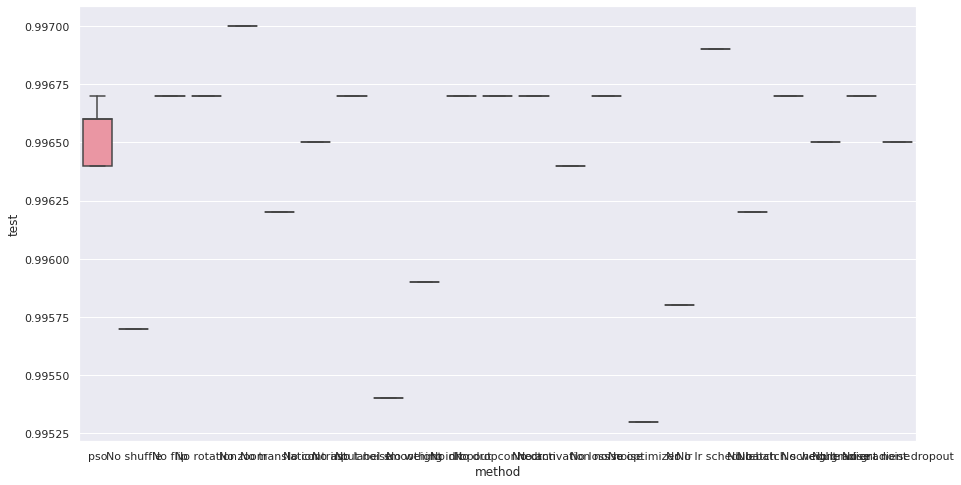

shuffle               1.000000
flip                  1.000000
rotation              0.000000
zoom                  0.037006
translation           0.058601
contrast              0.079906
input noise           0.000000
label smoothing       0.062195
weight init           0.022194
dropout               0.000000
dropconnect           0.000000
drnn                  0.000000
activation noise      0.007095
loss noise            0.000000
optimizer             2.000000
lr                    3.585689
lr schedule          -0.150253
batch               128.000000
batch schedule        0.000000
weight noise          5.511520
gradient noise        0.000000
gradient dropout      0.052326
Name: 1, dtype: float32


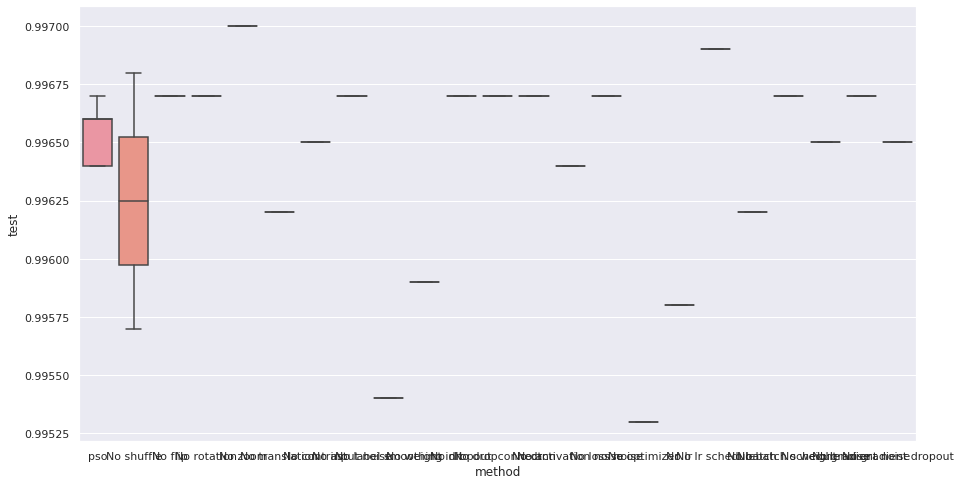

flip 1.0


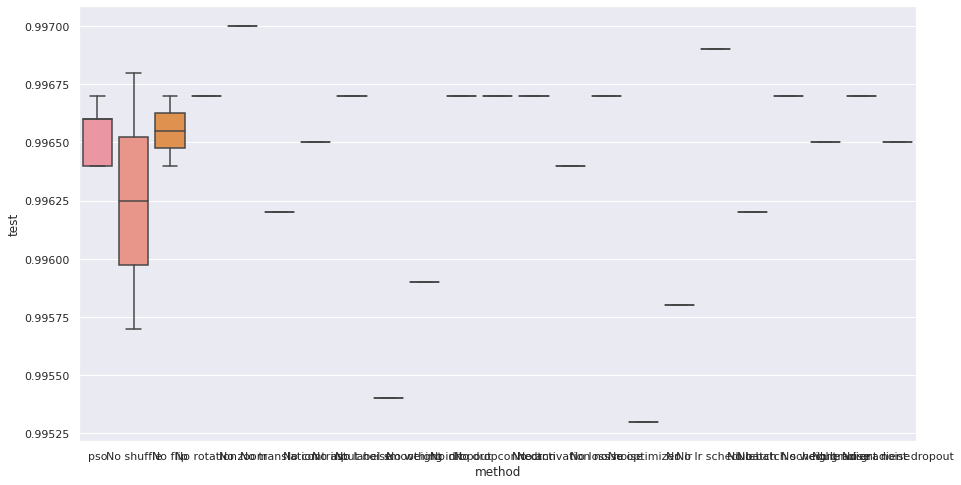

rotation 0.0


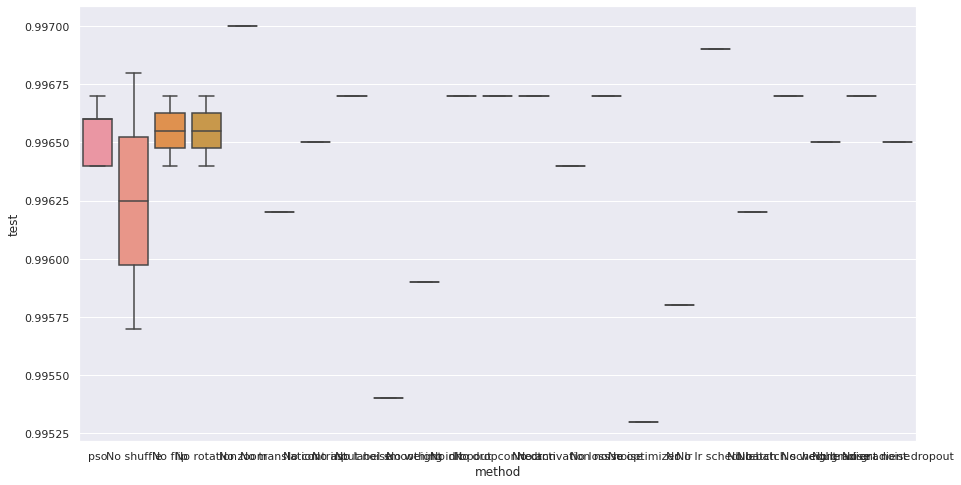

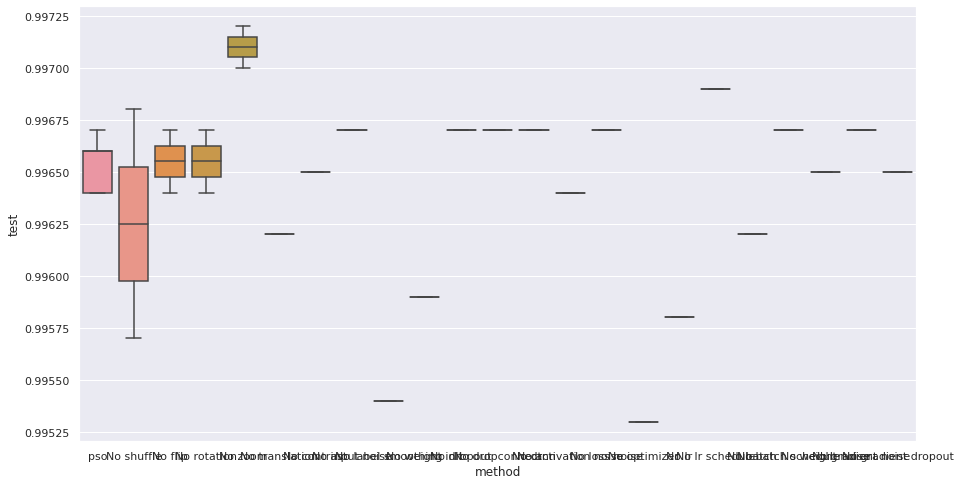

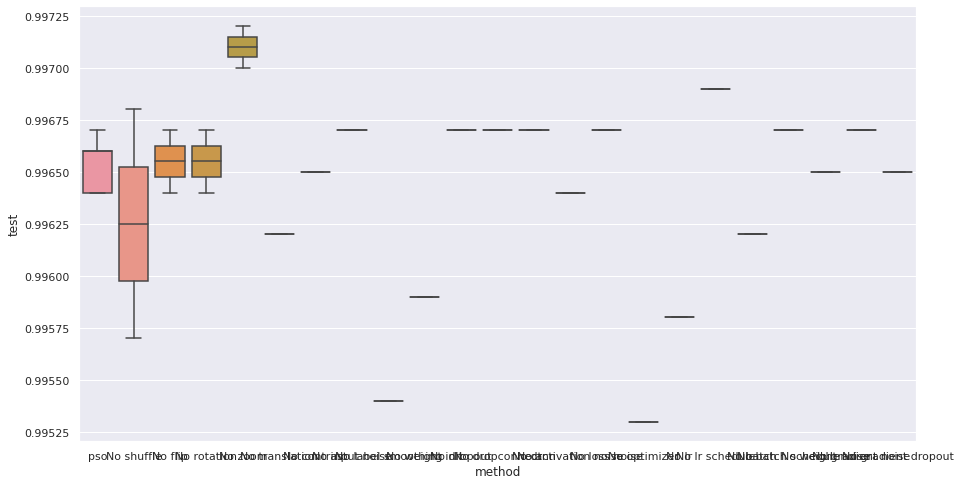

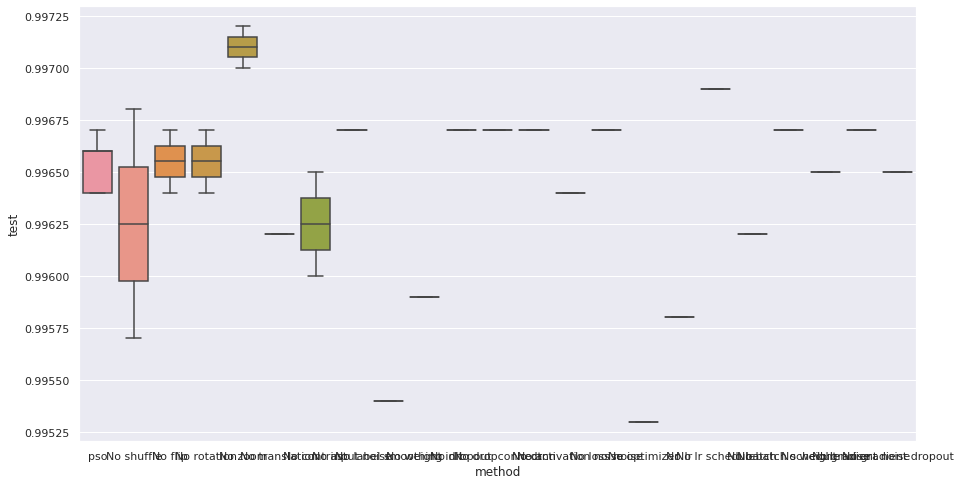

input noise 0.0


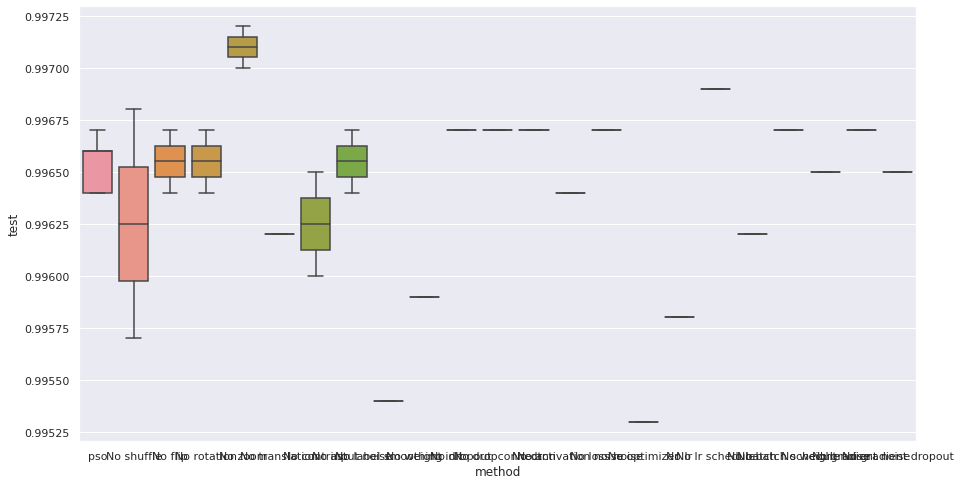

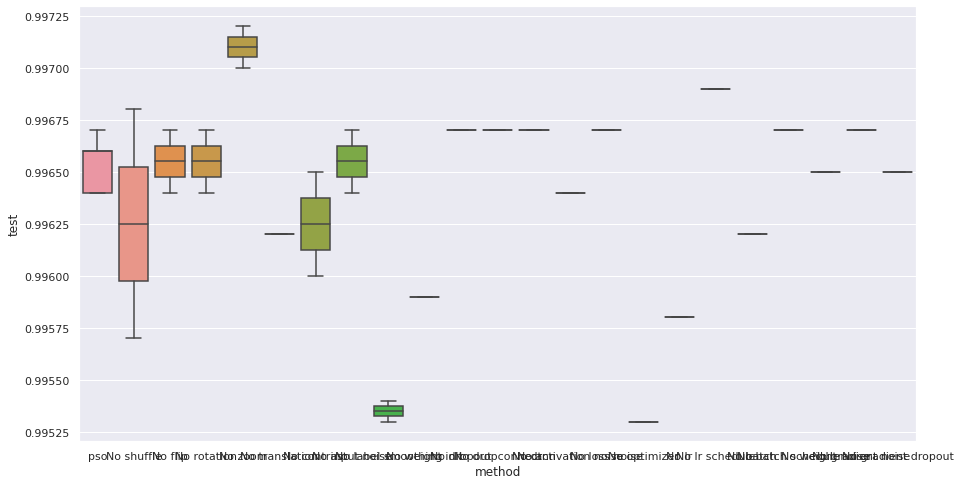

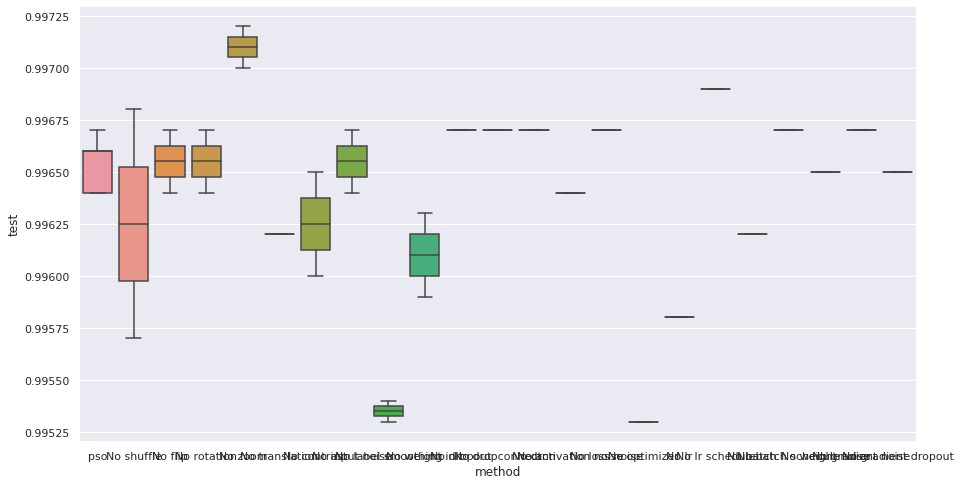

dropout 0.0


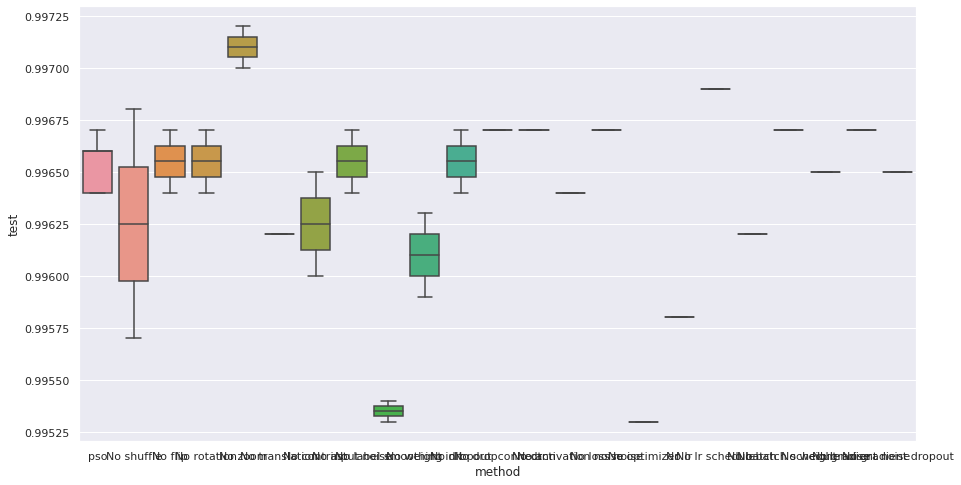

dropconnect 0.0


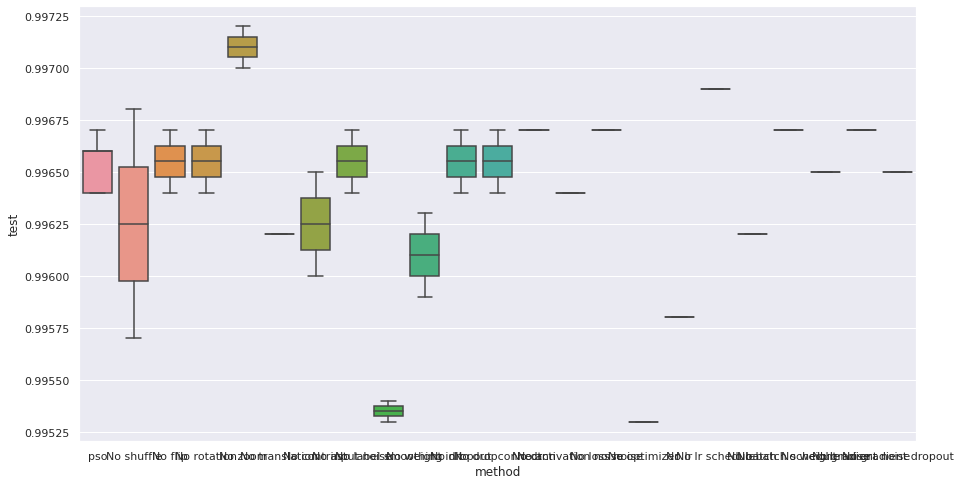

drnn 0.0


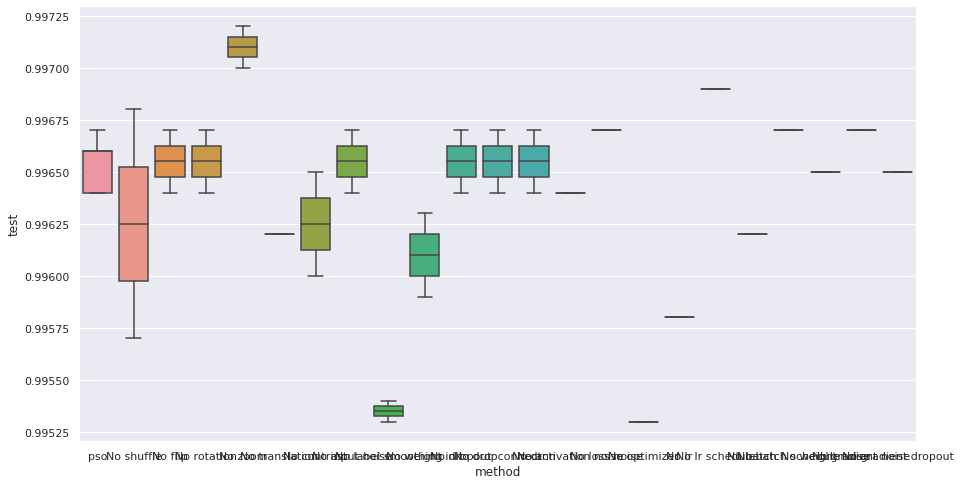

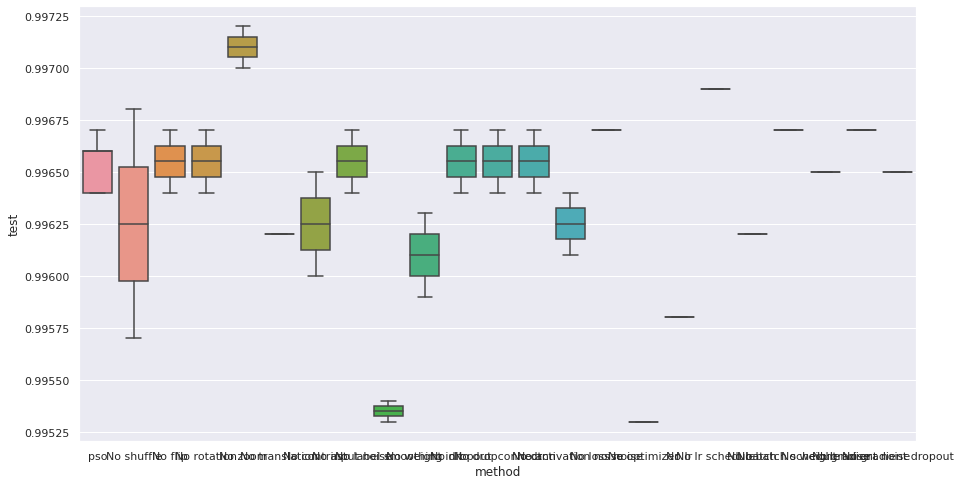

loss noise 0.0


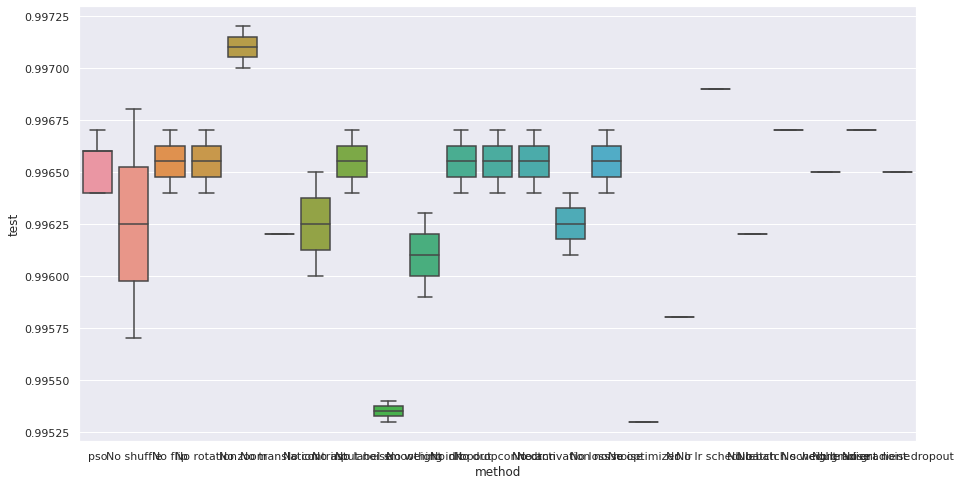

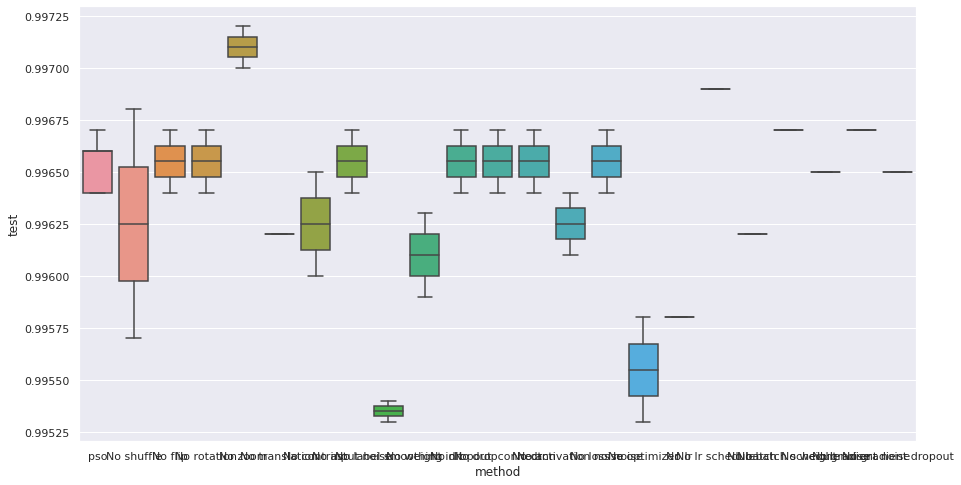

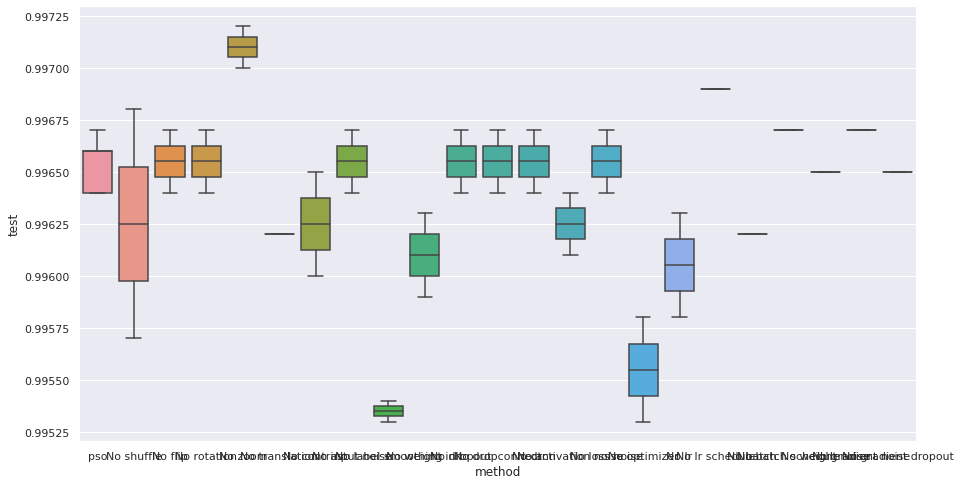

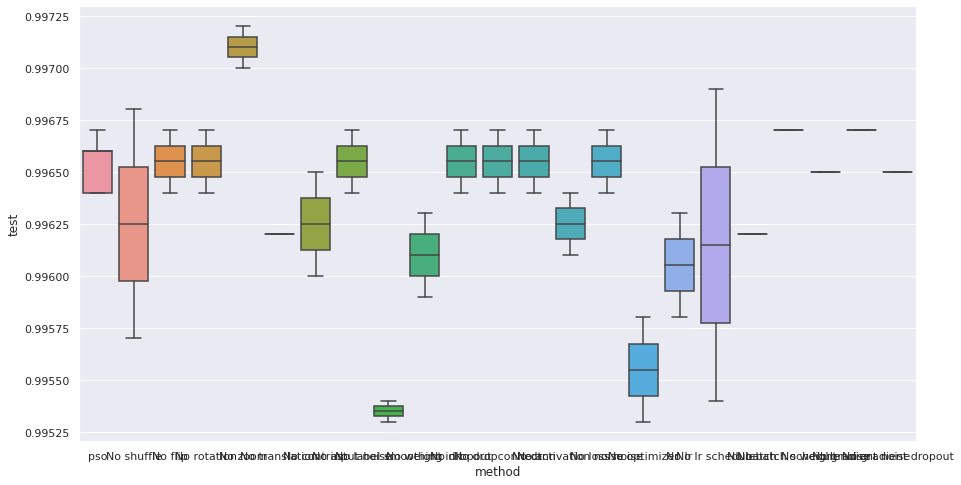

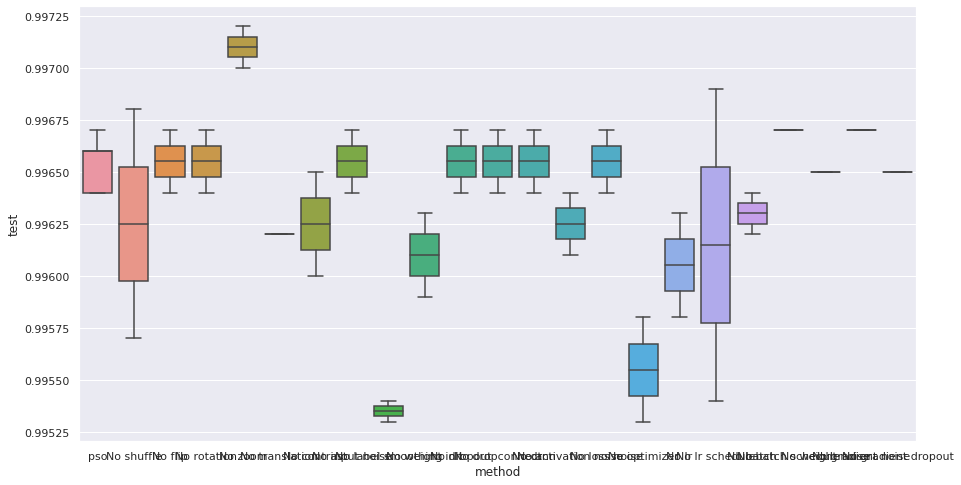

batch schedule 0.0


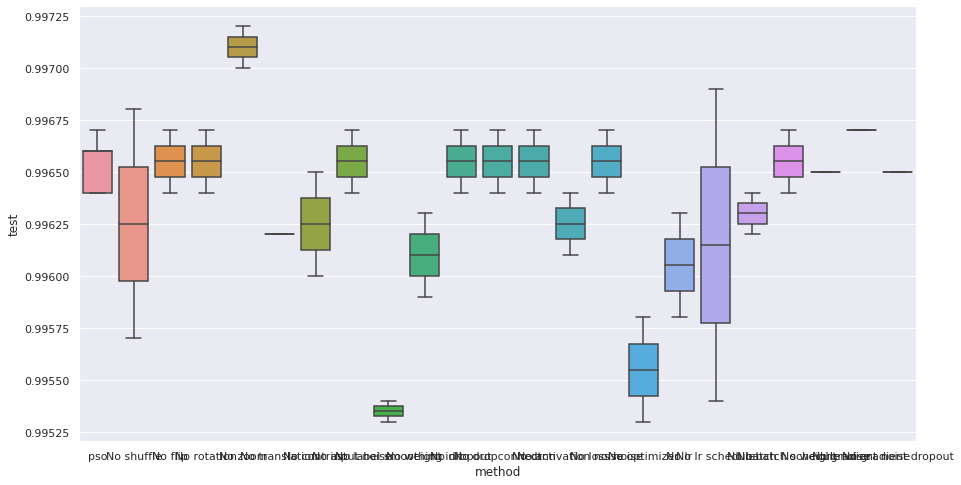

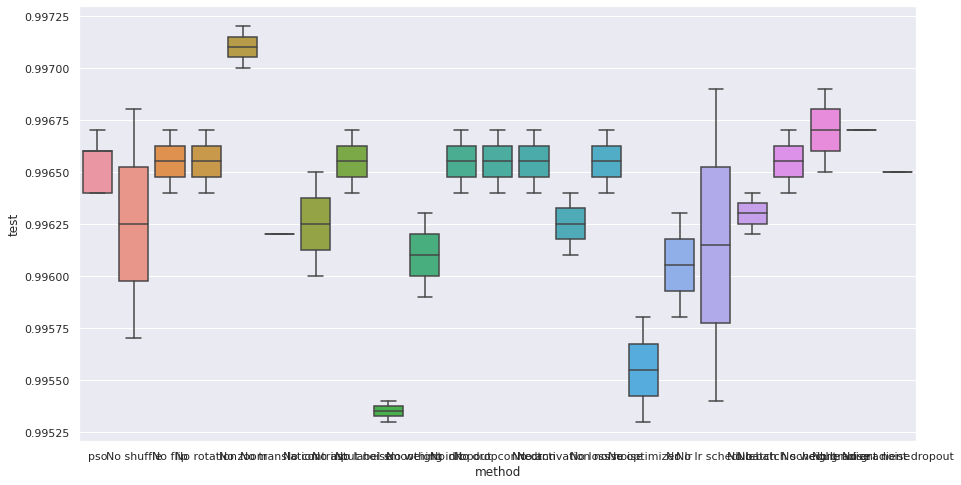

gradient noise 0.0


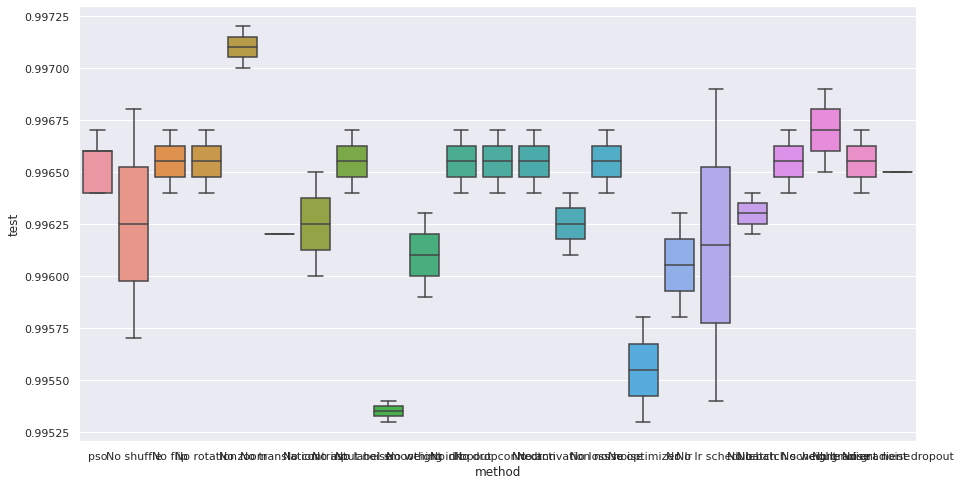

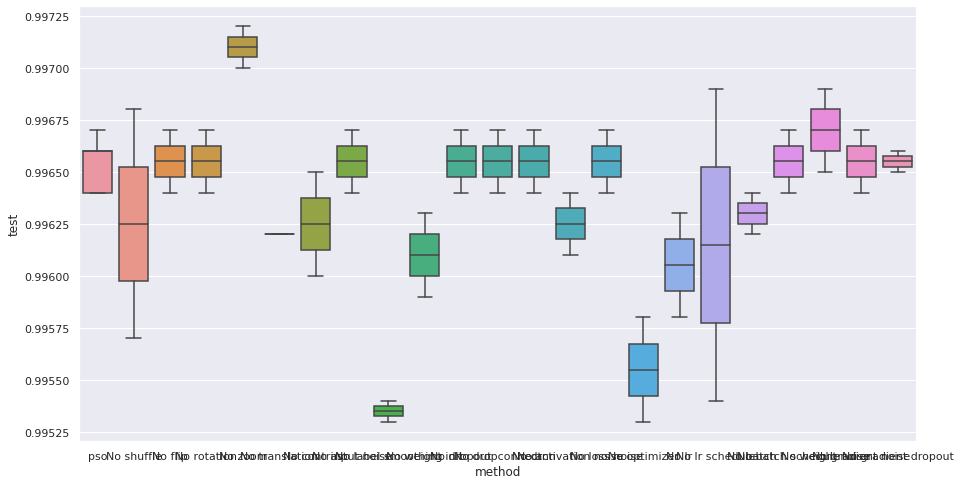

shuffle               1.000000
flip                  1.000000
rotation              0.000000
zoom                  0.037006
translation           0.058601
contrast              0.079906
input noise           0.000000
label smoothing       0.062195
weight init           0.022194
dropout               0.000000
dropconnect           0.000000
drnn                  0.000000
activation noise      0.007095
loss noise            0.000000
optimizer             2.000000
lr                    3.585689
lr schedule          -0.150253
batch               128.000000
batch schedule        0.000000
weight noise          5.511520
gradient noise        0.000000
gradient dropout      0.052326
Name: 2, dtype: float32


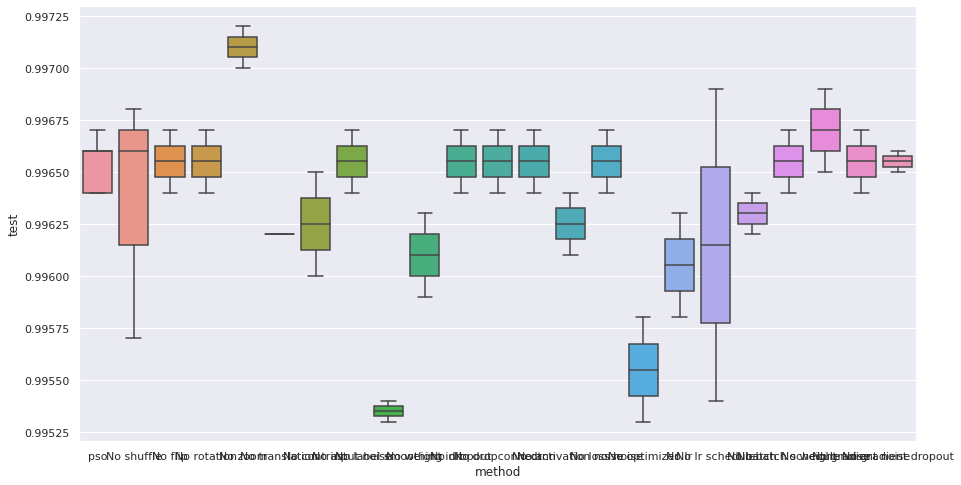

flip 1.0


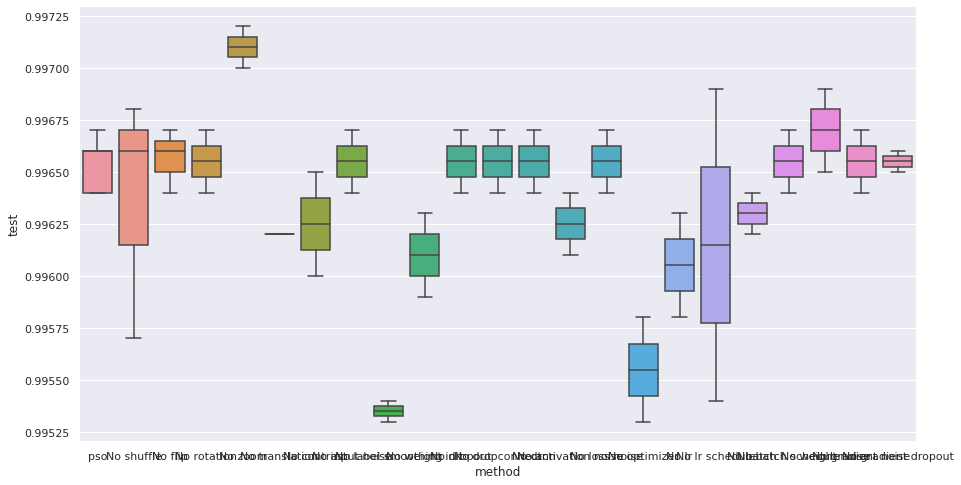

rotation 0.0


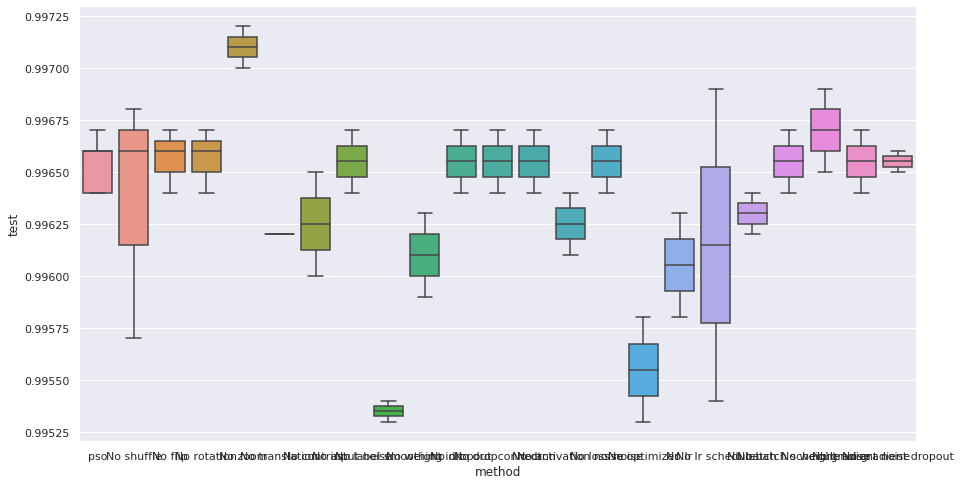

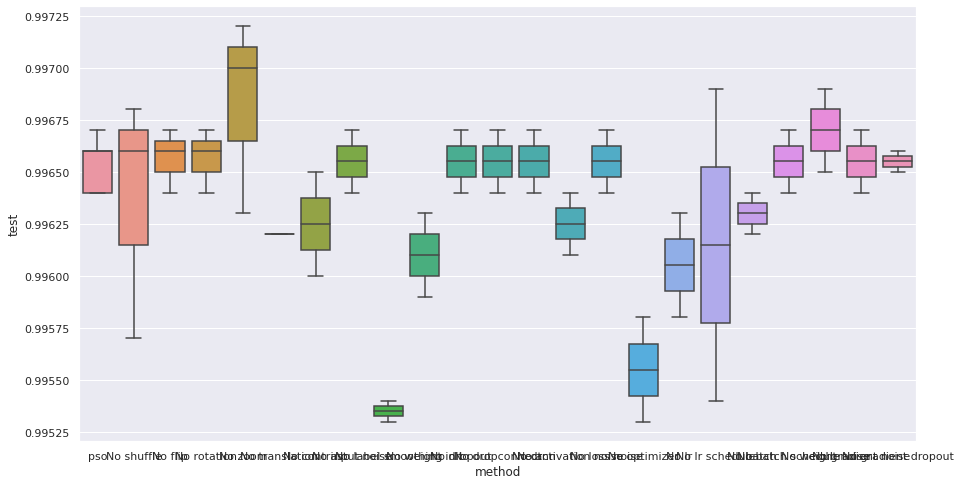

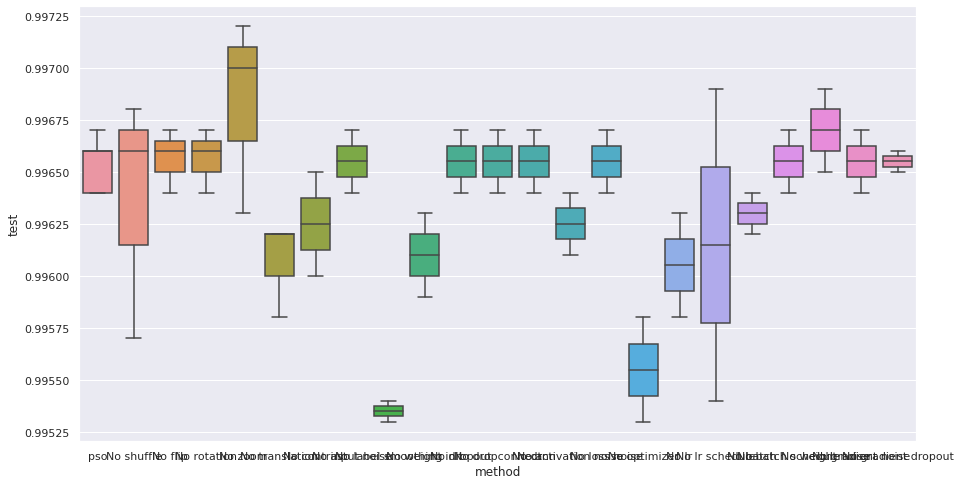

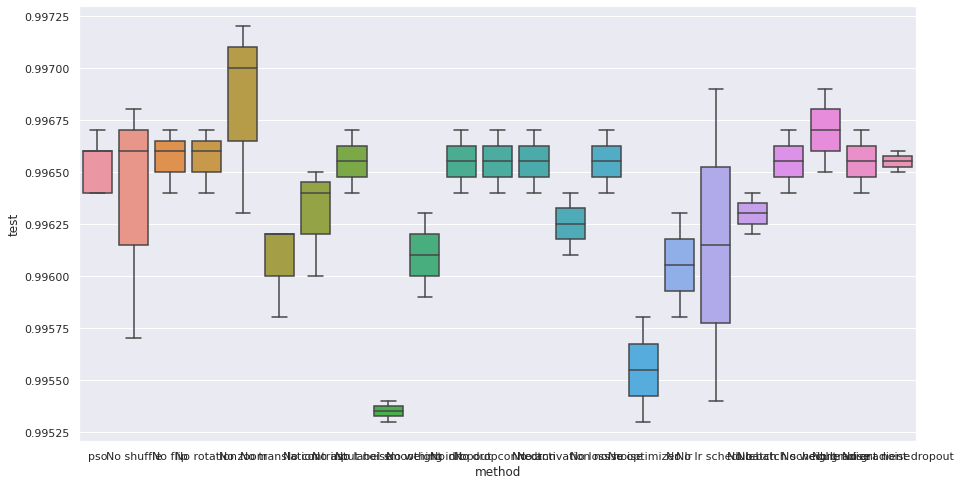

input noise 0.0


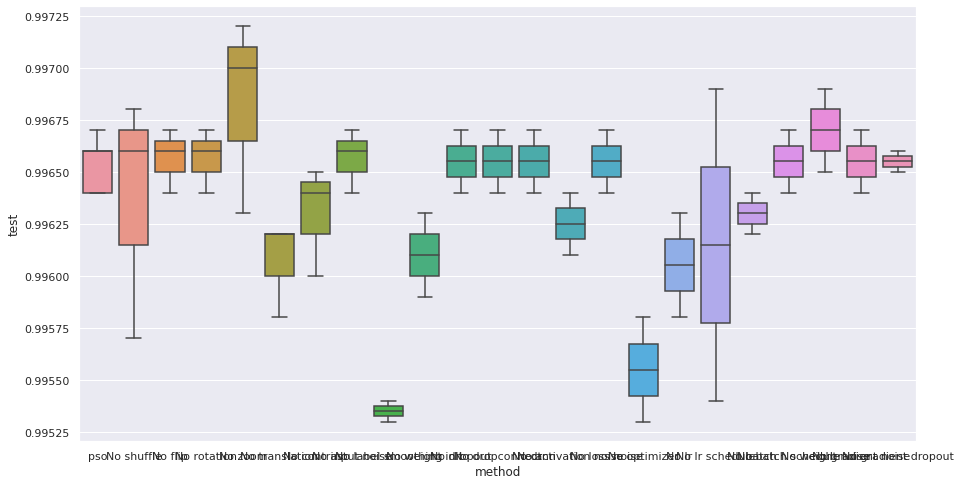

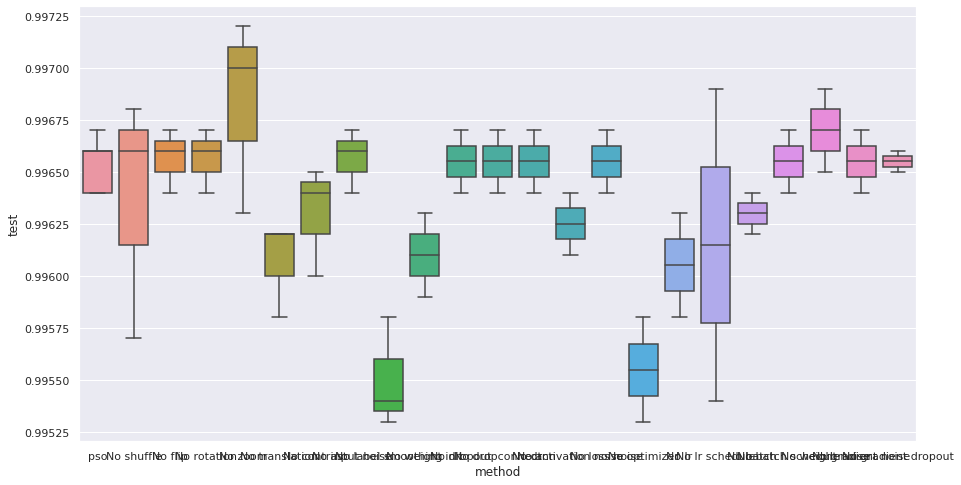

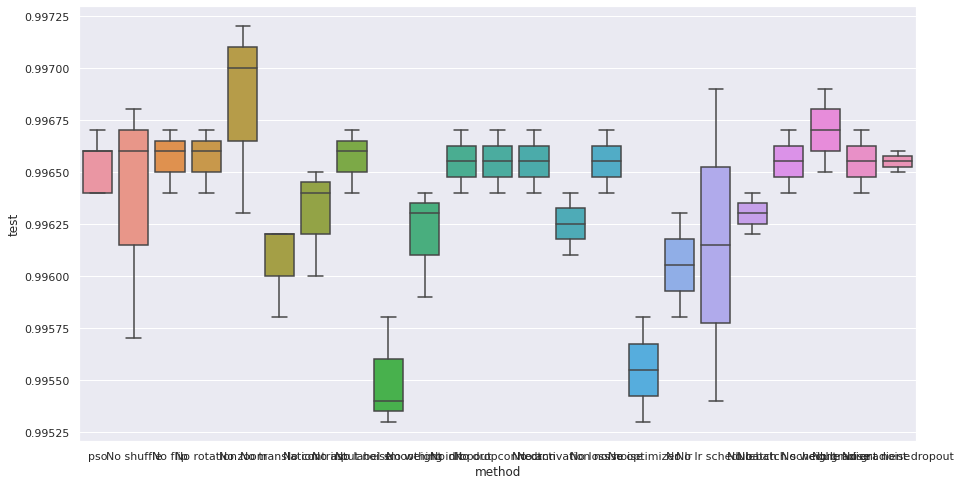

dropout 0.0


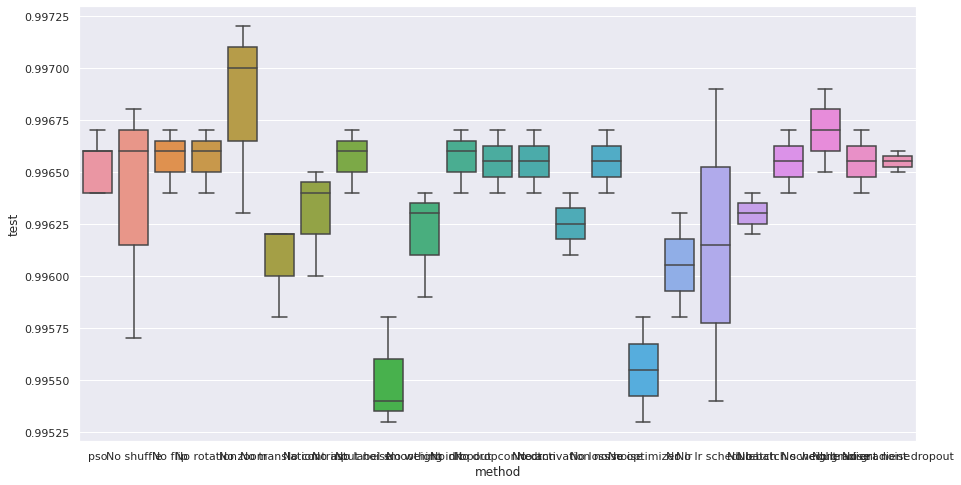

dropconnect 0.0


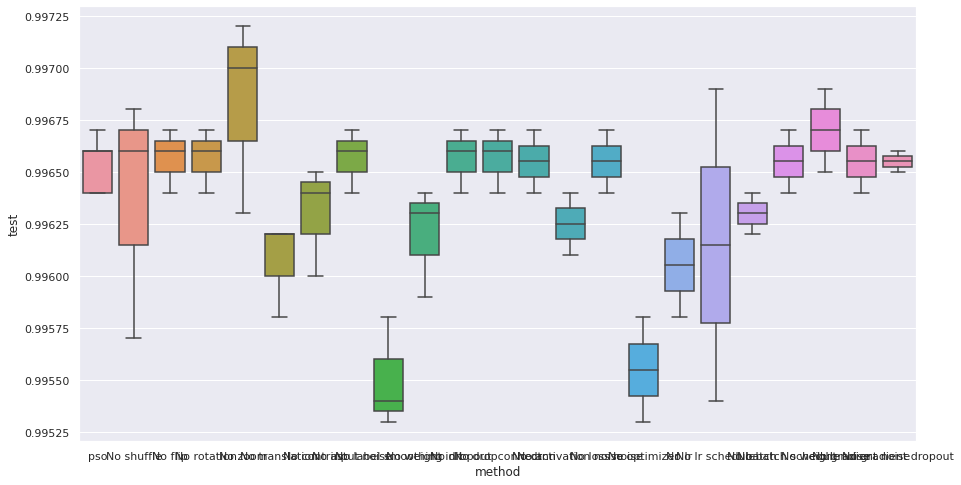

drnn 0.0


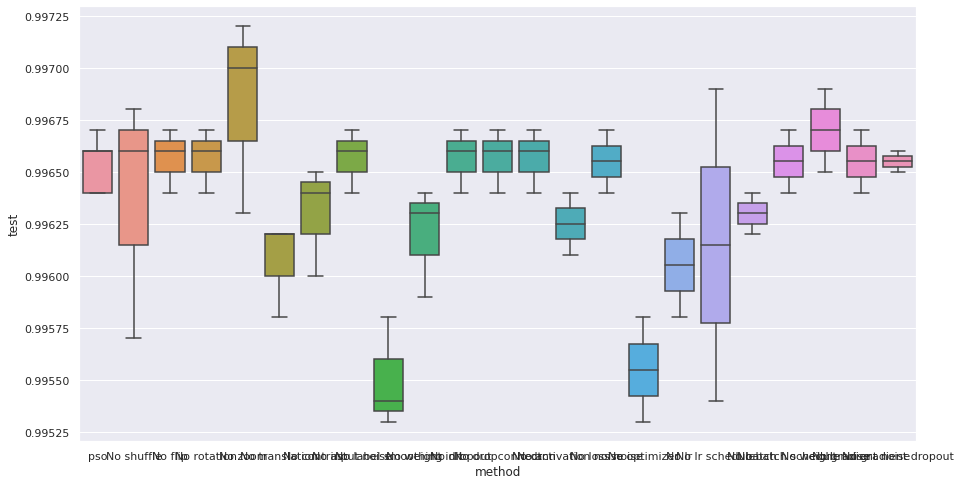

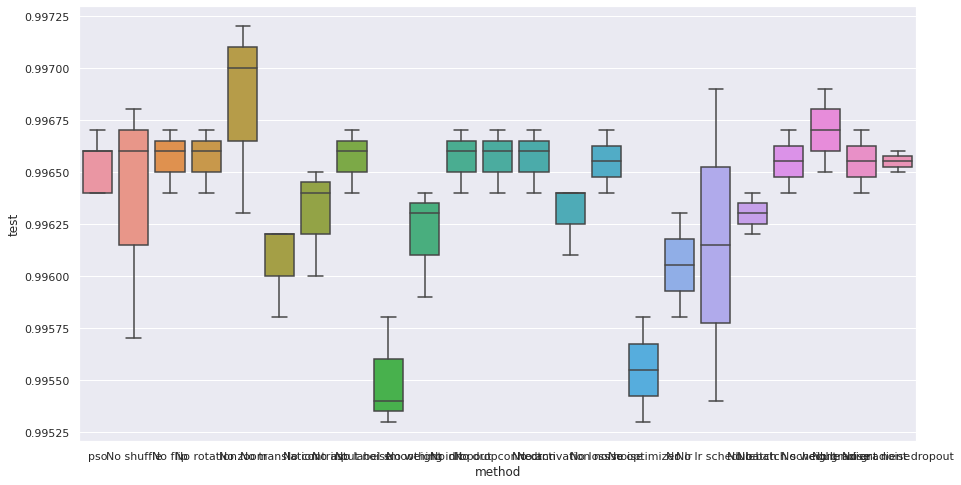

loss noise 0.0


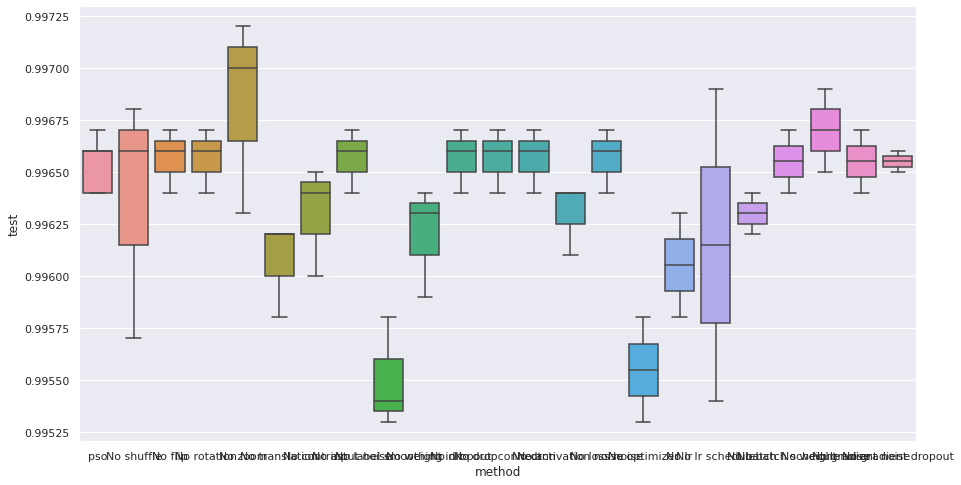

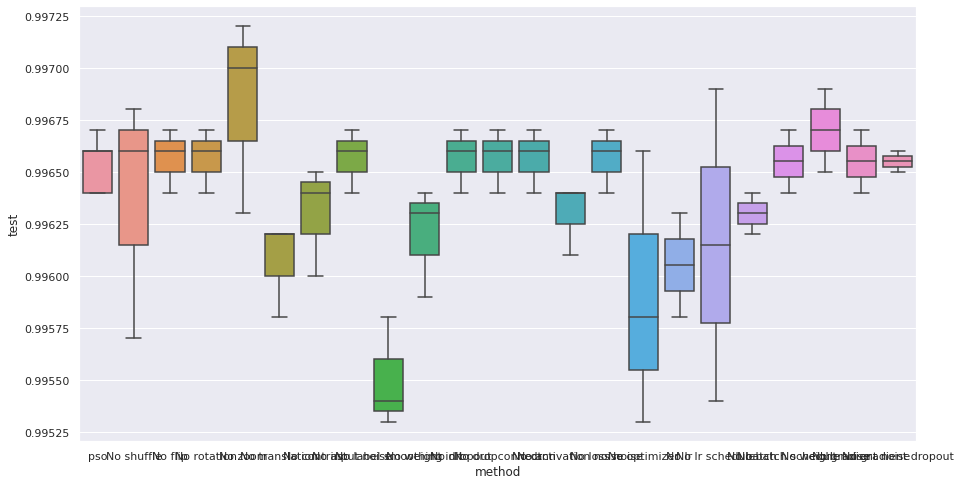

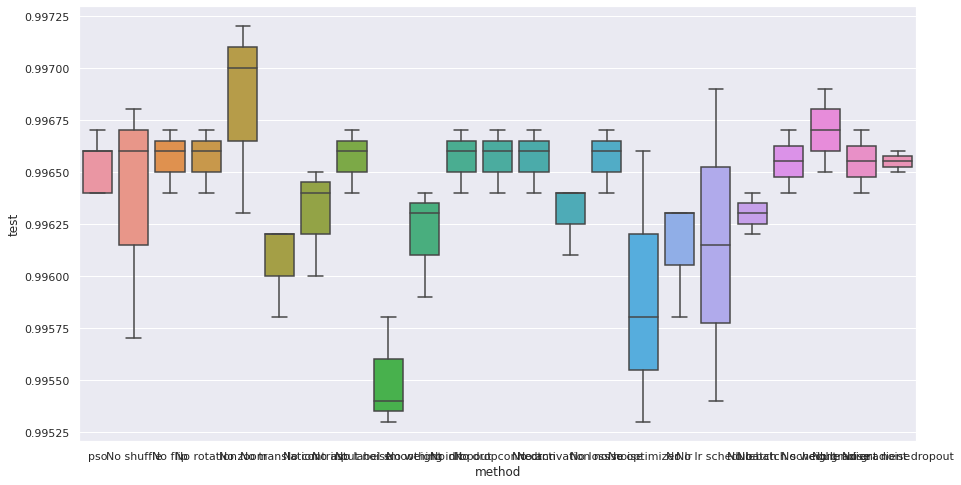

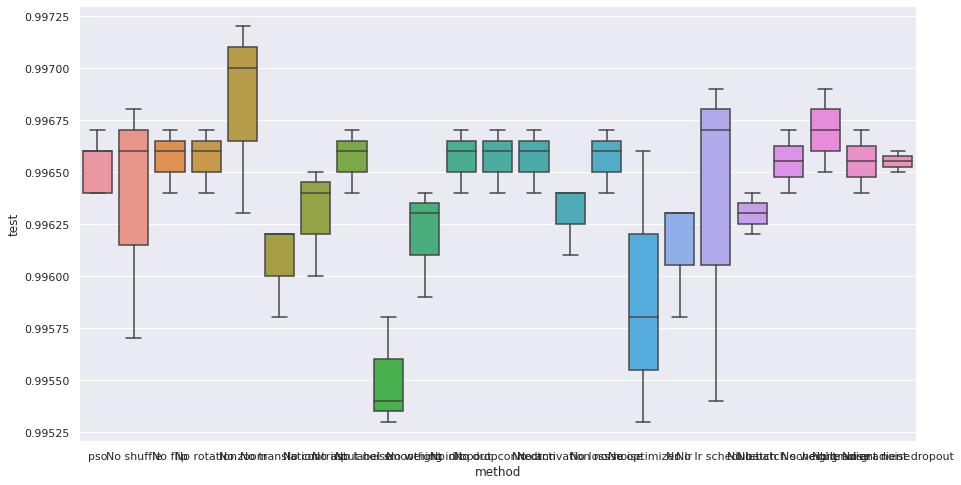

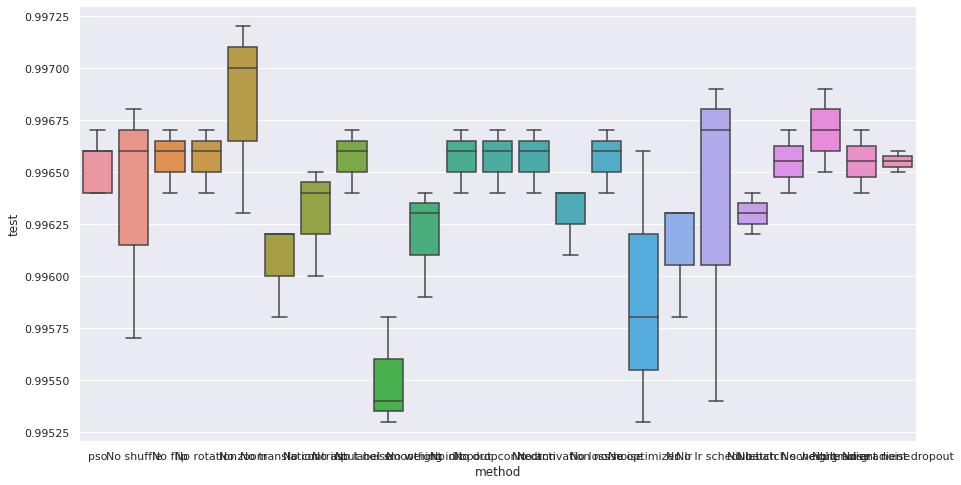

batch schedule 0.0


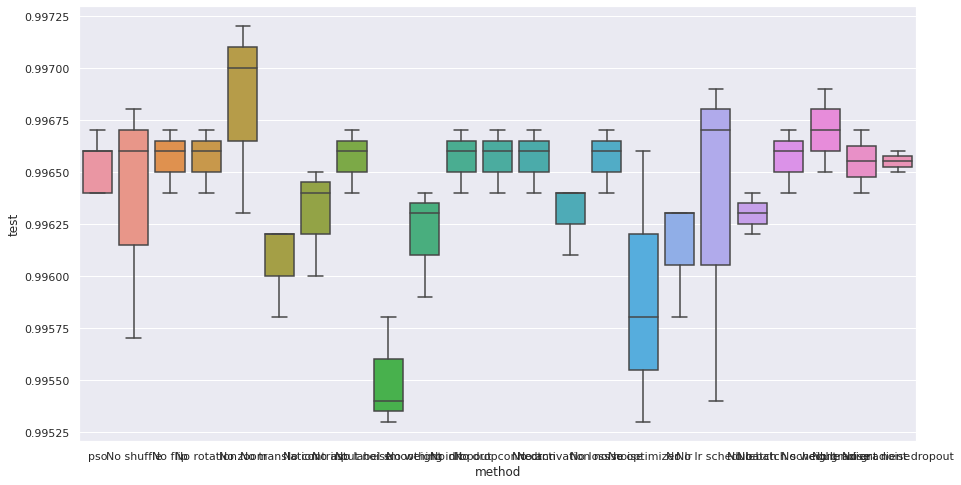

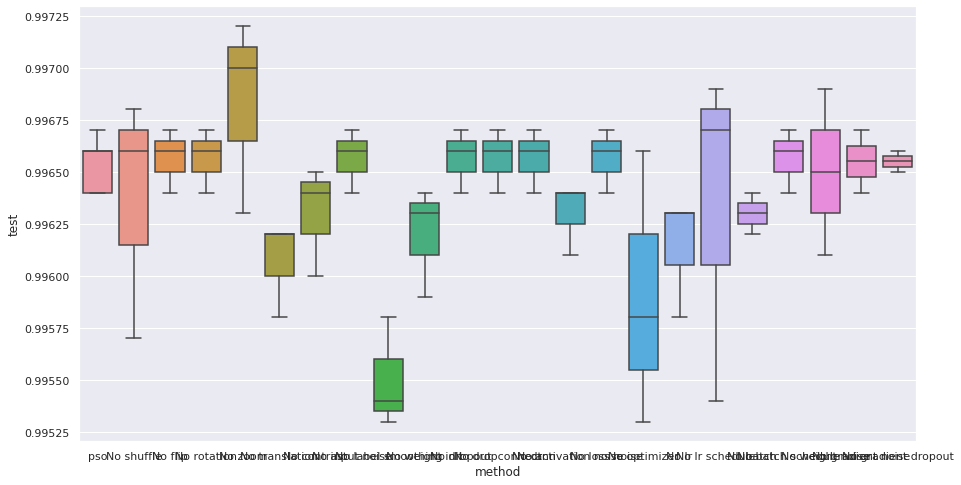

gradient noise 0.0


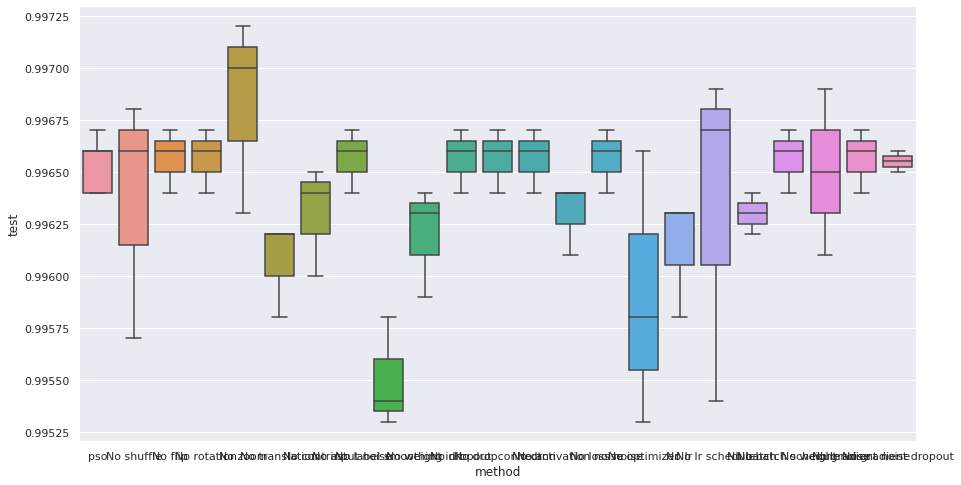

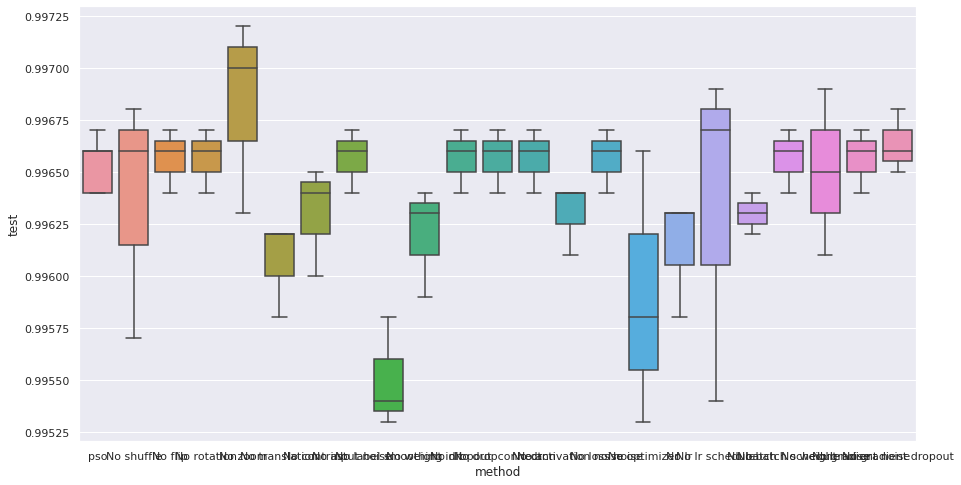

shuffle               1.000000
flip                  1.000000
rotation              0.000000
zoom                  0.037006
translation           0.058601
contrast              0.079906
input noise           0.000000
label smoothing       0.062195
weight init           0.022194
dropout               0.000000
dropconnect           0.000000
drnn                  0.000000
activation noise      0.007095
loss noise            0.000000
optimizer             2.000000
lr                    3.585689
lr schedule          -0.150253
batch               128.000000
batch schedule        0.000000
weight noise          5.511520
gradient noise        0.000000
gradient dropout      0.052326
Name: 3, dtype: float32


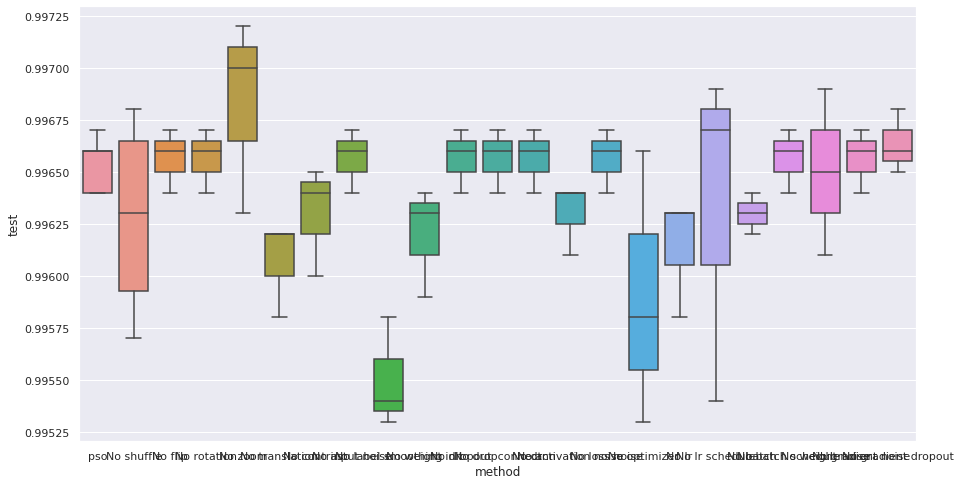

flip 1.0


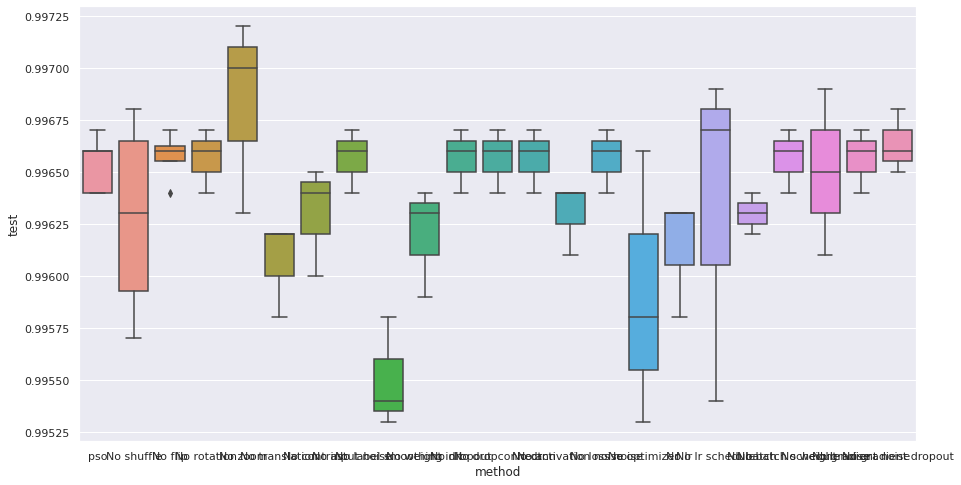

rotation 0.0


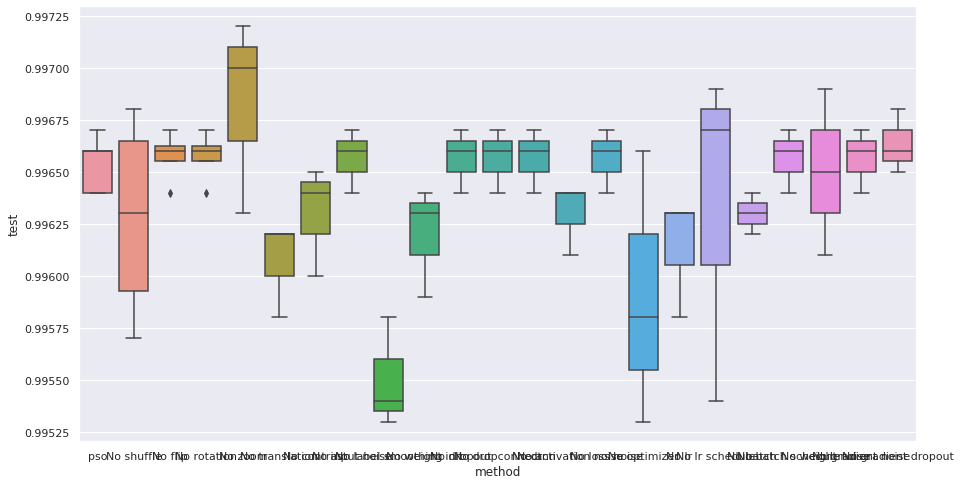

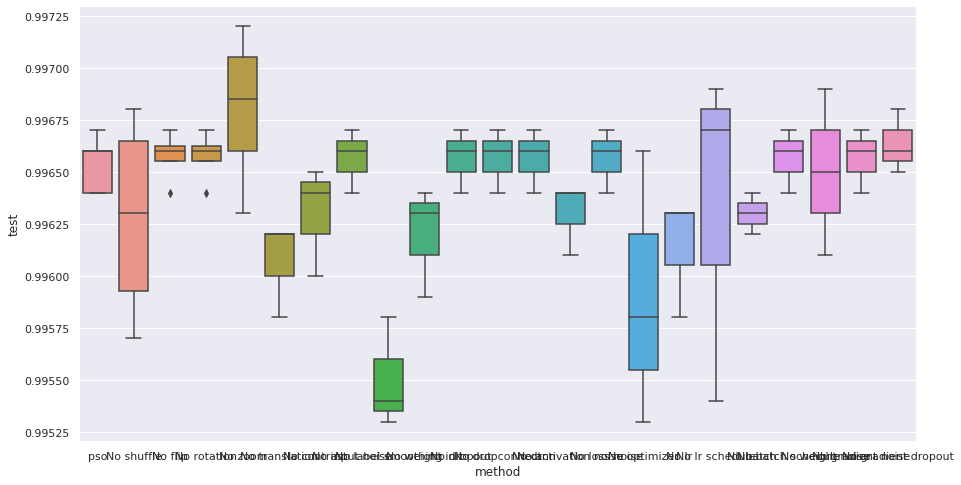

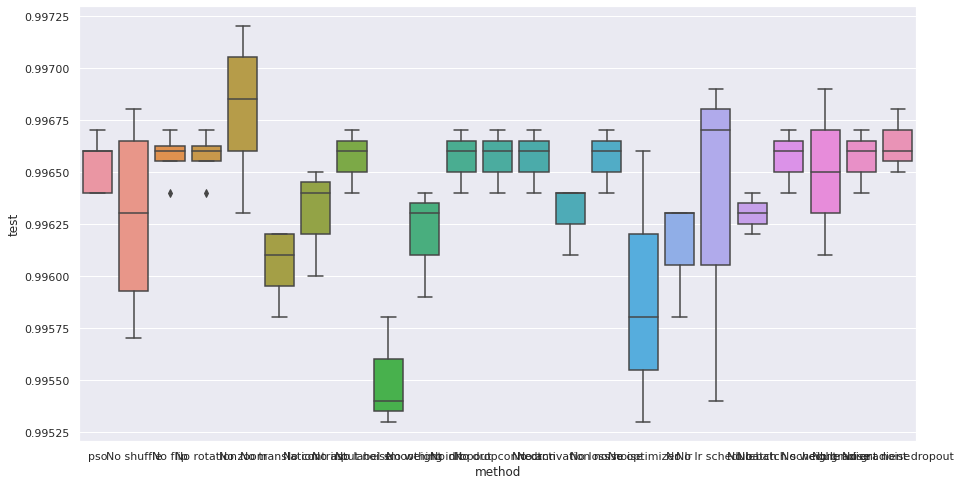

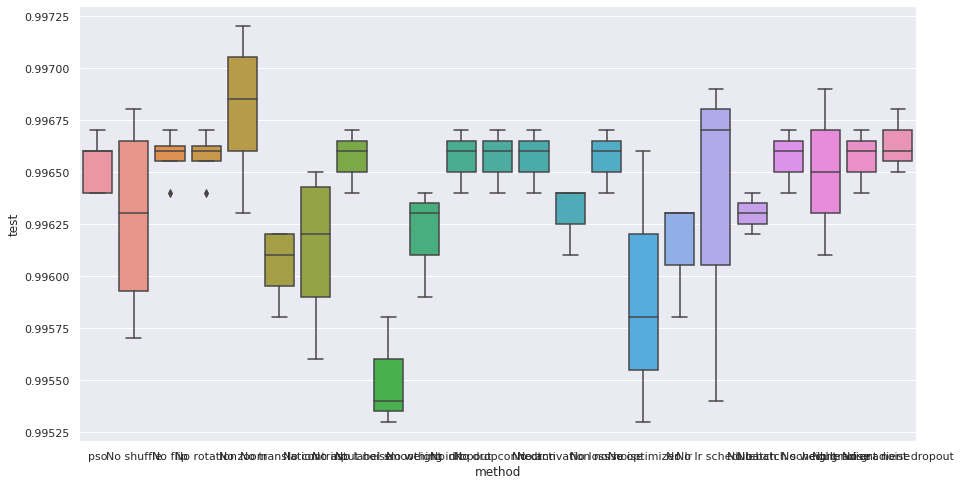

input noise 0.0


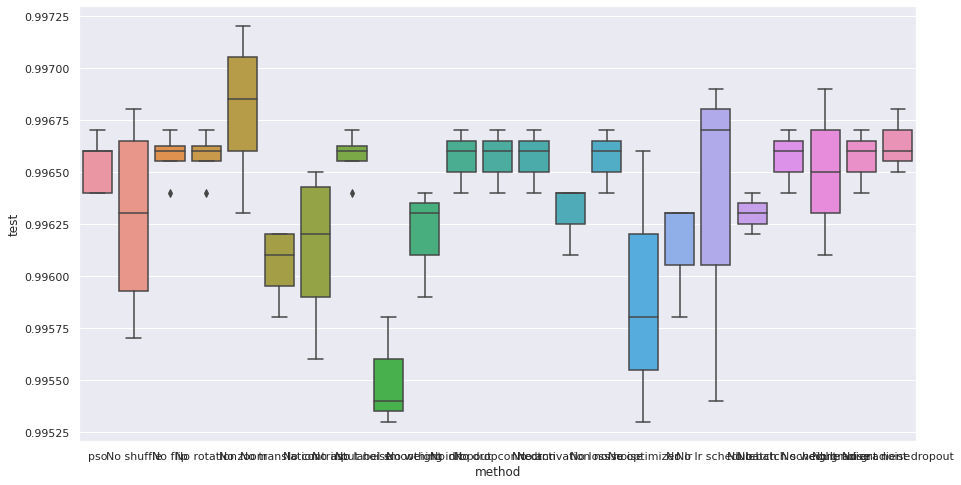

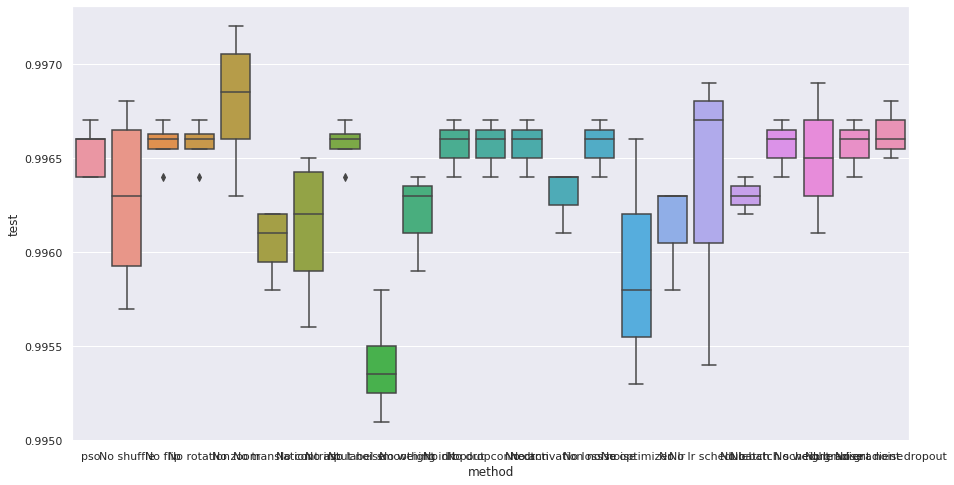

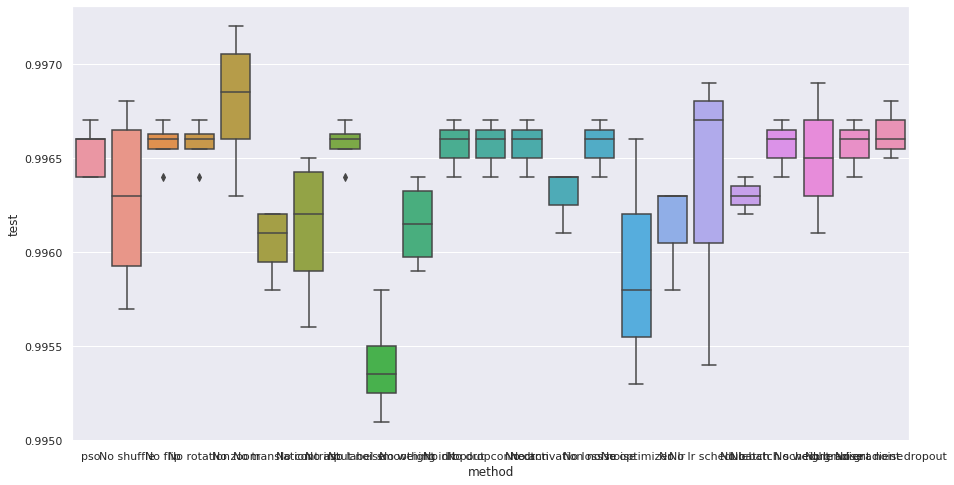

dropout 0.0


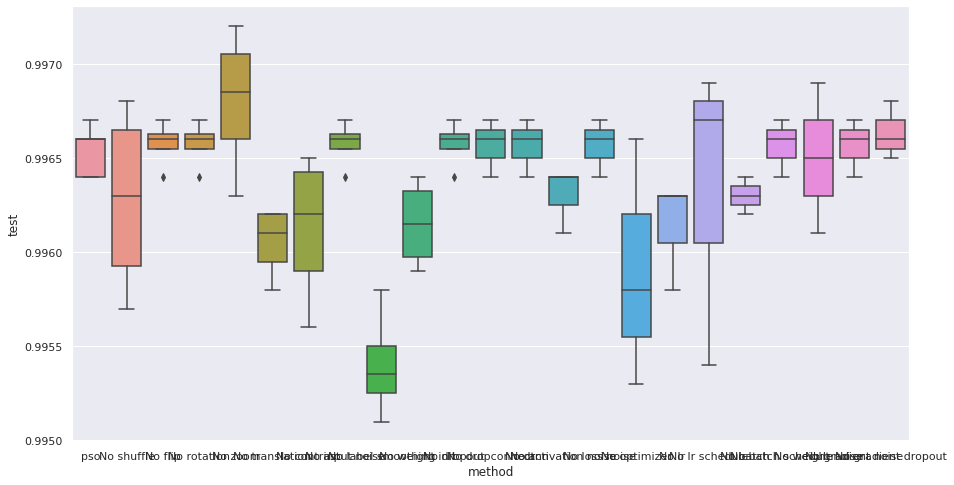

dropconnect 0.0


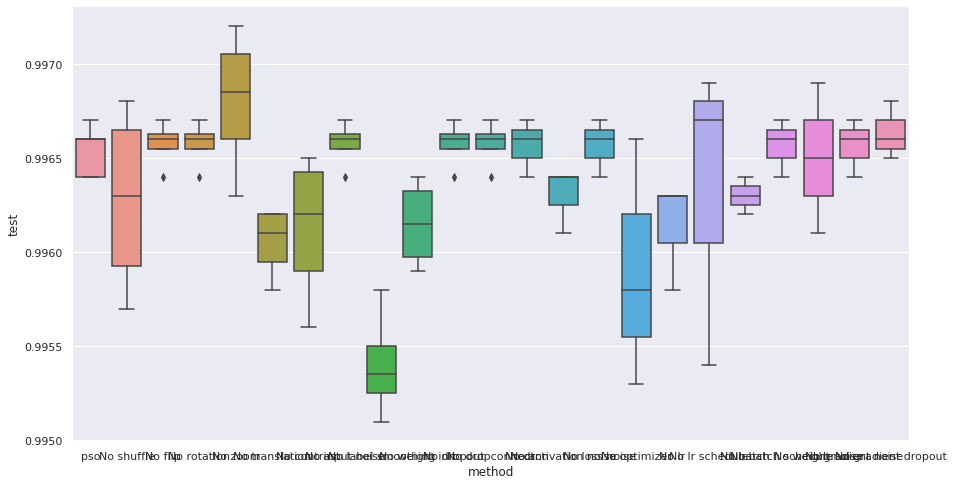

drnn 0.0


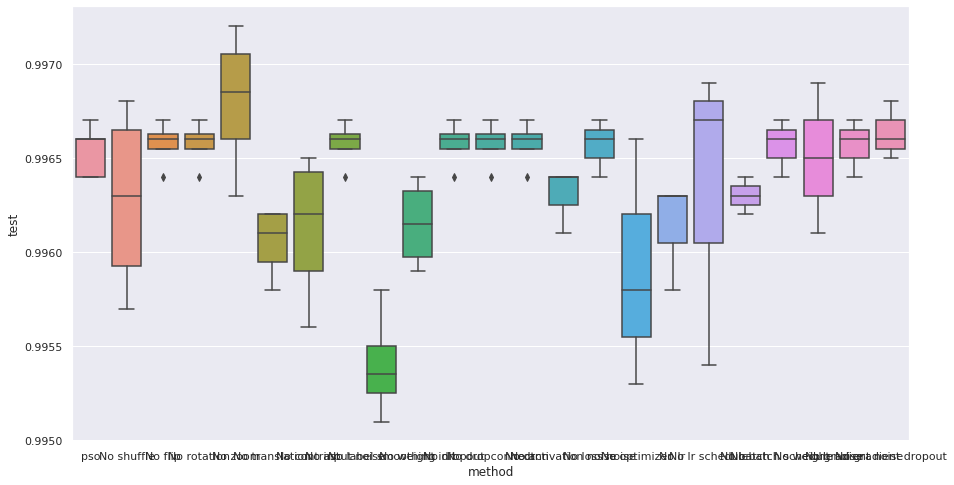

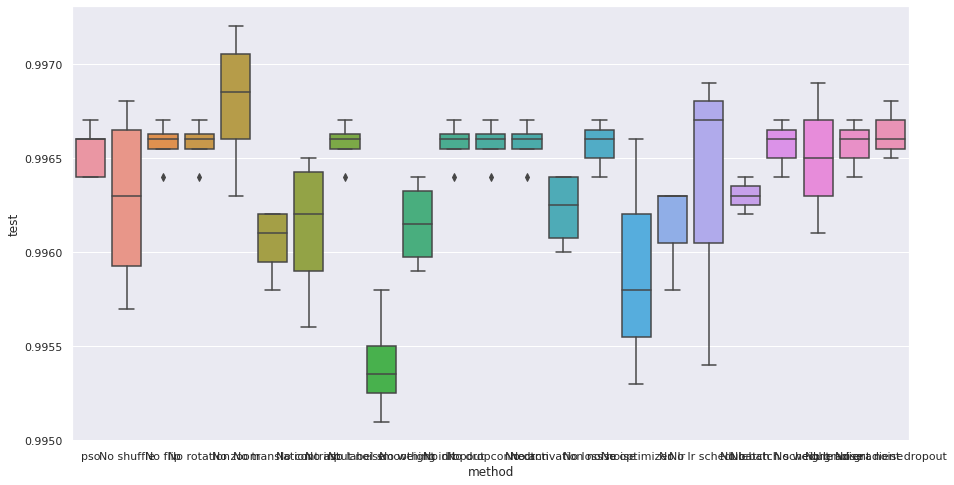

loss noise 0.0


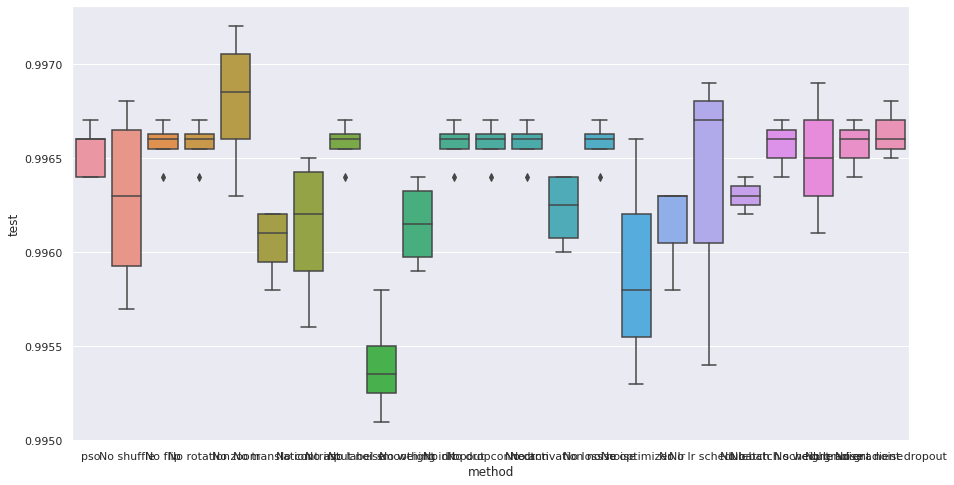

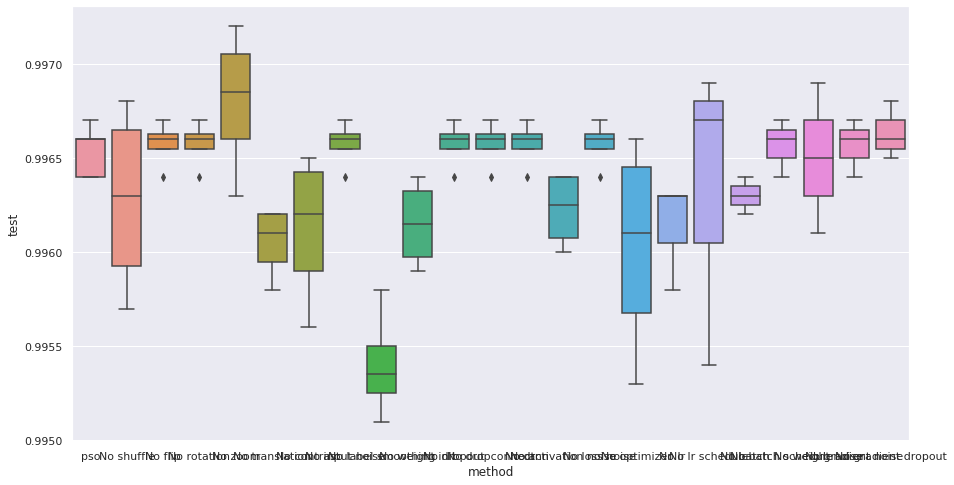

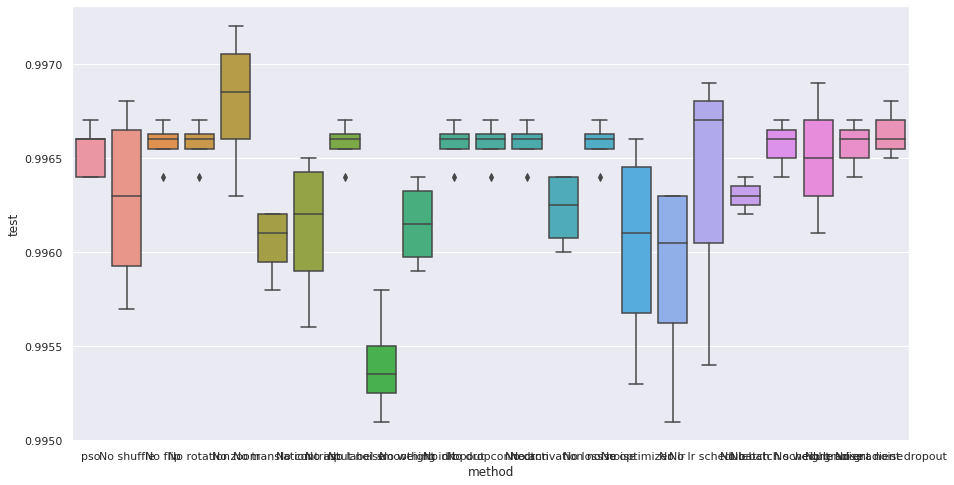

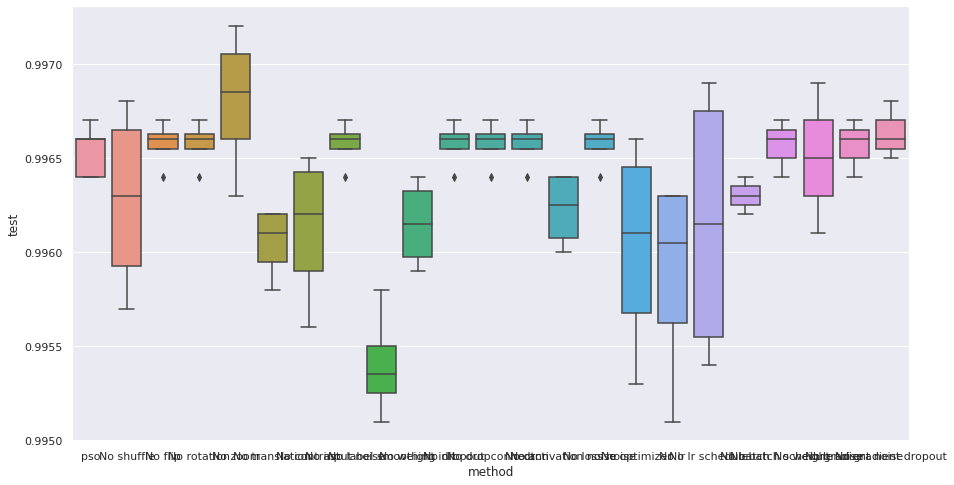

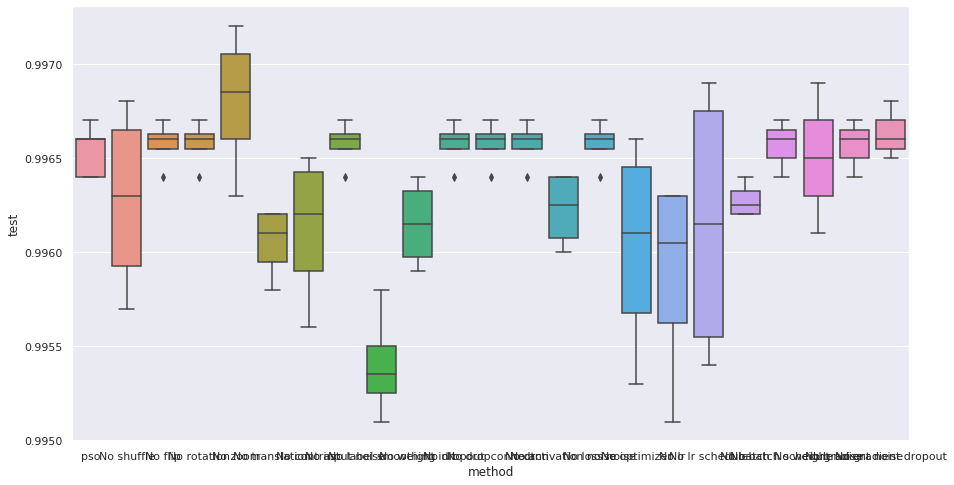

batch schedule 0.0


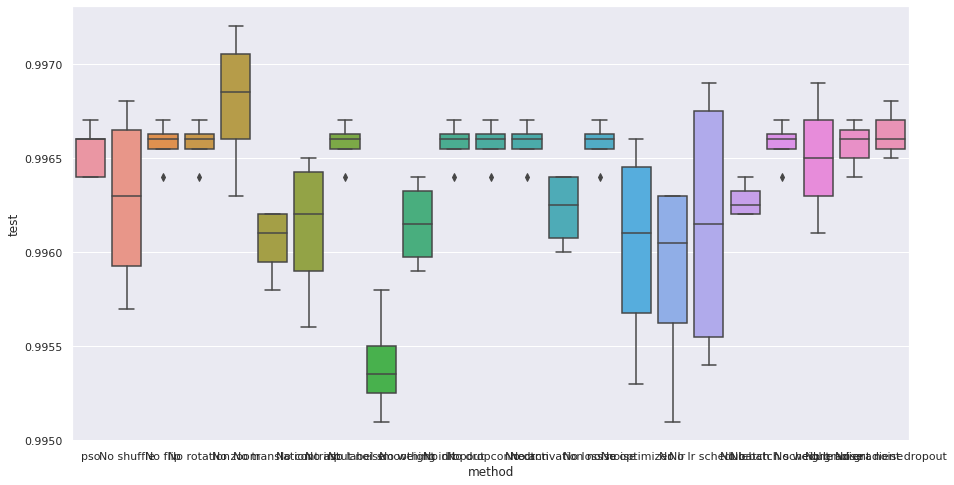

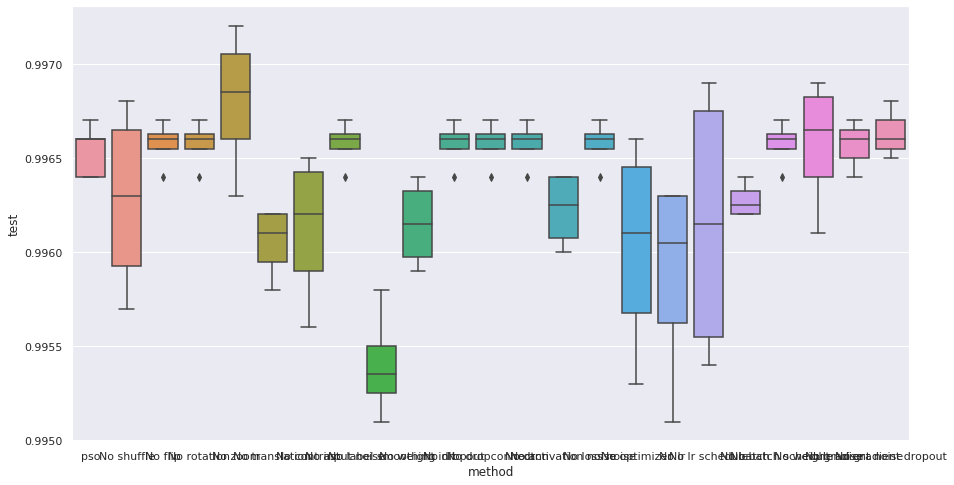

gradient noise 0.0


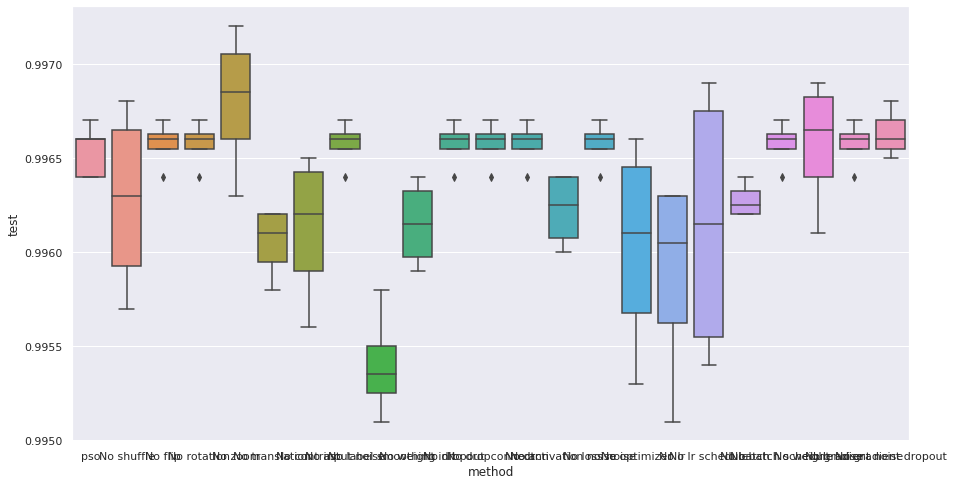

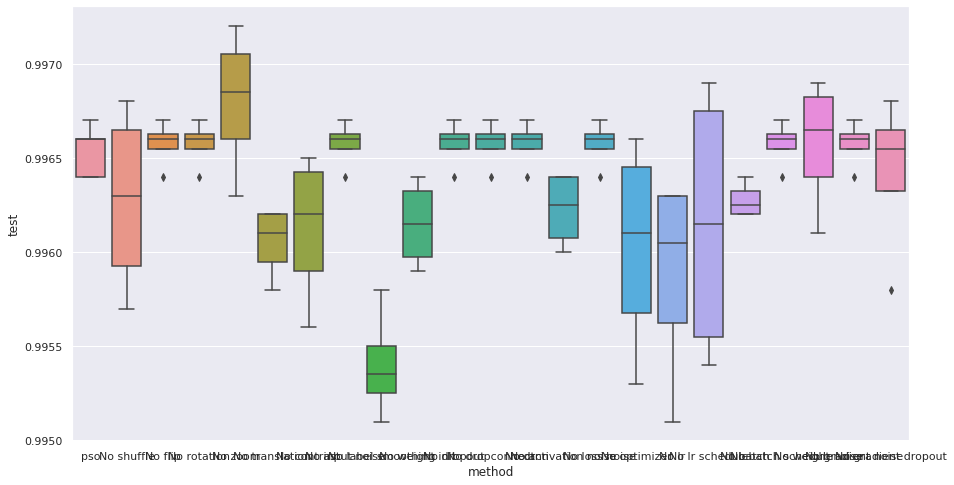

shuffle               1.000000
flip                  1.000000
rotation              0.000000
zoom                  0.037006
translation           0.058601
contrast              0.079906
input noise           0.000000
label smoothing       0.062195
weight init           0.022194
dropout               0.000000
dropconnect           0.000000
drnn                  0.000000
activation noise      0.007095
loss noise            0.000000
optimizer             2.000000
lr                    3.585689
lr schedule          -0.150253
batch               128.000000
batch schedule        0.000000
weight noise          5.511520
gradient noise        0.000000
gradient dropout      0.052326
Name: 4, dtype: float32


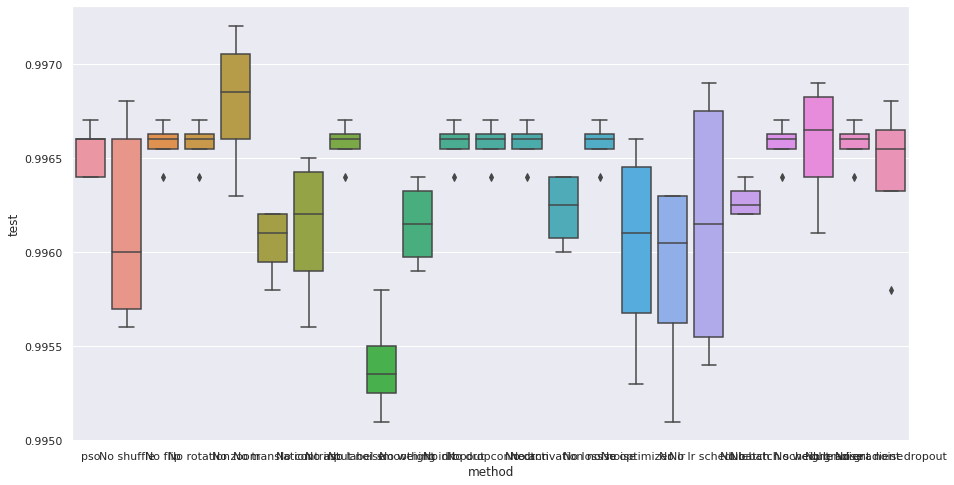

flip 1.0


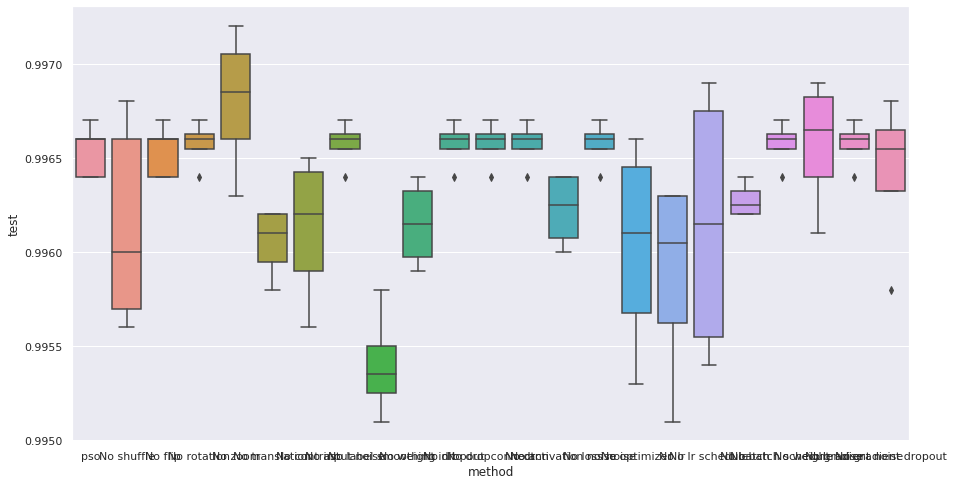

rotation 0.0


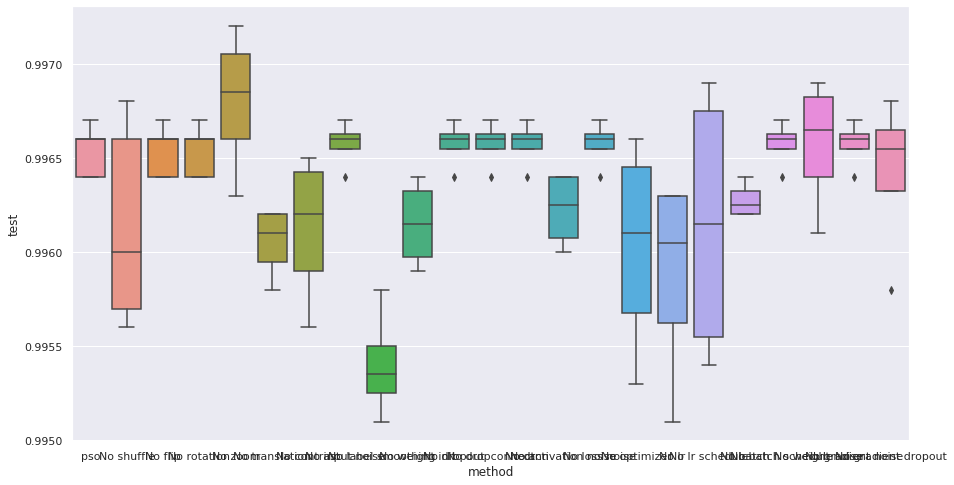

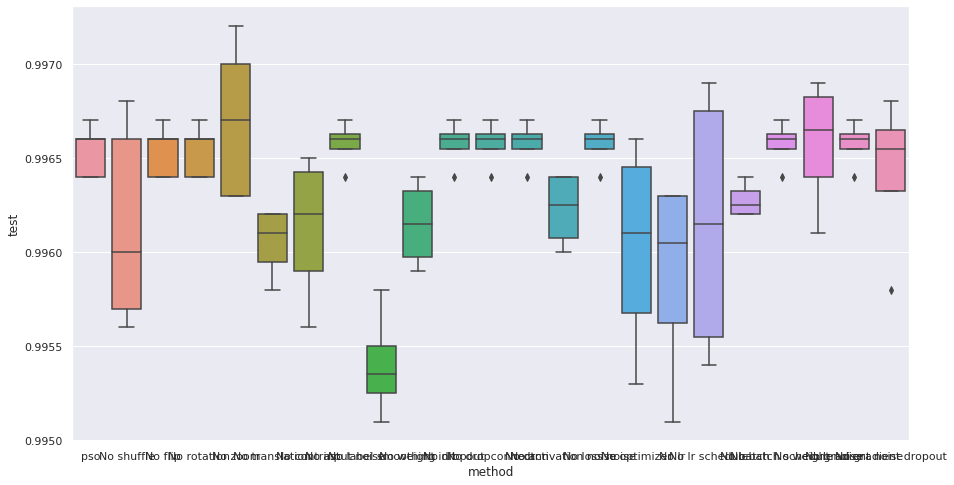

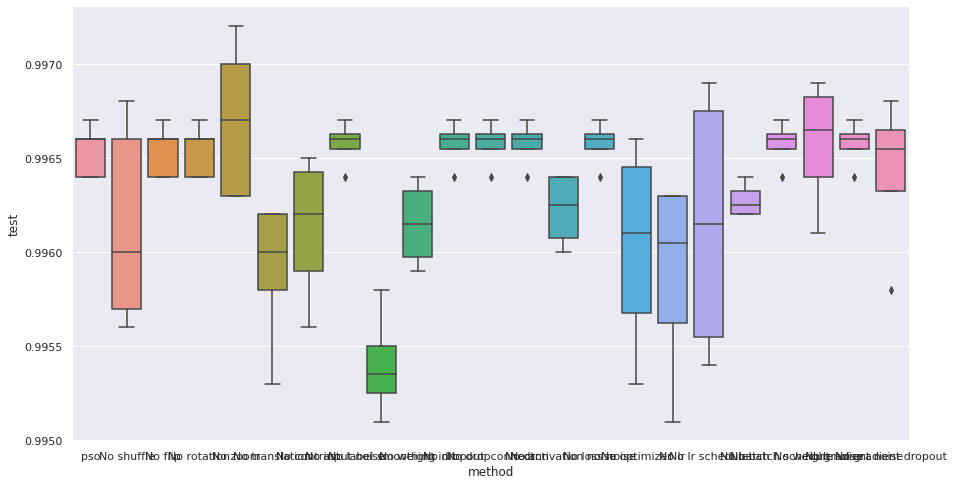

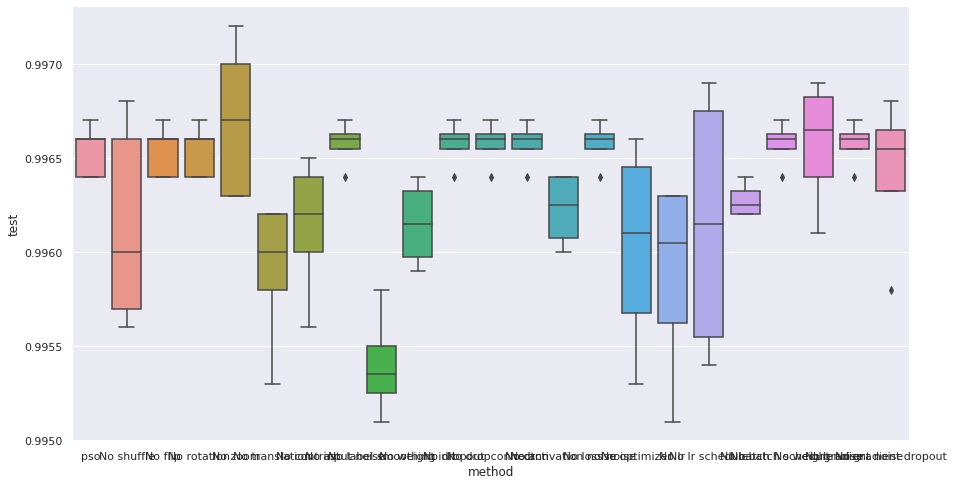

input noise 0.0


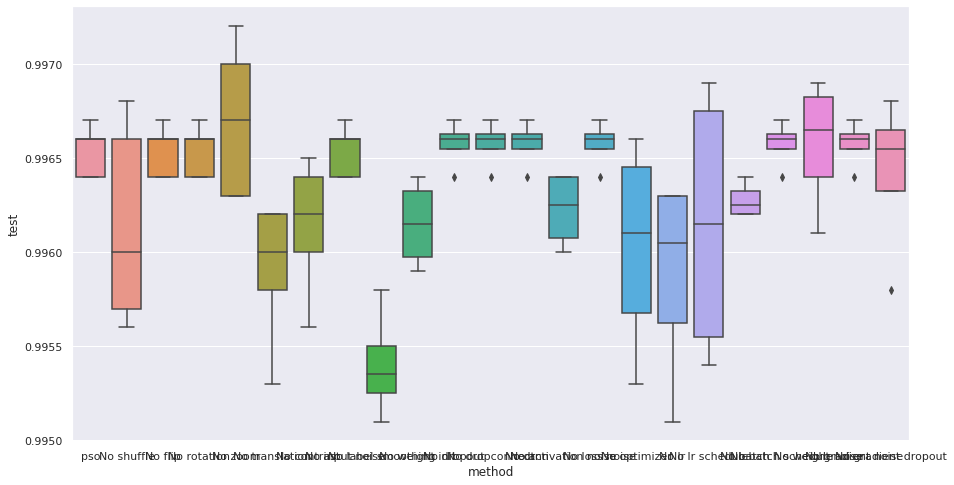

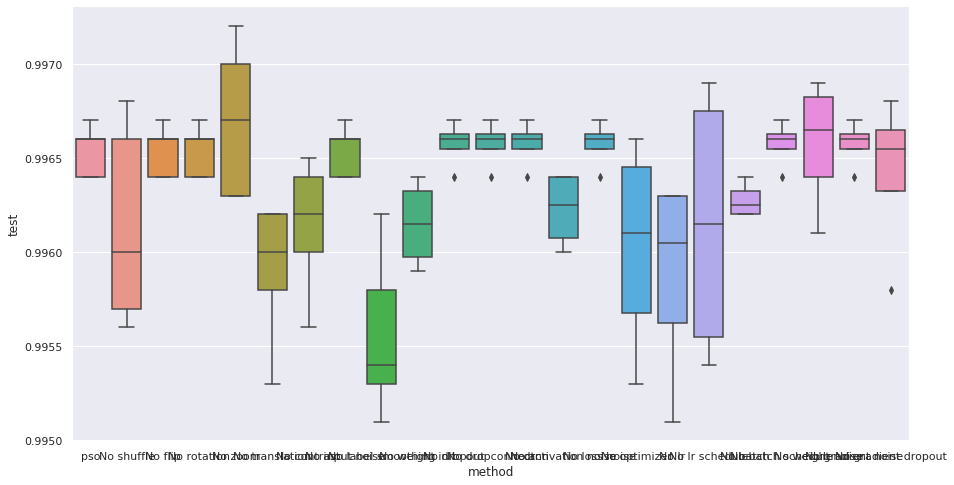

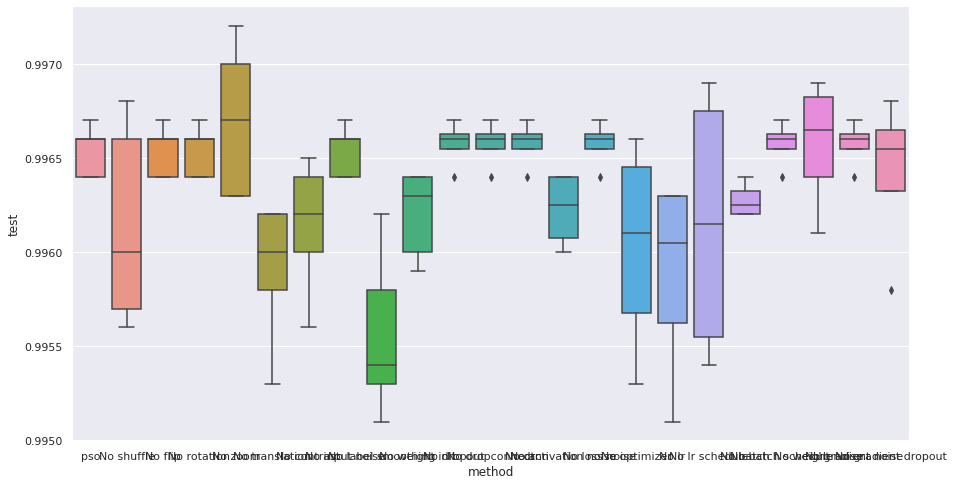

dropout 0.0


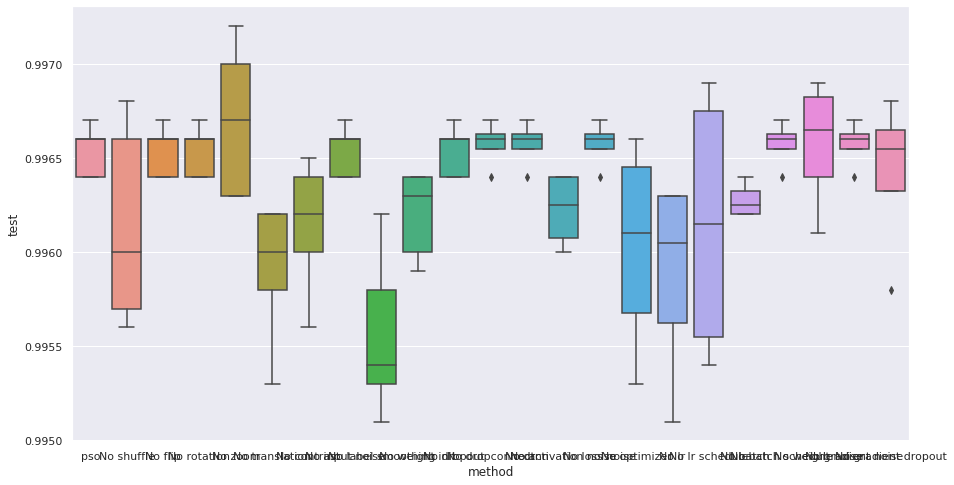

dropconnect 0.0


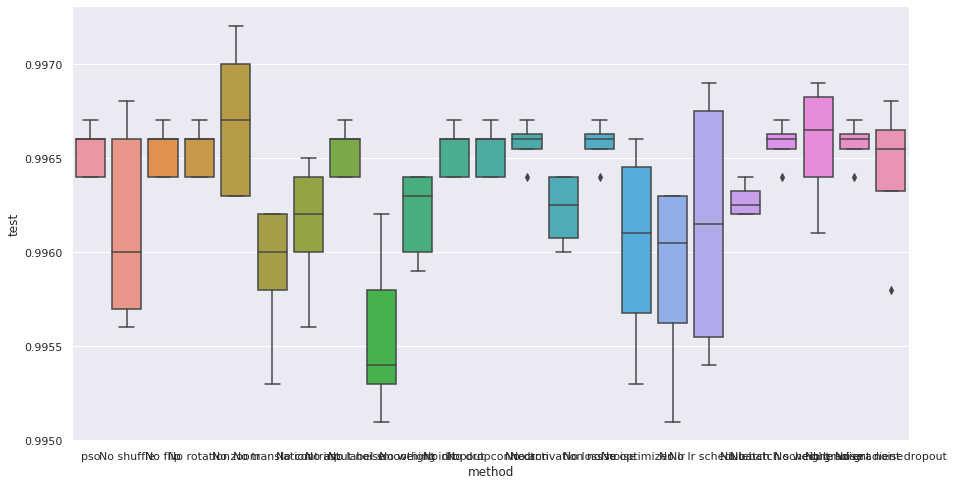

drnn 0.0


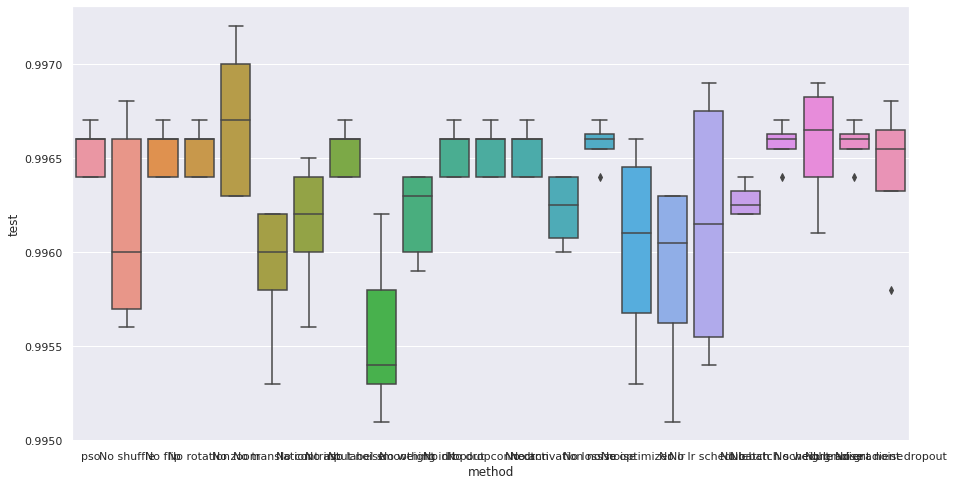

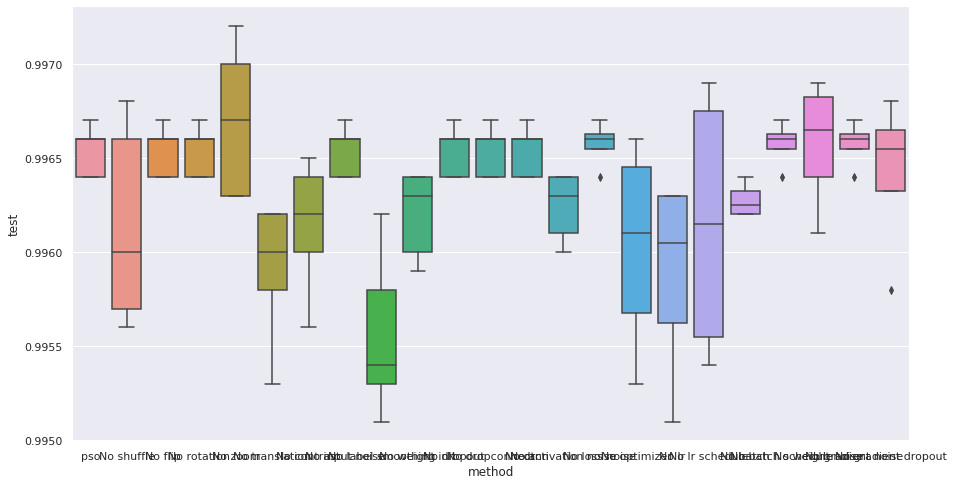

loss noise 0.0


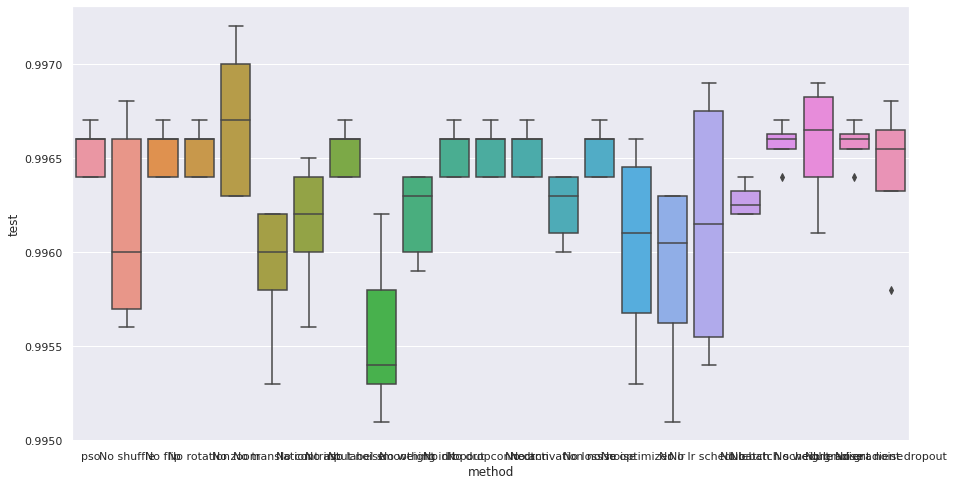

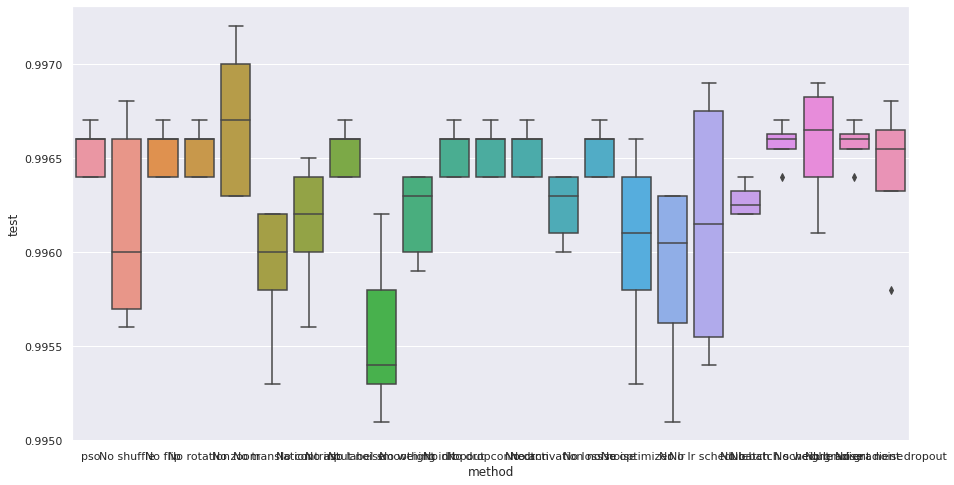

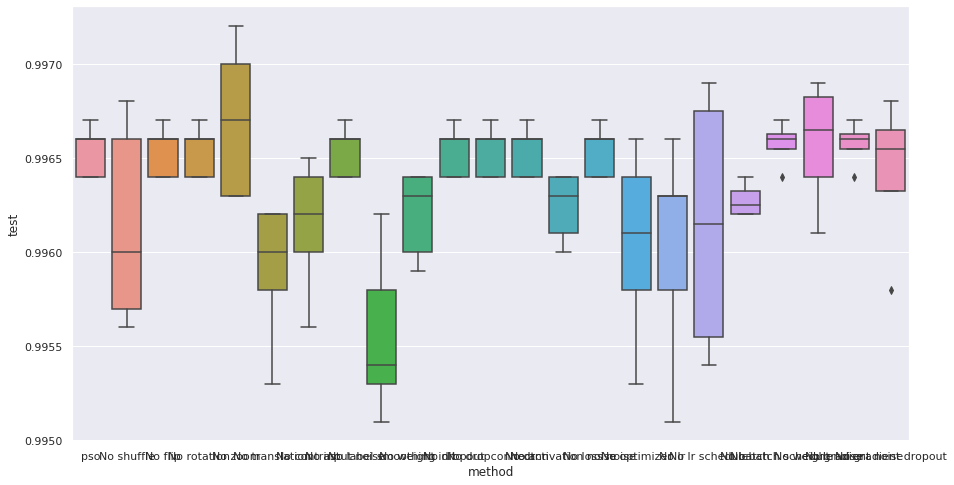

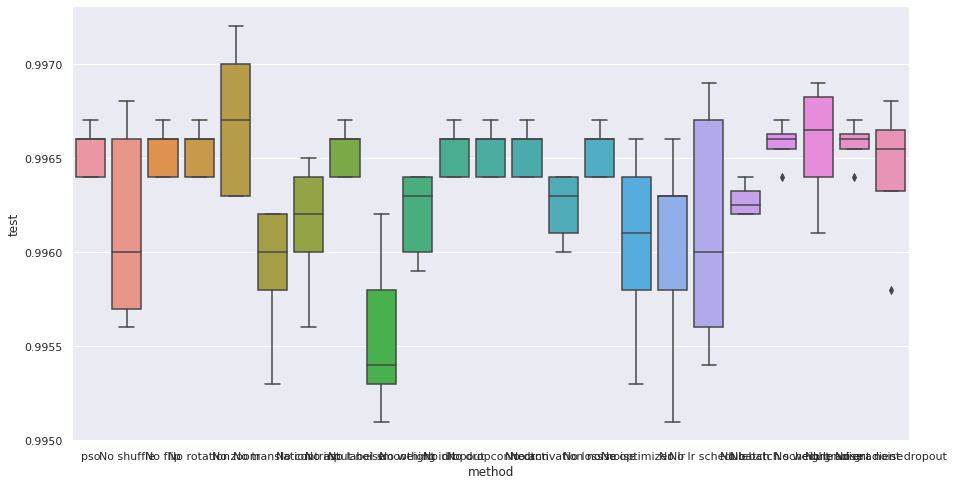

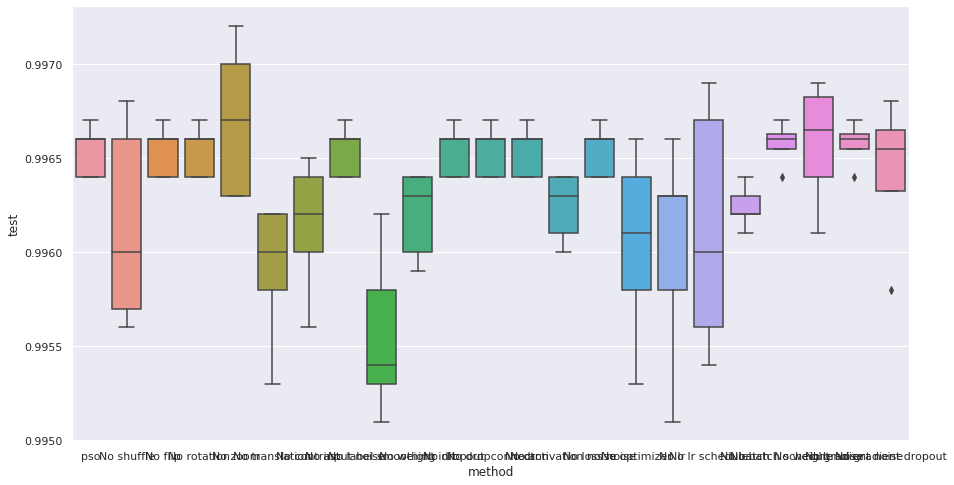

batch schedule 0.0


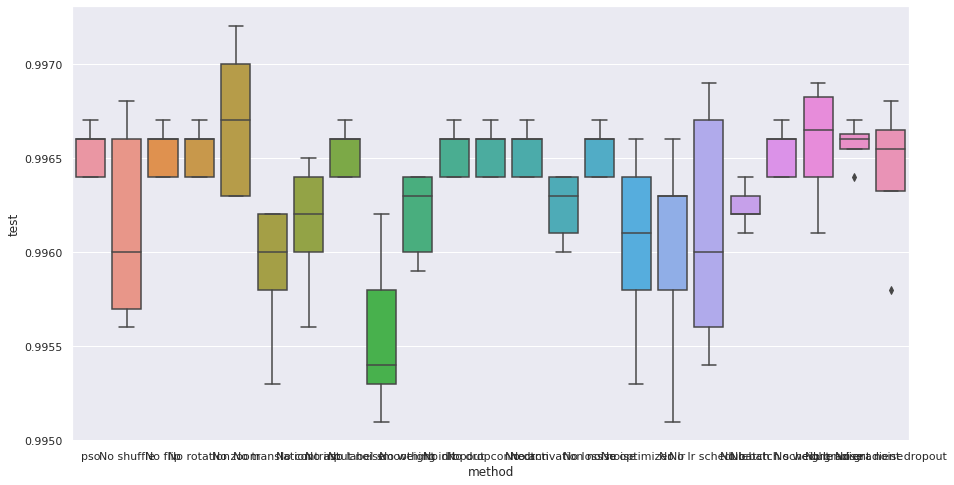

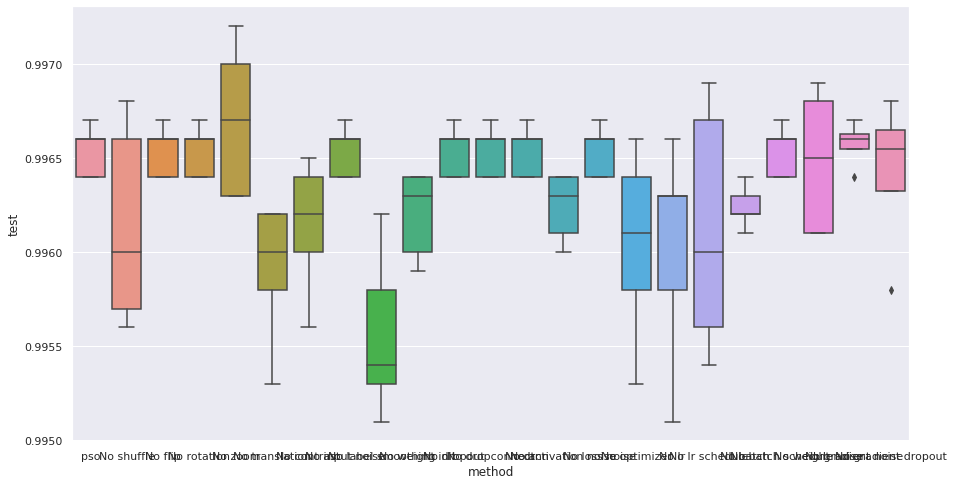

gradient noise 0.0


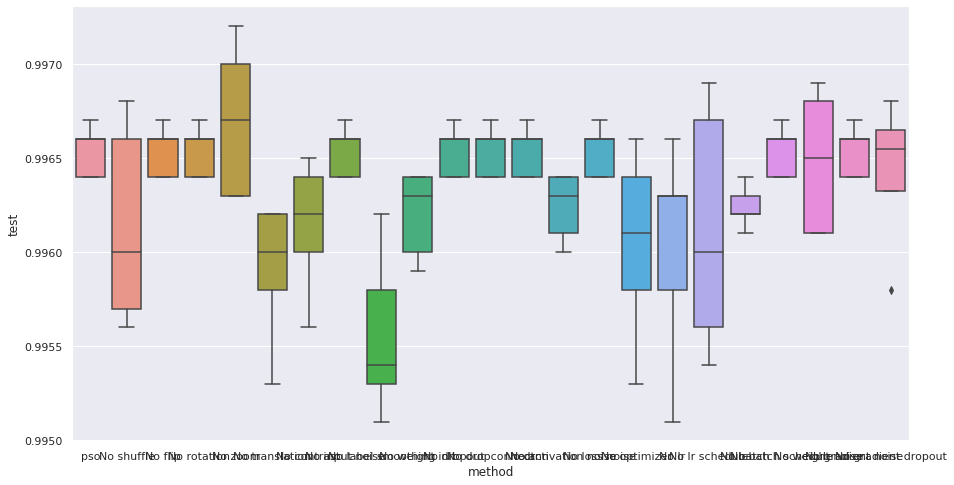

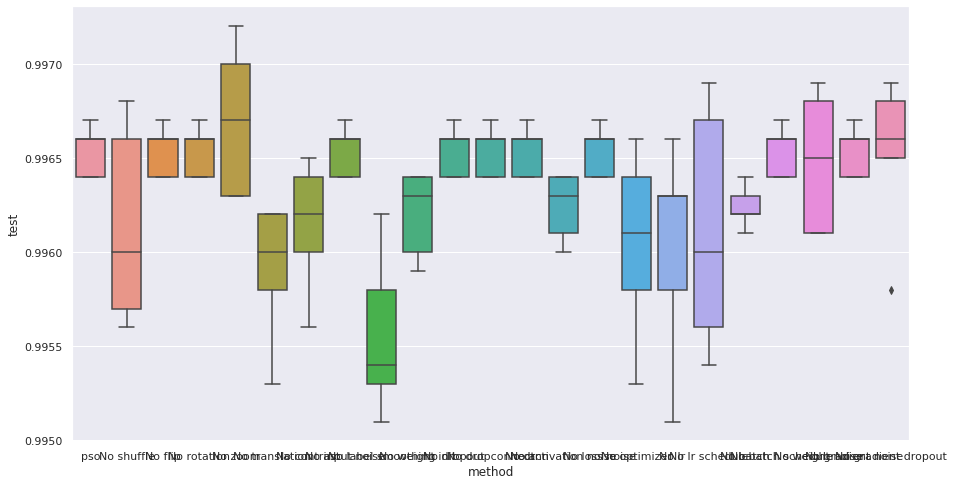

In [9]:
##### import copy

#default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nn.max_batch, 100, 0.0, 0.1]
#default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32, 1.0, 0.0, 0.05, 0.0]

nn.dataset = dataset_test
nn.epochs = epochs_test

for file_name in files:
    exp_df = pd.read_excel(directory+file_name)

    settings = []
    for idx, row in exp_df[exp_df['method'] == 'pso'].iloc[:, 1:].iterrows():
            setting = row.astype(np.float32)[:-1]
            print(setting)

            for i in range(len(methods)):
                if (setting[i] == default_settings[i]):
                    print(methods[i], setting[i])


                    line = []
                    line .append('No '+methods[i])
                    for value in setting:
                        line.append(value)
                    line.append(row[-1])



                else:
                    temp_setting = copy.copy(setting)
                    temp_setting[i] = default_settings[i]

                    if (methods[i] == 'batch schedule'):
                        temp_setting[i-1] = setting[i-1]
                    if (methods[i] == 'lr schedule'):
                        temp_setting[i-1] = setting[i-1]

                    fitness = NeuroEvolution.evaluate(temp_setting, [nn], test_time=True)[0]
                    line = []
                    line .append('No '+methods[i])
                    for value in temp_setting[:]:
                        line.append(value)
                    line.append(fitness)
                    

                exp_df.loc[len(exp_df)] = line
                sns.set(rc={'figure.figsize':(15,8)})
                sns.boxplot(x='method', y='test', data=exp_df)
                #plt.ylim(0.9, 1.0)
                plt.show()
                exp_df.to_excel(directory+file_name, index=False)

            

In [ ]:
fitness

# Ablation by classification

shuffle               1.000000
flip                  1.000000
rotation              0.000000
zoom                  0.037006
translation           0.058601
contrast              0.079906
input noise           0.000000
label smoothing       0.062195
weight init           0.022194
dropout               0.000000
dropconnect           0.000000
drnn                  0.000000
activation noise      0.007095
loss noise            0.000000
optimizer             2.000000
lr                    3.585689
lr schedule          -0.150253
batch               128.000000
batch schedule        0.000000
weight noise          5.511520
gradient noise        0.000000
gradient dropout      0.052326
Name: 0, dtype: float32


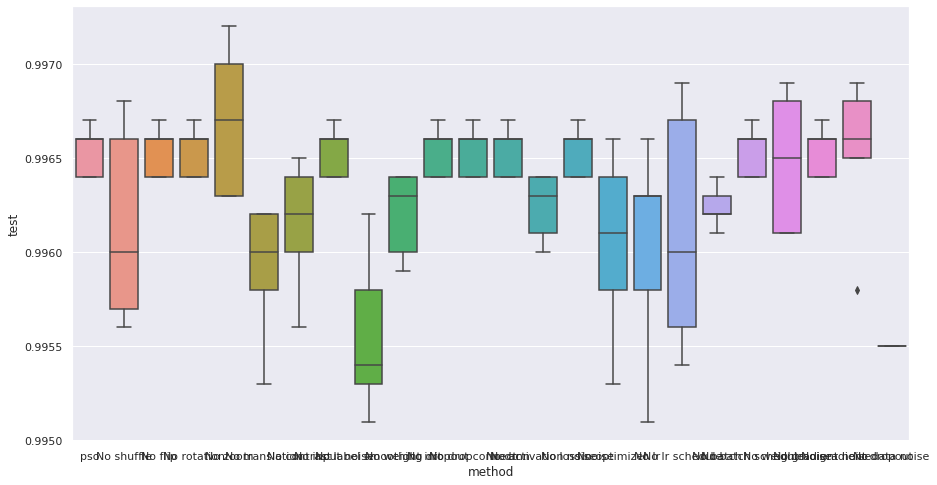

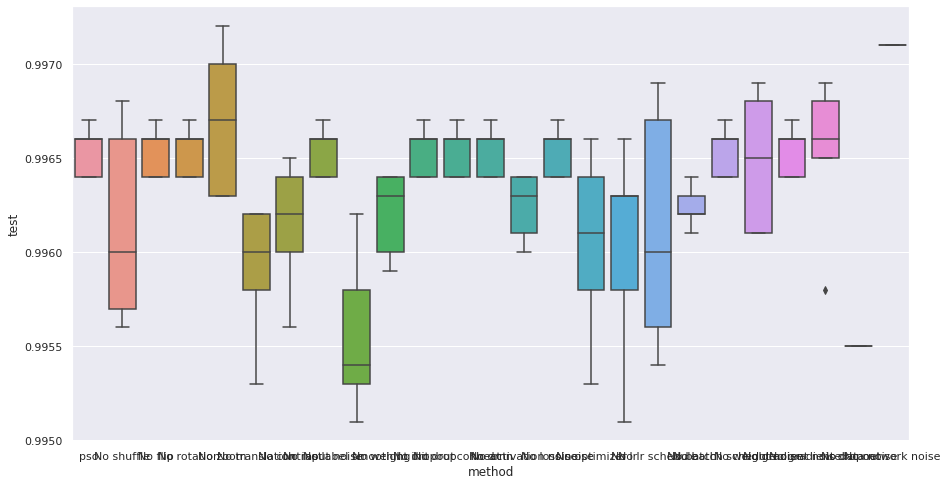

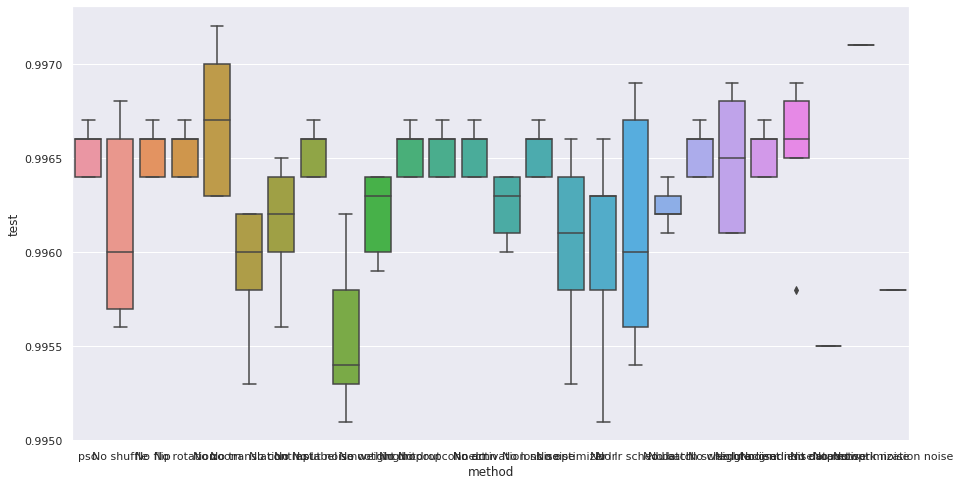

shuffle               1.000000
flip                  1.000000
rotation              0.000000
zoom                  0.037006
translation           0.058601
contrast              0.079906
input noise           0.000000
label smoothing       0.062195
weight init           0.022194
dropout               0.000000
dropconnect           0.000000
drnn                  0.000000
activation noise      0.007095
loss noise            0.000000
optimizer             2.000000
lr                    3.585689
lr schedule          -0.150253
batch               128.000000
batch schedule        0.000000
weight noise          5.511520
gradient noise        0.000000
gradient dropout      0.052326
Name: 1, dtype: float32


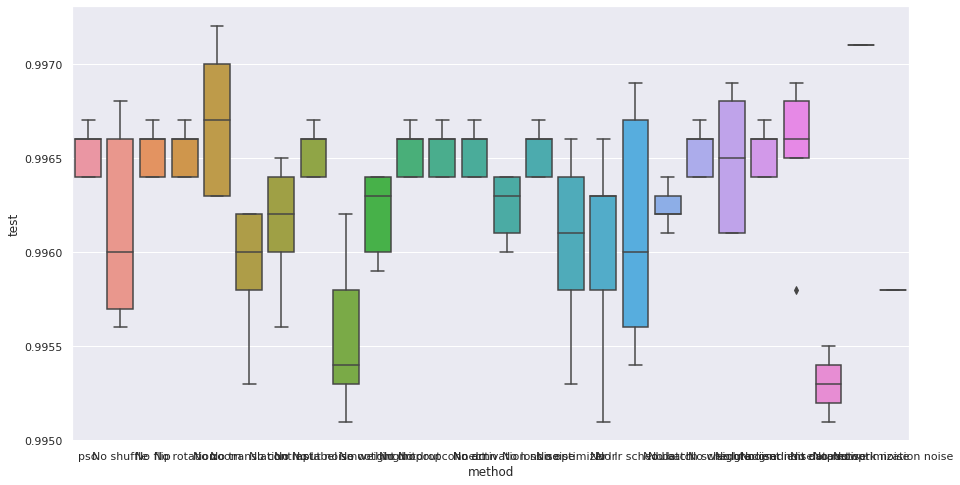

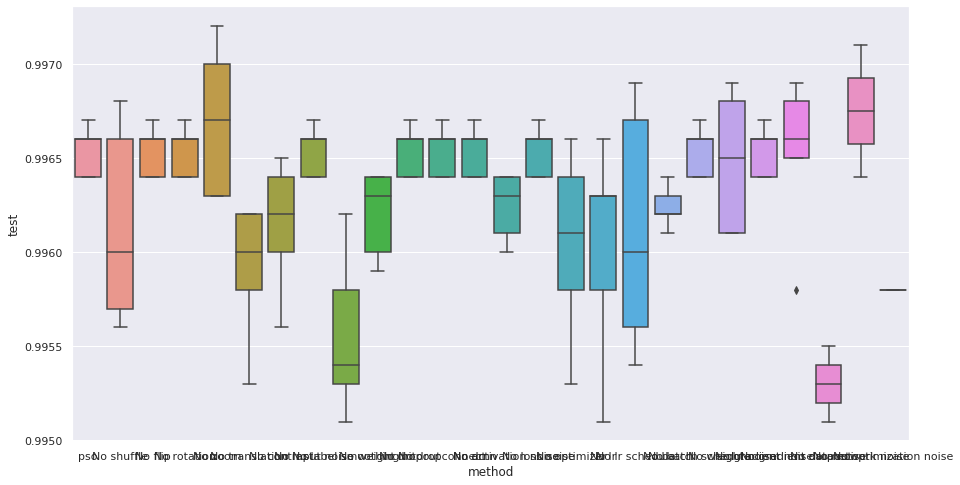

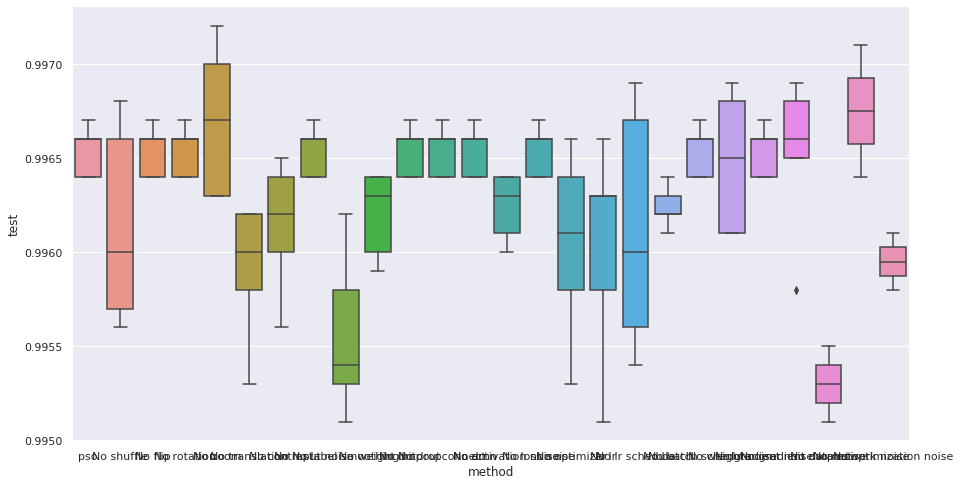

shuffle               1.000000
flip                  1.000000
rotation              0.000000
zoom                  0.037006
translation           0.058601
contrast              0.079906
input noise           0.000000
label smoothing       0.062195
weight init           0.022194
dropout               0.000000
dropconnect           0.000000
drnn                  0.000000
activation noise      0.007095
loss noise            0.000000
optimizer             2.000000
lr                    3.585689
lr schedule          -0.150253
batch               128.000000
batch schedule        0.000000
weight noise          5.511520
gradient noise        0.000000
gradient dropout      0.052326
Name: 2, dtype: float32


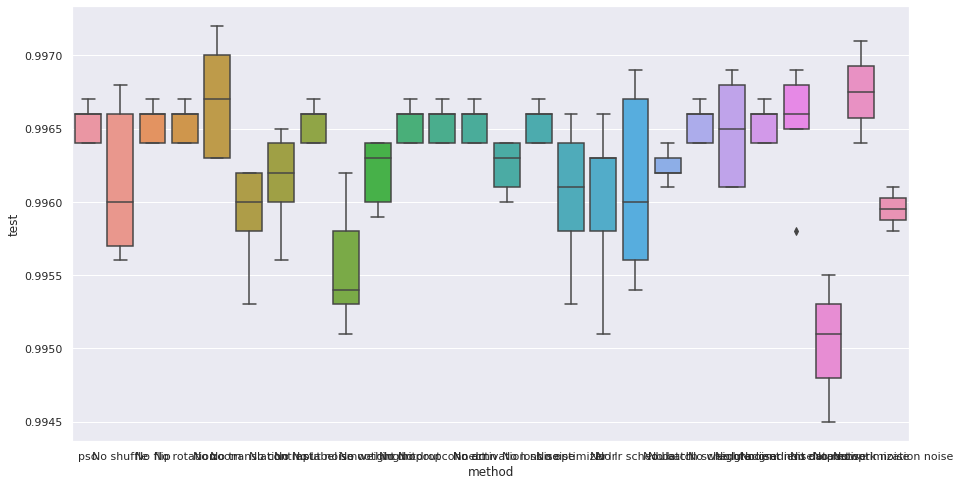

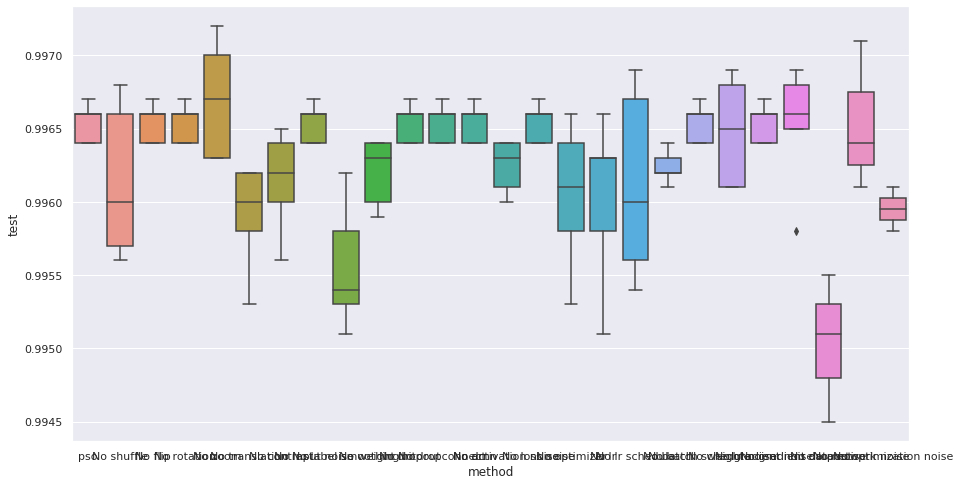

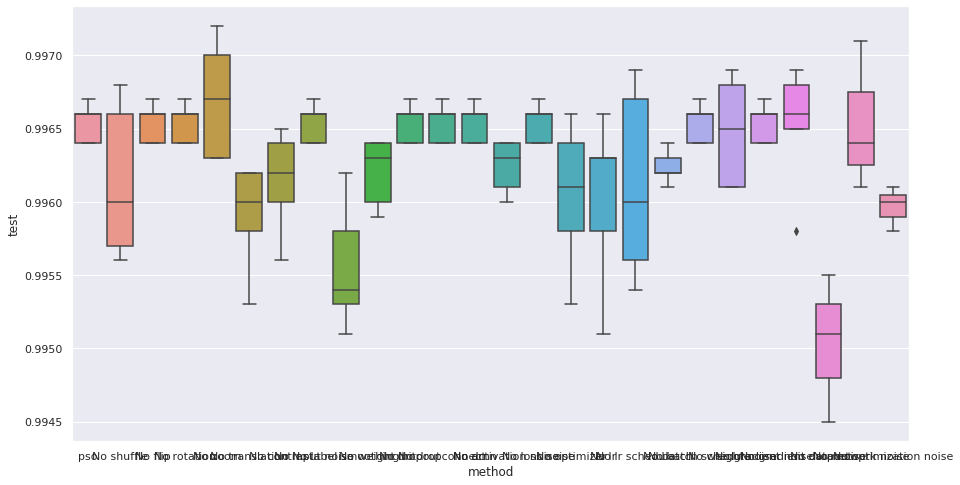

shuffle               1.000000
flip                  1.000000
rotation              0.000000
zoom                  0.037006
translation           0.058601
contrast              0.079906
input noise           0.000000
label smoothing       0.062195
weight init           0.022194
dropout               0.000000
dropconnect           0.000000
drnn                  0.000000
activation noise      0.007095
loss noise            0.000000
optimizer             2.000000
lr                    3.585689
lr schedule          -0.150253
batch               128.000000
batch schedule        0.000000
weight noise          5.511520
gradient noise        0.000000
gradient dropout      0.052326
Name: 3, dtype: float32


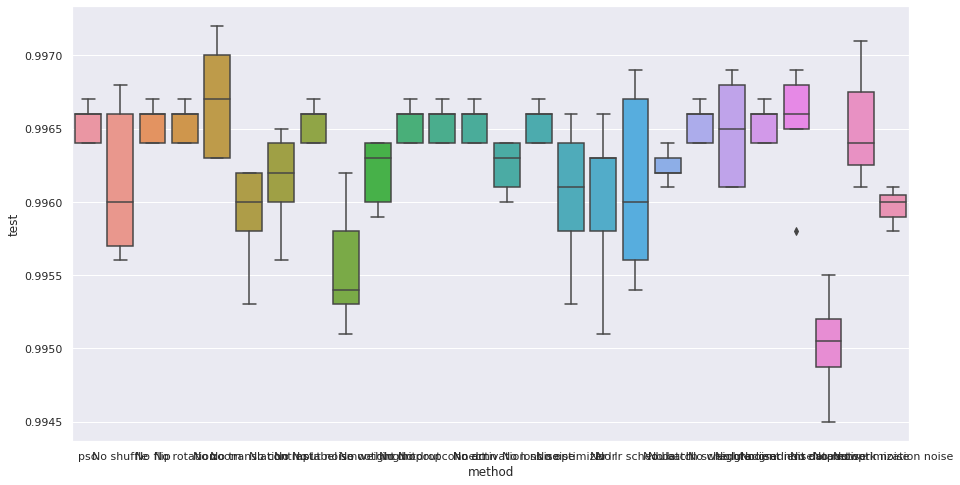

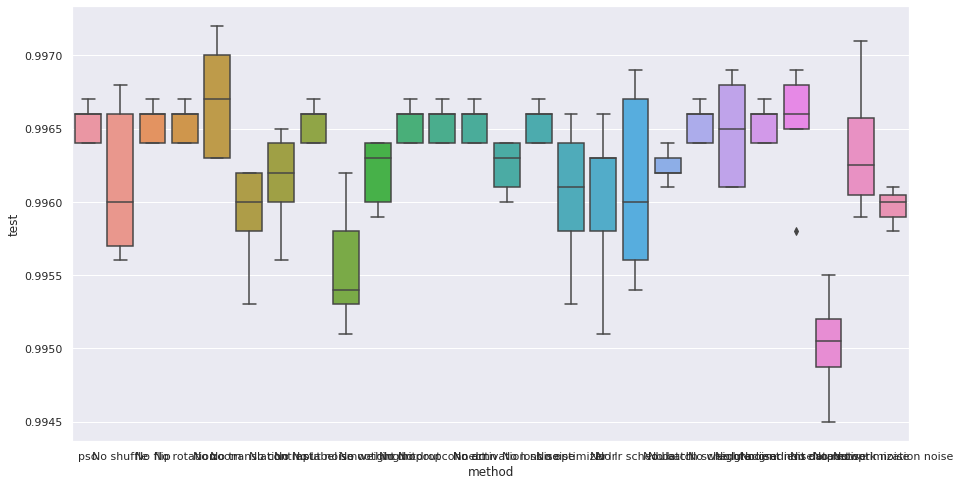

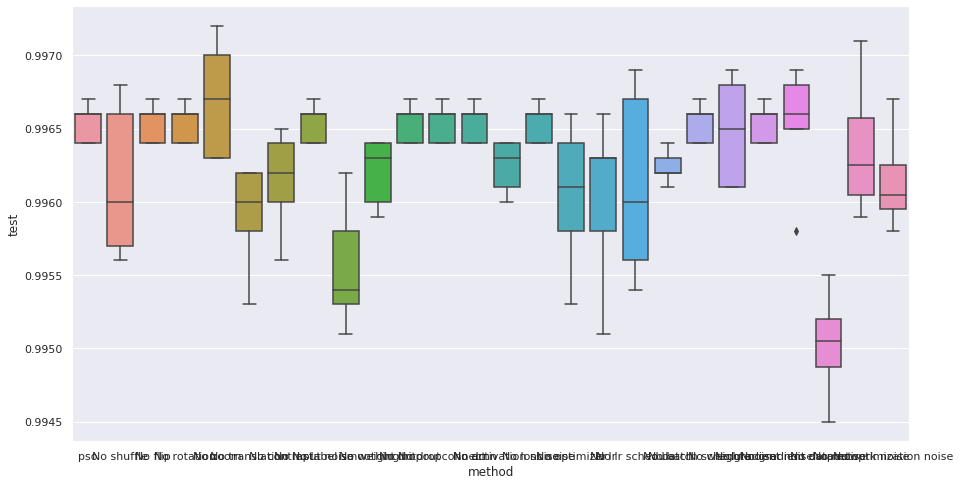

shuffle               1.000000
flip                  1.000000
rotation              0.000000
zoom                  0.037006
translation           0.058601
contrast              0.079906
input noise           0.000000
label smoothing       0.062195
weight init           0.022194
dropout               0.000000
dropconnect           0.000000
drnn                  0.000000
activation noise      0.007095
loss noise            0.000000
optimizer             2.000000
lr                    3.585689
lr schedule          -0.150253
batch               128.000000
batch schedule        0.000000
weight noise          5.511520
gradient noise        0.000000
gradient dropout      0.052326
Name: 4, dtype: float32


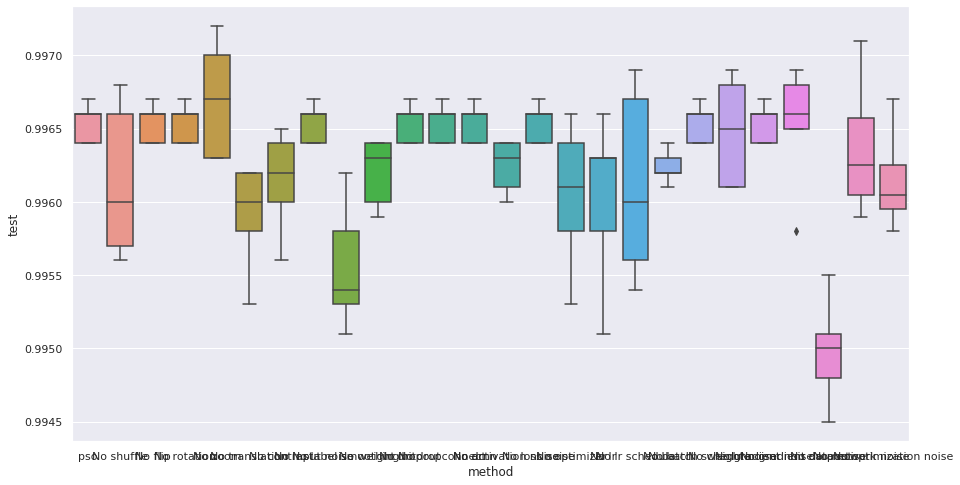

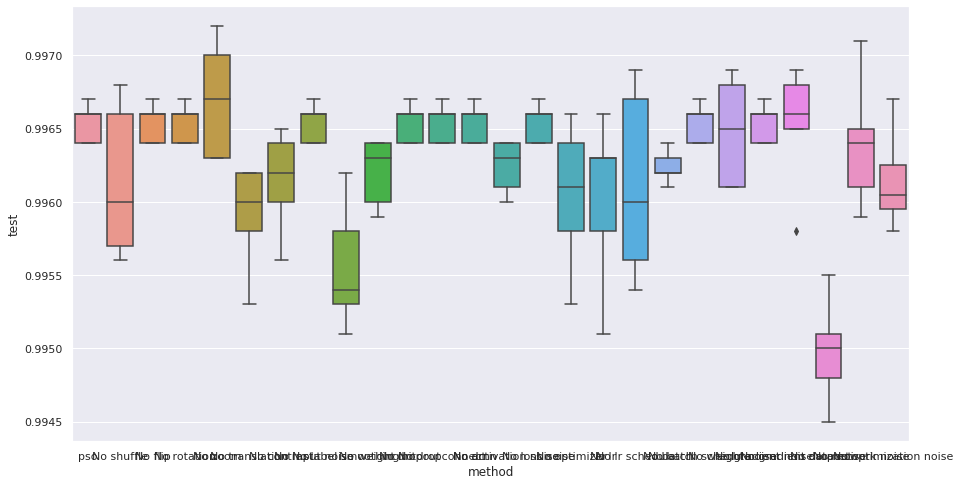

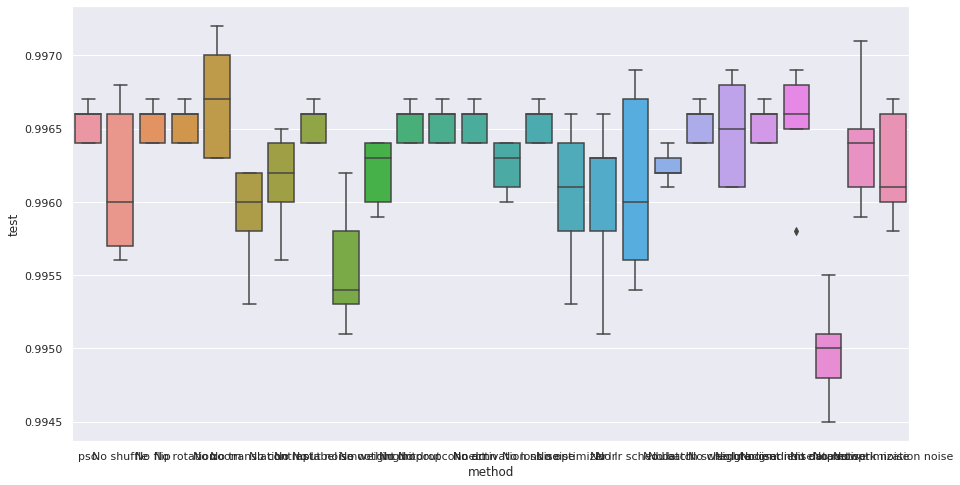

In [9]:
##### import copy

#default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nn.max_batch, 100, 0.0, 0.1]
#default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32, 1.0, 0.0, 0.05, 0.0]
nn.dataset = dataset_test
nn.epochs = epochs_test

for file_name in files:
    exp_df = pd.read_excel(directory+file_name)

    settings = []
    for idx, row in exp_df[exp_df['method'] == 'pso'].iloc[:, 1:].iterrows():
            setting = row.astype(np.float32)[:-1]
            print(setting)

            
            temp_setting = copy.copy(setting)
            for i in range(8):
                    temp_setting[i] = default_settings[i]


            fitness = NeuroEvolution.evaluate(temp_setting, [nn], test_time=True)[0]
            line = []
            line .append('No data noise')
            for value in temp_setting[:]:
                line.append(value)
            line.append(fitness)

            exp_df.loc[len(exp_df)] = line
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)
            #plt.ylim(0.9, 1.0)
            plt.show()
            exp_df.to_excel(file_name, index=False)
                
                
            temp_setting = copy.copy(setting)
            for i in range(8, 14):
                    temp_setting[i] = default_settings[i]


            fitness = NeuroEvolution.evaluate(temp_setting, [nn], test_time=True)[0]
            line = []
            line .append('No network noise')
            for value in temp_setting[:]:
                line.append(value)
            line.append(fitness)

            exp_df.loc[len(exp_df)] = line
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)
            #plt.ylim(0.9, 1.0)
            plt.show()
            exp_df.to_excel(file_name, index=False)
                
            temp_setting = copy.copy(setting)
            for i in range(14, 22):
                    temp_setting[i] = default_settings[i]


            fitness = NeuroEvolution.evaluate(temp_setting, [nn], test_time=True)[0]
            line = []
            line .append('No optimization noise')
            for value in temp_setting[:]:
                line.append(value)
            line.append(fitness)

            exp_df.loc[len(exp_df)] = line
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)
            #plt.ylim(0.9, 1.0)
            plt.show()
            exp_df.to_excel(file_name, index=False)

            